# I. Modélisation statistique

In [169]:
!pip install s3fs
!pip install pandas
!pip install scikit-learn==1.2.2
!pip install imbalanced-learn
!pip install matplotlib

## I.1. Chargement et préparation des données

### A) Importation des données

In [170]:
import pandas as pd

# Importation des données avec code_insee en index
donnees = pd.read_csv("data/bdd_finale.csv", sep=',', encoding='utf-8', index_col=0)
donnees.head()

beneficiaire_trans_eco  moyenne_conso_agri_hab  \
code_insee                                                   
22001                            0                2.994071   
22002                            0                1.283886   
22003                            0                0.000000   
22004                            0                0.200325   
22005                            0                0.121358   

            moyenne_conso_indus_hab  moyenne_conso_tertiaire_hab  \
code_insee                                                         
22001                      0.000503                     0.631181   
22002                      0.032120                     0.173206   
22003                      0.000000                     0.524098   
22004                      0.675332                     1.267791   
22005                      0.082905                     1.151104   

            moyenne_conso_residentiel_hab  moyenne_conso_totale_hab  \
code_insee                                                            
22001                            3.688905                  7.378017   
22002                            3.248865                  4.775226   
22003                            2.908468                  3.472740   
22004                            3.034877                  5.203150   
22005                            3.532942                  4.926877   

            emissions_ges  nb_actes_france_renov  friche  ecoquartiers  ...  \
code_insee                                                              ...   
22001               14871                     88       2             0  ...   
22002                8621                     38       0             0  ...   
22003                3028                     49       0             0  ...   
22004               29130                     46       6             0  ...   
22005                4136                     10       3             0  ...   

            CSP_maire  com_variation_encours_dette_ha_pct part_inactifs  \
code_insee                                                                
22001              12                                18.9     12.751678   
22002              54                               -39.3     11.062718   
22003              56                                99.8     14.239130   
22004              33                               -34.1     17.234927   
22005              77                               -14.5     14.188533   

            part_actifs  dependance_eco  abstention_municipales  \
code_insee                                                        
22001         47.147651             107                    17.4   
22002         50.522648              96                    53.8   
22003         48.804348             113                    53.7   
22004         40.540541             126                    44.8   
22005         42.371234             140                    22.9   

            taux_creation_ent  total_entreprises  part_licencies_sportifs  \
code_insee                                                                  
22001                    15.0                 20                23.825503   
22002                    12.1                 33                30.836237   
22003                    36.7                 30                35.760870   
22004                    12.6                238                24.282744   
22005                    18.8                 64                27.891156   

            part_jeunes_sans_diplome  
code_insee                            
22001                            9.1  
22002                            4.0  
22003                            0.0  
22004                           12.4  
22005                            2.6  

[5 rows x 31 columns]

### B) Formatage des données

Nous allons pouvoir observer le type des données que nous avons. Cela va nous permettre de déterminer si on a besoin de modifier certaines variables pour qu'elles soient bien en variables catégorielles.

In [171]:
donnees.dtypes

beneficiaire_trans_eco                  int64
moyenne_conso_agri_hab                float64
moyenne_conso_indus_hab               float64
moyenne_conso_tertiaire_hab           float64
moyenne_conso_residentiel_hab         float64
moyenne_conso_totale_hab              float64
emissions_ges                           int64
nb_actes_france_renov                   int64
friche                                  int64
ecoquartiers                            int64
part_residences_secondaires           float64
beneficiaire_prog                       int64
climat                                 object
gridens7                                int64
superf_choro                          float64
departement                             int64
gare_tgv                                int64
part_trajets_voiture                  float64
med_disp                                int64
an                                      int64
p_pop                                   int64
CSP_maire                         

In [172]:
# Conversion des variables en variables catégorielles
donnees["beneficiaire_trans_eco"] = donnees["beneficiaire_trans_eco"].astype('category')
donnees["ecoquartiers"] = donnees["ecoquartiers"].astype('category')
donnees["beneficiaire_prog"] = donnees["beneficiaire_prog"].astype('category')
donnees["gridens7"] = donnees["gridens7"].astype('category')
donnees["departement"] = donnees["departement"].astype('category')
donnees["gare_tgv"] = donnees["gare_tgv"].astype('category')
donnees["CSP_maire"] = donnees["CSP_maire"].astype('category')


# Cas de la variable climat
donnees = pd.get_dummies(donnees, columns = ["climat"]) # On crée des variables binaires pour la variable climat car on a des chaînes de caractères

In [173]:
donnees.dtypes

beneficiaire_trans_eco                category
moyenne_conso_agri_hab                 float64
moyenne_conso_indus_hab                float64
moyenne_conso_tertiaire_hab            float64
moyenne_conso_residentiel_hab          float64
moyenne_conso_totale_hab               float64
emissions_ges                            int64
nb_actes_france_renov                    int64
friche                                   int64
ecoquartiers                          category
part_residences_secondaires            float64
beneficiaire_prog                     category
gridens7                              category
superf_choro                           float64
departement                           category
gare_tgv                              category
part_trajets_voiture                   float64
med_disp                                 int64
an                                       int64
p_pop                                    int64
CSP_maire                             category
com_variation

Nous allons observer si on a des données manquantes dans notre jeu de données.

In [174]:
donnees.isna().sum()

beneficiaire_trans_eco                0
moyenne_conso_agri_hab                0
moyenne_conso_indus_hab               0
moyenne_conso_tertiaire_hab           0
moyenne_conso_residentiel_hab         0
moyenne_conso_totale_hab              0
emissions_ges                         0
nb_actes_france_renov                 0
friche                                0
ecoquartiers                          0
part_residences_secondaires           0
beneficiaire_prog                     0
gridens7                              0
superf_choro                          0
departement                           0
gare_tgv                              0
part_trajets_voiture                  0
med_disp                              0
an                                    0
p_pop                                 0
CSP_maire                             0
com_variation_encours_dette_ha_pct    0
part_inactifs                         0
part_actifs                           0
dependance_eco                        0


### C) Séparation de la variable à expliquer et des variables explicatives

In [175]:
# Définir X et y pour avoir les variables explicatives et la variable à expliquer beneficiaire_trans_eco
X = donnees.drop(columns=['beneficiaire_trans_eco'])

# Variable à expliquer : beneficiaire_trans_eco
y = donnees["beneficiaire_trans_eco"]

In [176]:
# import numpy as np

# # Convertir les listes en tableaux numpy
# X = np.array(X)
# y = np.array(y)

In [177]:
print("Dimensions de X:", X.shape)
print("Dimensions de y:", y.shape)

Dimensions de X: (1207, 32)
Dimensions de y: (1207,)


In [178]:
# import numpy as np

# np.unique(y)

## I.2. Modélisation

Nous allons d'abord diviser notre jeu de données en jeux d'apprentissage et de test.

In [179]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [180]:
X_train.shape, y_train.shape

((965, 32), (965,))

In [183]:
X_test.shape, y_test.shape

((242, 32), (242,))

In [ ]:
# Vérifier le nombre de 1 et de 0 dans X_train et X_test

print("Nombre de 1 dans X_train : ", np.sum(y_train == 1))
print("Nombre de 0 dans X_train : ", np.sum(y_train == 0))

print("Nombre de 1 dans X_test : ", np.sum(y_test == 1))
print("Nombre de 0 dans X_test : ", np.sum(y_test == 0))

In [376]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=10)

## I.2.1. Régression logistique

### A) Construction des modèles

Nous allons maintenant définir notre modèle de régression logistique, sans pénalité.

In [184]:
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE

etapes_reg_log_oversampler = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('oversampler', RandomOverSampler(sampling_strategy = 0.4)), # Sur-échantillonnage
        ('reg_log', LogisticRegression(random_state=42)), # Régression logistique
        ]

etapes_reg_log_smote = [('std_scaler', StandardScaler()), # Standardisation des variables pour ne pas donner plus d'importance à une variable qu'à une autre
        ('smote', SMOTE(k_neighbors=5)), # Sur-échantillonnage
        ('reg_log', LogisticRegression(random_state=42)), # Régression logistique
        ]

etapes_reg_log_adasyn = [('std_scaler', StandardScaler()), # Standardisation des variables pour ne pas donner plus d'importance à une variable qu'à une autre
        ('adasyn', ADASYN(n_neighbors=5)), # Sur-échantillonnage
        ('reg_log', LogisticRegression(random_state=42)), # Régression logistique
        ]

etapes_reg_log_borderline_smote = [('std_scaler', StandardScaler()), # Standardisation des variables pour ne pas donner plus d'importance à une variable qu'à une autre
        ('borderline_smote', BorderlineSMOTE(k_neighbors=5)), # Sur-échantillonnage
        ('reg_log', LogisticRegression(random_state=42)) # Régression logistique
        ]


etapes_reg_log = [('std_scaler', StandardScaler()),
                   ('reg_log', LogisticRegression(random_state=42))

]

# Création des pipelines
modele_reg_log_smote  = Pipeline(steps=etapes_reg_log_smote)
modele_reg_log_oversampler  = Pipeline(steps=etapes_reg_log_oversampler)
modele_reg_log_adasyn  = Pipeline(steps=etapes_reg_log_adasyn)
modele_reg_log_borderline_smote  = Pipeline(steps=etapes_reg_log_borderline_smote)
modele_reg_log  = Pipeline(steps=etapes_reg_log)

On entraîne le modèle sur les données pour estimer les coefficients.

In [185]:
modele_reg_log_smote.fit(X_train, y_train)
modele_reg_log_oversampler.fit(X_train, y_train)
modele_reg_log_adasyn.fit(X_train, y_train)
modele_reg_log_borderline_smote.fit(X_train, y_train)
modele_reg_log.fit(X_train, y_train)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('reg_log', LogisticRegression(random_state=42))])

On cherche à prédire de nouvelles données grâce aux données test

In [186]:
y_proba_reg_log_smote = modele_reg_log_smote.predict_proba(X_test)[:,1]
y_pred_reg_log_smote = modele_reg_log_smote.predict(X_test)

y_proba_reg_log_oversampler = modele_reg_log_oversampler.predict_proba(X_test)[:, 1]
y_pred_reg_log_oversampler = modele_reg_log_oversampler.predict(X_test)

y_proba_reg_log_adasyn = modele_reg_log_adasyn.predict_proba(X_test)[:, 1]
y_pred_reg_log_adasyn = modele_reg_log_adasyn.predict(X_test)

y_proba_reg_log_borderline_smote = modele_reg_log_borderline_smote.predict_proba(X_test)[:, 1]
y_pred_reg_log_borderline_smote = modele_reg_log_borderline_smote.predict(X_test)

y_proba_reg_log = modele_reg_log.predict_proba(X_test)[:, 1]
y_pred_reg_log = modele_reg_log.predict(X_test)

### B) Mesure de la performance des modèles initiaux

Nous allons maintenant évaluer la performance de notre modèle

In [187]:
from sklearn.metrics import roc_auc_score, average_precision_score, log_loss
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, cohen_kappa_score


# Calcul des métriques
auc_roc_reg_log_smote = roc_auc_score(y_test, y_proba_reg_log_smote)
auc_pr_reg_log_smote  = average_precision_score(y_test, y_proba_reg_log_smote)
log_loss_value_reg_log_smote  = log_loss(y_test, y_proba_reg_log_smote)
precision_reg_log_smote  = precision_score(y_test, y_pred_reg_log_smote)
recall_reg_log_smote  = recall_score(y_test, y_pred_reg_log_smote)
f1_reg_log_smote = f1_score(y_test, y_pred_reg_log_smote)
mcc_reg_log_smote  = matthews_corrcoef(y_test, y_pred_reg_log_smote)
balanced_acc_reg_log_smote  = balanced_accuracy_score(y_test, y_pred_reg_log_smote)
specificity_reg_log_smote  = confusion_matrix(y_test, y_pred_reg_log_smote)[0, 0] / (confusion_matrix(y_test, y_pred_reg_log_smote)[0, 0] + confusion_matrix(y_test, y_pred_reg_log_smote)[0, 1])
cohen_kappa_reg_log_smote  = cohen_kappa_score(y_test, y_pred_reg_log_smote)

In [188]:
# Calcul des métriques

# Calcul des métriques
auc_roc_reg_log_oversampler = roc_auc_score(y_test, y_proba_reg_log_oversampler)
auc_pr_reg_log_oversampler = average_precision_score(y_test, y_proba_reg_log_oversampler)
log_loss_value_reg_log_oversampler = log_loss(y_test, y_proba_reg_log_oversampler)
precision_reg_log_oversampler = precision_score(y_test, y_pred_reg_log_oversampler)
recall_reg_log_oversampler = recall_score(y_test, y_pred_reg_log_oversampler)
f1_reg_log_oversampler = f1_score(y_test, y_pred_reg_log_oversampler)
mcc_reg_log_oversampler = matthews_corrcoef(y_test, y_pred_reg_log_oversampler)
balanced_acc_reg_log_oversampler = balanced_accuracy_score(y_test, y_pred_reg_log_oversampler)
specificity_reg_log_oversampler = confusion_matrix(y_test, y_pred_reg_log_oversampler)[0, 0] / (confusion_matrix(y_test, y_pred_reg_log_oversampler)[0, 0] + confusion_matrix(y_test, y_pred_reg_log_oversampler)[0, 1])
cohen_kappa_reg_log_oversampler = cohen_kappa_score(y_test, y_pred_reg_log_oversampler)

In [189]:
# Calcul des métriques

# Calcul des métriques
auc_roc_reg_log_adasyn = roc_auc_score(y_test, y_proba_reg_log_adasyn)
auc_pr_reg_log_adasyn = average_precision_score(y_test, y_proba_reg_log_adasyn)
log_loss_value_reg_log_adasyn = log_loss(y_test, y_proba_reg_log_adasyn)
precision_reg_log_adasyn = precision_score(y_test, y_pred_reg_log_adasyn)
recall_reg_log_adasyn = recall_score(y_test, y_pred_reg_log_adasyn)
f1_reg_log_adasyn = f1_score(y_test, y_pred_reg_log_adasyn)
mcc_reg_log_adasyn = matthews_corrcoef(y_test, y_pred_reg_log_adasyn)
balanced_acc_reg_log_adasyn = balanced_accuracy_score(y_test, y_pred_reg_log_adasyn)
specificity_reg_log_adasyn = confusion_matrix(y_test, y_pred_reg_log_adasyn)[0, 0] / (confusion_matrix(y_test, y_pred_reg_log_adasyn)[0, 0] + confusion_matrix(y_test, y_pred_reg_log_adasyn)[0, 1])
cohen_kappa_reg_log_adasyn = cohen_kappa_score(y_test, y_pred_reg_log_adasyn)

In [190]:
# Calcul des métriques

auc_roc_reg_log_borderline_smote = roc_auc_score(y_test, y_proba_reg_log_borderline_smote)
auc_pr_reg_log_borderline_smote = average_precision_score(y_test, y_proba_reg_log_borderline_smote)
log_loss_value_reg_log_borderline_smote = log_loss(y_test, y_proba_reg_log_borderline_smote)
precision_reg_log_borderline_smote = precision_score(y_test, y_pred_reg_log_borderline_smote)
recall_reg_log_borderline_smote = recall_score(y_test, y_pred_reg_log_borderline_smote)
f1_reg_log_borderline_smote = f1_score(y_test, y_pred_reg_log_borderline_smote)
mcc_reg_log_borderline_smote = matthews_corrcoef(y_test, y_pred_reg_log_borderline_smote)
balanced_acc_reg_log_borderline_smote = balanced_accuracy_score(y_test, y_pred_reg_log_borderline_smote)
specificity_reg_log_borderline_smote = confusion_matrix(y_test, y_pred_reg_log_borderline_smote)[0, 0] / (confusion_matrix(y_test, y_pred_reg_log_borderline_smote)[0, 0] + confusion_matrix(y_test, y_pred_reg_log_borderline_smote)[0, 1])
cohen_kappa_reg_log_borderline_smote = cohen_kappa_score(y_test, y_pred_reg_log_borderline_smote)


In [191]:
auc_roc_reg_log = roc_auc_score(y_test, y_proba_reg_log)
auc_pr_reg_log = average_precision_score(y_test, y_proba_reg_log)
log_loss_value_reg_log = log_loss(y_test, y_proba_reg_log)
precision_reg_log = precision_score(y_test, y_pred_reg_log)
recall_reg_log = recall_score(y_test, y_pred_reg_log)
f1_reg_log = f1_score(y_test, y_pred_reg_log)
mcc_reg_log = matthews_corrcoef(y_test, y_pred_reg_log)
balanced_acc_reg_log = balanced_accuracy_score(y_test, y_pred_reg_log)
specificity_reg_log = confusion_matrix(y_test, y_pred_reg_log)[0, 0] / (confusion_matrix(y_test, y_pred_reg_log)[0, 0] + confusion_matrix(y_test, y_pred_reg_log)[0, 1])
cohen_kappa_reg_log = cohen_kappa_score(y_test, y_pred_reg_log)

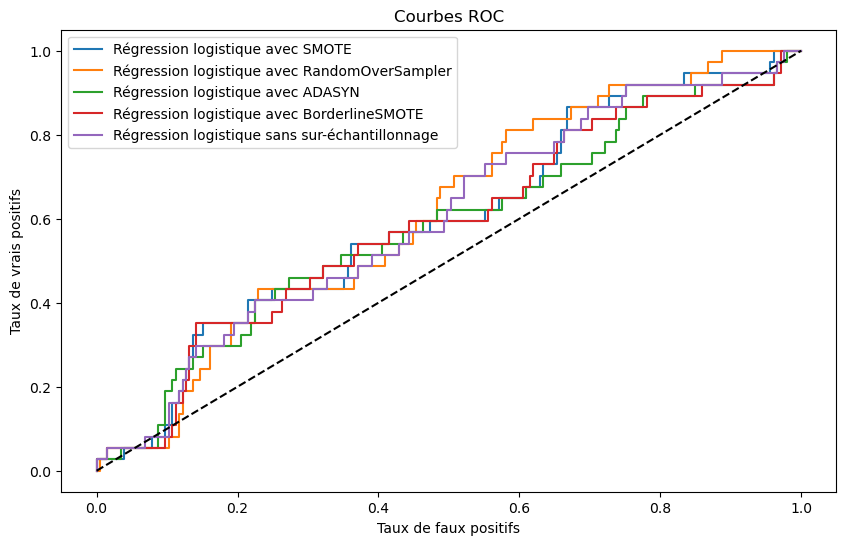

In [192]:
# Comparaison des courbes ROC

from sklearn.metrics import roc_curve

fpr_reg_log_smote, tpr_reg_log_smote, _ = roc_curve(y_test, y_proba_reg_log_smote)
fpr_reg_log_oversampler, tpr_reg_log_oversampler, _ = roc_curve(y_test, y_proba_reg_log_oversampler)
fpr_reg_log_adasyn, tpr_reg_log_adasyn, _ = roc_curve(y_test, y_proba_reg_log_adasyn)
fpr_reg_log_borderline_smote, tpr_reg_log_borderline_smote, _ = roc_curve(y_test, y_proba_reg_log_borderline_smote)
fpr_reg_log, tpr_reg_log, _ = roc_curve(y_test, y_proba_reg_log)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(fpr_reg_log_smote, tpr_reg_log_smote, label='Régression logistique avec SMOTE')
plt.plot(fpr_reg_log_oversampler, tpr_reg_log_oversampler, label='Régression logistique avec RandomOverSampler')
plt.plot(fpr_reg_log_adasyn, tpr_reg_log_adasyn, label='Régression logistique avec ADASYN')
plt.plot(fpr_reg_log_borderline_smote, tpr_reg_log_borderline_smote, label='Régression logistique avec BorderlineSMOTE')
plt.plot(fpr_reg_log, tpr_reg_log, label='Régression logistique sans sur-échantillonnage')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend()


# Export de l'image 
plt.savefig('data/Courbes_ROC_reg_log.png')

plt.show()

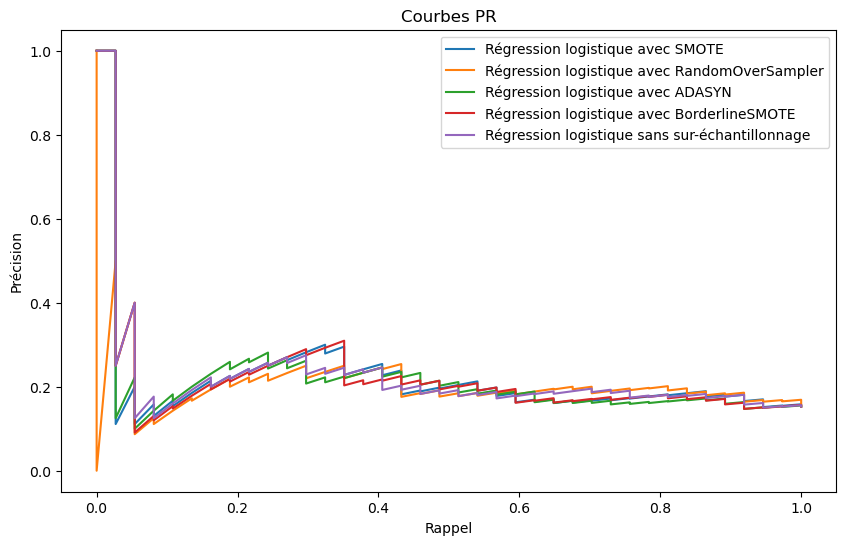

In [193]:
# Comparaison des courbes PR

from sklearn.metrics import precision_recall_curve

precision_reg_log_smote, recall_reg_log_smote, _ = precision_recall_curve(y_test, y_proba_reg_log_smote)
precision_reg_log_oversampler, recall_reg_log_oversampler, _ = precision_recall_curve(y_test, y_proba_reg_log_oversampler)
precision_reg_log_adasyn, recall_reg_log_adasyn, _ = precision_recall_curve(y_test, y_proba_reg_log_adasyn)
precision_reg_log_borderline_smote, recall_reg_log_borderline_smote, _ = precision_recall_curve(y_test, y_proba_reg_log_borderline_smote)
precision_reg_log, recall_reg_log, _ = precision_recall_curve(y_test, y_proba_reg_log)

plt.figure(figsize=(10, 6))
plt.plot(recall_reg_log_smote, precision_reg_log_smote, label='Régression logistique avec SMOTE')
plt.plot(recall_reg_log_oversampler, precision_reg_log_oversampler, label='Régression logistique avec RandomOverSampler')
plt.plot(recall_reg_log_adasyn, precision_reg_log_adasyn, label='Régression logistique avec ADASYN')
plt.plot(recall_reg_log_borderline_smote, precision_reg_log_borderline_smote, label='Régression logistique avec BorderlineSMOTE')
plt.plot(recall_reg_log, precision_reg_log, label='Régression logistique sans sur-échantillonnage')
plt.xlabel('Rappel')
plt.ylabel('Précision')
plt.title('Courbes PR')
plt.legend()
plt.show()

In [194]:
# Résultats

resultats_reg_log = pd.DataFrame({
    "Régression logistique sans sur-échantillonnage": [auc_roc_reg_log, auc_pr_reg_log, f1_reg_log,  balanced_acc_reg_log],
    "Régression logistique avec SMOTE": [auc_roc_reg_log_smote, auc_pr_reg_log_smote, f1_reg_log_smote, balanced_acc_reg_log_smote],
    "Régression logistique avec RandomOverSampler": [auc_roc_reg_log_oversampler, auc_pr_reg_log_oversampler,  f1_reg_log_oversampler, balanced_acc_reg_log_oversampler],
    "Régression logistique avec ADASYN": [auc_roc_reg_log_adasyn, auc_pr_reg_log_adasyn, f1_reg_log_adasyn, balanced_acc_reg_log_adasyn],
    "Régression logistique avec BorderlineSMOTE": [auc_roc_reg_log_borderline_smote, auc_pr_reg_log_borderline_smote,  f1_reg_log_borderline_smote, balanced_acc_reg_log_borderline_smote]
    },
    index = ["AUC-ROC", "AUC-PR", "F1-score", "Balanced accuracy"]
)

# Arrondir les résultats à 3 chiffres après la virgule
resultats_reg_log = resultats_reg_log.round(3)
resultats_reg_log

Régression logistique sans sur-échantillonnage  \
AUC-ROC                                                     0.600   
AUC-PR                                                      0.228   
F1-score                                                    0.050   
Balanced accuracy                                           0.509   

                   Régression logistique avec SMOTE  \
AUC-ROC                                       0.598   
AUC-PR                                        0.225   
F1-score                                      0.281   
Balanced accuracy                             0.565   

                   Régression logistique avec RandomOverSampler  \
AUC-ROC                                                   0.613   
AUC-PR                                                    0.212   
F1-score                                                  0.069   
Balanced accuracy                                         0.481   

                   Régression logistique avec ADASYN  \
AUC-ROC                                        0.580   
AUC-PR                                         0.221   
F1-score                                       0.286   
Balanced accuracy                              0.569   

                   Régression logistique avec BorderlineSMOTE  
AUC-ROC                                                 0.587  
AUC-PR                                                  0.226  
F1-score                                                0.288  
Balanced accuracy                                       0.570

In [195]:
# Export des résultats en lateX

# Export des résultats
resultats_reg_log.to_csv("data/resultats_reg_log.csv", index=True)
latex_table_reg_log = resultats_reg_log.to_latex(index=True)
print(latex_table_reg_log)

\begin{tabular}{lrrrrr}
\toprule
 & Régression logistique sans sur-échantillonnage & Régression logistique avec SMOTE & Régression logistique avec RandomOverSampler & Régression logistique avec ADASYN & Régression logistique avec BorderlineSMOTE \\
\midrule
AUC-ROC & 0.600000 & 0.598000 & 0.613000 & 0.580000 & 0.587000 \\
AUC-PR & 0.228000 & 0.225000 & 0.212000 & 0.221000 & 0.226000 \\
F1-score & 0.050000 & 0.281000 & 0.069000 & 0.286000 & 0.288000 \\
Balanced accuracy & 0.509000 & 0.565000 & 0.481000 & 0.569000 & 0.570000 \\
\bottomrule
\end{tabular}



### C) Ajustement des hyperparamètres

Pour la régression logistique, les hyperparamètres les plus courants à optimiser sont :
- C : Ce paramètre de régularisation inverse. Une valeur plus petite indique une régularisation plus forte.
- solver : L'algorithme utilisé pour l'optimisation. Les choix courants sont 'liblinear', 'lbfgs', 'saga', etc.
- penalty : Le type de régularisation à utiliser ('l1', 'l2', 'elasticnet', 'none')
- fonction de lien

In [200]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN, BorderlineSMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, f1_score, balanced_accuracy_score, roc_auc_score
from sklearn.model_selection import StratifiedKFold

# Grilles de paramètres réduites pour éviter le surapprentissage
param_grid_reg_log_oversampler = {
    'oversampler__sampling_strategy': [0.2, 0.4, 0.5, 0.75, 1.0],
    'reg_log__C': [0.001, 0.01, 0.1, 1, 10],
    'reg_log__penalty': ['l2', None],
    'reg_log__solver': ['saga']
}

param_grid_reg_log_smote = {
    'smote__sampling_strategy': [0.2, 0.4, 0.5, 0.75, 1.0],
    'smote__k_neighbors': [5, 7],
    'reg_log__C': [0.001, 0.01, 0.1, 1, 10],
    'reg_log__penalty': ['l2', None],
    'reg_log__solver': ['saga']
}

param_grid_reg_log_adasyn = {
    'adasyn__sampling_strategy': [0.2, 0.4, 0.5, 0.75, 1.0],
    'adasyn__n_neighbors': [5, 7],
    'reg_log__penalty': ['l2', None],
    'reg_log__solver': ['saga'],
    'reg_log__C': [0.001, 0.01, 0.1, 1, 10]
}

param_grid_reg_log_borderline_smote = {
    'borderline_smote__sampling_strategy': [0.2, 0.4, 0.5, 0.75, 1.0],
    'borderline_smote__k_neighbors': [5, 7],
    'reg_log__C': [0.001, 0.01, 0.1, 1, 10],
    'reg_log__penalty': ['l2'],
    'reg_log__solver': ['saga']
}

grille_param_reg_log_ = {
    'reg_log__C': [0.001, 0.01, 0.1, 1, 10],
    'reg_log__penalty': ['l2', None],
    'reg_log__solver': ['saga']
}

# Choix des métriques adaptées
scoring = {
    'F1': make_scorer(f1_score),
    'Balanced accuracy': make_scorer(balanced_accuracy_score),
    'AUC': make_scorer(roc_auc_score)
}

# Création des RandomizedSearchCV pour chaque pipeline avec des grilles réduites
grille_recherche_reg_log_oversampler = RandomizedSearchCV(
    estimator=modele_reg_log_oversampler,
    param_distributions=param_grid_reg_log_oversampler,
    scoring=scoring,
    refit='AUC',
    cv=cv,
    verbose=1,
    n_jobs=-1,
    n_iter=50,  # Réduction du nombre d'itérations
    random_state=42
)

grille_recherche_reg_log_smote = RandomizedSearchCV(
    estimator=modele_reg_log_smote,
    param_distributions=param_grid_reg_log_smote,
    scoring=scoring,
    refit='AUC',
    cv=cv,
    verbose=1,
    n_jobs=-1,
    n_iter=50,  # Réduction du nombre d'itérations
    random_state=42
)

grille_recherche_reg_log_adasyn = RandomizedSearchCV(
    estimator=modele_reg_log_adasyn,
    param_distributions=param_grid_reg_log_adasyn,
    scoring=scoring,
    refit='AUC',
    cv=cv,
    verbose=1,
    n_jobs=-1,
    n_iter=50,  # Réduction du nombre d'itérations
    random_state=42
)

grille_recherche_reg_log_borderline_smote = RandomizedSearchCV(
    estimator=modele_reg_log_borderline_smote,
    param_distributions=param_grid_reg_log_borderline_smote,
    scoring=scoring,
    refit='AUC',
    cv=cv,
    verbose=1,
    n_jobs=-1,
    n_iter=50,  # Réduction du nombre d'itérations
    random_state=42
)

grille_recherche_reg_log = RandomizedSearchCV(
    estimator=modele_reg_log,
    param_distributions=grille_param_reg_log_,
    scoring=scoring,
    refit='AUC',
    cv=cv,
    verbose=1,
    n_jobs=-1,
    n_iter=50,  # Réduction du nombre d'itérations
    random_state=42
)


In [201]:
# Récupération des meilleurs modèles

modele_reg_log_oversampler_opt = grille_recherche_reg_log_oversampler.fit(X_train, y_train).best_estimator_

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 60 is smaller than n_iter=100. Running 60 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 10 folds for each of 60 candidates, totalling 600 fits


c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\utils\fixes.py", line 85, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\pipeline.py", line 329, in fit
    Xt, yt = self._fit(

In [202]:
modele_reg_log_smote_opt = grille_recherche_reg_log_smote.fit(X_train, y_train).best_estimator_

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
140 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
140 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\utils\fixes.py", line 85, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\pipeline.py", line 329, in fit
    Xt, yt = self._fit

In [203]:
modele_reg_log_adasyn_opt = grille_recherche_reg_log_adasyn.fit(X_train, y_train).best_estimator_

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
170 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
170 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\utils\fixes.py", line 85, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\pipeline.py", line 329, in fit
    Xt, yt = self._fit

In [204]:
modele_reg_log_borderline_smote_opt = grille_recherche_reg_log_borderline_smote.fit(X_train, y_train).best_estimator_

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
170 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
170 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\utils\fixes.py", line 85, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\pipeline.py", line 329, in fit
    Xt, yt = self._fit

In [205]:
modele_reg_log_opt = grille_recherche_reg_log.fit(X_train, y_train).best_estimator_

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 10 is smaller than n_iter=100. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 10 folds for each of 10 candidates, totalling 100 fits


c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [206]:
# Affichage des meilleurs paramètres pour chaque pipeline
print("Meilleurs paramètres pour la régression logistique avec RandomOverSampler:", modele_reg_log_oversampler_opt)
print("Meilleurs paramètres pour la régression logistique avec SMOTE:", modele_reg_log_smote_opt)
print("Meilleurs paramètres pour la régression logistique avec ADASYN:", modele_reg_log_adasyn_opt)
print("Meilleurs paramètres pour la régression logistique avec BorderlineSMOTE:", modele_reg_log_borderline_smote_opt)
print("Meilleurs paramètres pour la régression logistique sans sur-échantillonnage:", modele_reg_log_opt)

Meilleurs paramètres pour la régression logistique avec RandomOverSampler: Pipeline(steps=[('std_scaler', StandardScaler()),
                ('oversampler', RandomOverSampler()),
                ('reg_log',
                 LogisticRegression(C=1, penalty='none', random_state=42,
                                    solver='saga'))])
Meilleurs paramètres pour la régression logistique avec SMOTE: Pipeline(steps=[('std_scaler', StandardScaler()),
                ('smote', SMOTE(k_neighbors=3)),
                ('reg_log',
                 LogisticRegression(C=10, random_state=42, solver='saga'))])
Meilleurs paramètres pour la régression logistique avec ADASYN: Pipeline(steps=[('std_scaler', StandardScaler()),
                ('adasyn', ADASYN(sampling_strategy=1.0)),
                ('reg_log',
                 LogisticRegression(C=0.01, penalty='none', random_state=42,
                                    solver='saga'))])
Meilleurs paramètres pour la régression logistique avec Borderline

In [207]:
# Entraînement des meilleurs modèles

modele_reg_log_oversampler_opt.fit(X_train, y_train)

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Pipeline(steps=[('std_scaler', StandardScaler()),
                ('oversampler', RandomOverSampler()),
                ('reg_log',
                 LogisticRegression(C=1, penalty='none', random_state=42,
                                    solver='saga'))])

In [208]:
modele_reg_log_smote_opt.fit(X_train, y_train)

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Pipeline(steps=[('std_scaler', StandardScaler()),
                ('smote', SMOTE(k_neighbors=3)),
                ('reg_log',
                 LogisticRegression(C=10, random_state=42, solver='saga'))])

In [209]:
modele_reg_log_adasyn_opt.fit(X_train, y_train)

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Pipeline(steps=[('std_scaler', StandardScaler()),
                ('adasyn', ADASYN(sampling_strategy=1.0)),
                ('reg_log',
                 LogisticRegression(C=0.01, penalty='none', random_state=42,
                                    solver='saga'))])

In [210]:
modele_reg_log_borderline_smote_opt.fit(X_train, y_train)

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Pipeline(steps=[('std_scaler', StandardScaler()),
                ('borderline_smote', BorderlineSMOTE(k_neighbors=7)),
                ('reg_log',
                 LogisticRegression(C=1, random_state=42, solver='saga'))])

In [211]:
modele_reg_log_opt.fit(X_train, y_train)

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Pipeline(steps=[('std_scaler', StandardScaler()),
                ('reg_log',
                 LogisticRegression(C=0.01, penalty='none', random_state=42,
                                    solver='saga'))])

In [212]:
# Prédiction sur l'échantillon test
y_proba_reg_log_smote_cv = modele_reg_log_smote_opt.predict_proba(X_test)[:, 1]
y_pred_reg_log_smote_cv = modele_reg_log_smote_opt.predict(X_test)

y_proba_reg_log_oversampler_cv = modele_reg_log_oversampler_opt.predict_proba(X_test)[:, 1]
y_pred_reg_log_oversampler_cv = modele_reg_log_oversampler_opt.predict(X_test)

y_proba_reg_log_adasyn_cv = modele_reg_log_adasyn_opt.predict_proba(X_test)[:, 1]
y_pred_reg_log_adasyn_cv = modele_reg_log_adasyn_opt.predict(X_test)

y_proba_reg_log_borderline_smote_cv = modele_reg_log_borderline_smote_opt.predict_proba(X_test)[:, 1]
y_pred_reg_log_borderline_smote_cv = modele_reg_log_borderline_smote_opt.predict(X_test)

y_proba_reg_log_cv = modele_reg_log_opt.predict_proba(X_test)[:, 1]
y_pred_reg_log_cv = modele_reg_log_opt.predict(X_test)


### D) Mesure de la performance des modèles optimisés

In [213]:
# Calcul des métriques pour chaque modèle

# Calcul des métriques
auc_roc_reg_log_smote_cv = roc_auc_score(y_test, y_proba_reg_log_smote_cv)
auc_pr_reg_log_smote_cv = average_precision_score(y_test, y_proba_reg_log_smote_cv)
log_loss_value_reg_log_smote_cv = log_loss(y_test, y_proba_reg_log_smote_cv)
precision_reg_log_smote_cv = precision_score(y_test, y_pred_reg_log_smote_cv)
recall_reg_log_smote_cv = recall_score(y_test, y_pred_reg_log_smote_cv)
f1_reg_log_smote_cv = f1_score(y_test, y_pred_reg_log_smote_cv)
mcc_reg_log_smote_cv = matthews_corrcoef(y_test, y_pred_reg_log_smote_cv)
balanced_acc_reg_log_smote_cv = balanced_accuracy_score(y_test, y_pred_reg_log_smote_cv)
specificity_reg_log_smote_cv = confusion_matrix(y_test, y_pred_reg_log_smote_cv)[0, 0] / (confusion_matrix(y_test, y_pred_reg_log_smote_cv)[0, 0] + confusion_matrix(y_test, y_pred_reg_log_smote_cv)[0, 1])
cohen_kappa_reg_log_smote_cv = cohen_kappa_score(y_test, y_pred_reg_log_smote_cv)

In [214]:
auc_roc_reg_log_oversampler_cv = roc_auc_score(y_test, y_proba_reg_log_oversampler_cv)
auc_pr_reg_log_oversampler_cv = average_precision_score(y_test, y_proba_reg_log_oversampler_cv)
log_loss_value_reg_log_oversampler_cv = log_loss(y_test, y_proba_reg_log_oversampler_cv)
precision_reg_log_oversampler_cv = precision_score(y_test, y_pred_reg_log_oversampler_cv)
recall_reg_log_oversampler_cv = recall_score(y_test, y_pred_reg_log_oversampler_cv)
f1_reg_log_oversampler_cv = f1_score(y_test, y_pred_reg_log_oversampler_cv)
mcc_reg_log_oversampler_cv = matthews_corrcoef(y_test, y_pred_reg_log_oversampler_cv)
balanced_acc_reg_log_oversampler_cv = balanced_accuracy_score(y_test, y_pred_reg_log_oversampler_cv)
specificity_reg_log_oversampler_cv = confusion_matrix(y_test, y_pred_reg_log_oversampler_cv)[0, 0] / (confusion_matrix(y_test, y_pred_reg_log_oversampler_cv)[0, 0] + confusion_matrix(y_test, y_pred_reg_log_oversampler_cv)[0, 1])
cohen_kappa_reg_log_oversampler_cv = cohen_kappa_score(y_test, y_pred_reg_log_oversampler_cv)

In [215]:
auc_roc_reg_log_adasyn_cv = roc_auc_score(y_test, y_proba_reg_log_adasyn_cv)
auc_pr_reg_log_adasyn_cv = average_precision_score(y_test, y_proba_reg_log_adasyn_cv)
log_loss_value_reg_log_adasyn_cv = log_loss(y_test, y_proba_reg_log_adasyn_cv)
precision_reg_log_adasyn_cv = precision_score(y_test, y_pred_reg_log_adasyn_cv)
recall_reg_log_adasyn_cv = recall_score(y_test, y_pred_reg_log_adasyn_cv)
f1_reg_log_adasyn_cv = f1_score(y_test, y_pred_reg_log_adasyn_cv)
mcc_reg_log_adasyn_cv = matthews_corrcoef(y_test, y_pred_reg_log_adasyn_cv)
balanced_acc_reg_log_adasyn_cv = balanced_accuracy_score(y_test, y_pred_reg_log_adasyn_cv)
specificity_reg_log_adasyn_cv = confusion_matrix(y_test, y_pred_reg_log_adasyn_cv)[0, 0] / (confusion_matrix(y_test, y_pred_reg_log_adasyn_cv)[0, 0] + confusion_matrix(y_test, y_pred_reg_log_adasyn_cv)[0, 1])
cohen_kappa_reg_log_adasyn_cv = cohen_kappa_score(y_test, y_pred_reg_log_adasyn_cv)

In [216]:
auc_roc_reg_log_borderline_smote = roc_auc_score(y_test, y_proba_reg_log_borderline_smote_cv)
auc_pr_reg_log_borderline_smote = average_precision_score(y_test, y_proba_reg_log_borderline_smote_cv)
log_loss_value_reg_log_borderline_smote = log_loss(y_test, y_proba_reg_log_borderline_smote_cv)
precision_reg_log_borderline_smote = precision_score(y_test, y_pred_reg_log_borderline_smote_cv)
recall_reg_log_borderline_smote = recall_score(y_test, y_pred_reg_log_borderline_smote_cv)
f1_reg_log_borderline_smote = f1_score(y_test, y_pred_reg_log_borderline_smote_cv)
mcc_reg_log_borderline_smote = matthews_corrcoef(y_test, y_pred_reg_log_borderline_smote_cv)
balanced_acc_reg_log_borderline_smote = balanced_accuracy_score(y_test, y_pred_reg_log_borderline_smote_cv)
specificity_reg_log_borderline_smote = confusion_matrix(y_test, y_pred_reg_log_borderline_smote_cv)[0, 0] / (confusion_matrix(y_test, y_pred_reg_log_borderline_smote_cv)[0, 0] + confusion_matrix(y_test, y_pred_reg_log_borderline_smote_cv)[0, 1])
cohen_kappa_reg_log_borderline_smote = cohen_kappa_score(y_test, y_pred_reg_log_borderline_smote_cv)

In [217]:
auc_roc_reg_log_cv = roc_auc_score(y_test, y_proba_reg_log_cv)
auc_pr_reg_log_cv = average_precision_score(y_test, y_proba_reg_log_cv)
log_loss_value_reg_log_cv = log_loss(y_test, y_proba_reg_log_cv)
precision_reg_log_cv = precision_score(y_test, y_pred_reg_log_cv)
recall_reg_log_cv = recall_score(y_test, y_pred_reg_log_cv)
f1_reg_log_cv = f1_score(y_test, y_pred_reg_log_cv)
mcc_reg_log_cv = matthews_corrcoef(y_test, y_pred_reg_log_cv)
balanced_acc_reg_log_cv = balanced_accuracy_score(y_test, y_pred_reg_log_cv)
specificity_reg_log_cv = confusion_matrix(y_test, y_pred_reg_log_cv)[0, 0] / (confusion_matrix(y_test, y_pred_reg_log_cv)[0, 0] + confusion_matrix(y_test, y_pred_reg_log_cv)[0, 1])
cohen_kappa_reg_log_cv = cohen_kappa_score(y_test, y_pred_reg_log_cv)

In [218]:
# Affichage des résultats

resultats_reg_log_cv = pd.DataFrame({
    "Régression logistique sans sur-échantillonnage": [auc_roc_reg_log_cv, auc_pr_reg_log_cv, f1_reg_log_cv, balanced_acc_reg_log_cv],
    "Régression logistique avec SMOTE": [auc_roc_reg_log_smote_cv, auc_pr_reg_log_smote_cv, f1_reg_log_smote_cv, balanced_acc_reg_log_smote_cv],
    "Régression logistique avec RandomOverSampler": [auc_roc_reg_log_oversampler_cv, auc_pr_reg_log_oversampler_cv, f1_reg_log_oversampler_cv, balanced_acc_reg_log_oversampler_cv],
    "Régression logistique avec ADASYN": [auc_roc_reg_log_adasyn_cv, auc_pr_reg_log_adasyn_cv, f1_reg_log_adasyn_cv, balanced_acc_reg_log_adasyn_cv,],
    "Régression logistique avec BorderlineSMOTE": [auc_roc_reg_log_borderline_smote, auc_pr_reg_log_borderline_smote, f1_reg_log_borderline_smote, balanced_acc_reg_log_borderline_smote]},
    index = ["AUC-ROC", "AUC-PR", "F1-score","Balanced accuracy"]
)

# Arrondir les résultats à 3 chiffres après la virgule
resultats_reg_log_cv = resultats_reg_log_cv.round(3)
resultats_reg_log_cv

Régression logistique sans sur-échantillonnage  \
AUC-ROC                                                     0.589   
AUC-PR                                                      0.227   
F1-score                                                    0.050   
Balanced accuracy                                           0.509   

                   Régression logistique avec SMOTE  \
AUC-ROC                                       0.580   
AUC-PR                                        0.234   
F1-score                                      0.252   
Balanced accuracy                             0.536   

                   Régression logistique avec RandomOverSampler  \
AUC-ROC                                                   0.586   
AUC-PR                                                    0.236   
F1-score                                                  0.281   
Balanced accuracy                                         0.565   

                   Régression logistique avec ADASYN  \
AUC-ROC                                        0.577   
AUC-PR                                         0.201   
F1-score                                       0.263   
Balanced accuracy                              0.543   

                   Régression logistique avec BorderlineSMOTE  
AUC-ROC                                                 0.587  
AUC-PR                                                  0.212  
F1-score                                                0.310  
Balanced accuracy                                       0.595

In [219]:
# Export des résultats
resultats_reg_log_cv.to_csv("data/resultats_reg_log_opt.csv", index=True)
latex_table_reg_log = resultats_reg_log_cv.to_latex(index=True)
print(latex_table_reg_log)

\begin{tabular}{lrrrrr}
\toprule
 & Régression logistique sans sur-échantillonnage & Régression logistique avec SMOTE & Régression logistique avec RandomOverSampler & Régression logistique avec ADASYN & Régression logistique avec BorderlineSMOTE \\
\midrule
AUC-ROC & 0.589000 & 0.580000 & 0.586000 & 0.577000 & 0.587000 \\
AUC-PR & 0.227000 & 0.234000 & 0.236000 & 0.201000 & 0.212000 \\
F1-score & 0.050000 & 0.252000 & 0.281000 & 0.263000 & 0.310000 \\
Balanced accuracy & 0.509000 & 0.536000 & 0.565000 & 0.543000 & 0.595000 \\
\bottomrule
\end{tabular}



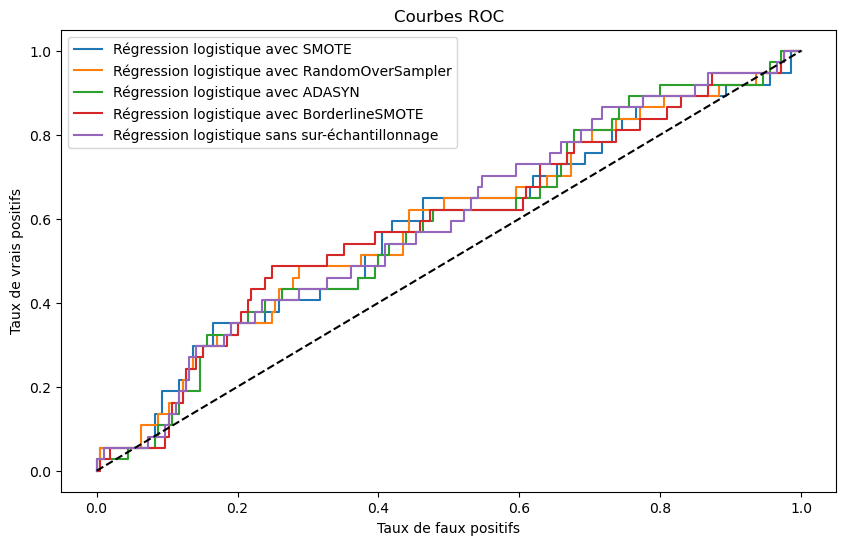

In [220]:
# Comparaison des courbes ROC

fpr_reg_log_smote_cv, tpr_reg_log_smote_cv, _ = roc_curve(y_test, y_proba_reg_log_smote_cv)
fpr_reg_log_oversampler_cv, tpr_reg_log_oversampler_cv, _ = roc_curve(y_test, y_proba_reg_log_oversampler_cv)
fpr_reg_log_adasyn_cv, tpr_reg_log_adasyn_cv, _ = roc_curve(y_test, y_proba_reg_log_adasyn_cv)
fpr_reg_log_borderline_smote_cv, tpr_reg_log_borderline_smote_cv, _ = roc_curve(y_test, y_proba_reg_log_borderline_smote_cv)
fpr_reg_log, tpr_reg_log, _ = roc_curve(y_test, y_proba_reg_log_cv)

plt.figure(figsize=(10, 6))
plt.plot(fpr_reg_log_smote_cv, tpr_reg_log_smote_cv, label='Régression logistique avec SMOTE')
plt.plot(fpr_reg_log_oversampler_cv, tpr_reg_log_oversampler_cv, label='Régression logistique avec RandomOverSampler')
plt.plot(fpr_reg_log_adasyn_cv, tpr_reg_log_adasyn_cv, label='Régression logistique avec ADASYN')
plt.plot(fpr_reg_log_borderline_smote_cv, tpr_reg_log_borderline_smote_cv, label='Régression logistique avec BorderlineSMOTE')
plt.plot(fpr_reg_log, tpr_reg_log, label='Régression logistique sans sur-échantillonnage')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend()

# Export de l'image
plt.savefig('data/Courbes_ROC_reg_log_cv.png')

plt.show()



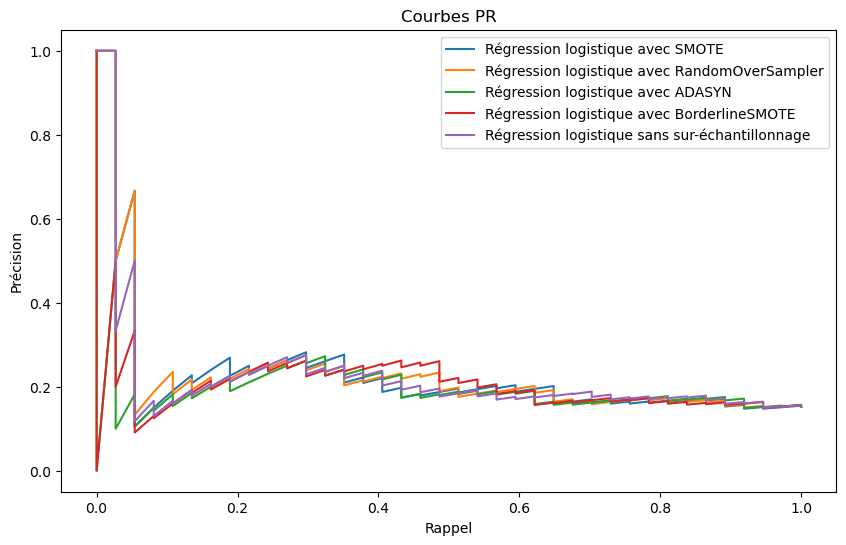

In [221]:
# Comparaison des courbes PR

precision_reg_log_smote_cv, recall_reg_log_smote_cv, _ = precision_recall_curve(y_test, y_proba_reg_log_smote_cv)
precision_reg_log_oversampler_cv, recall_reg_log_oversampler_cv, _ = precision_recall_curve(y_test, y_proba_reg_log_oversampler_cv)
precision_reg_log_adasyn_cv, recall_reg_log_adasyn_cv, _ = precision_recall_curve(y_test, y_proba_reg_log_adasyn_cv)
precision_reg_log_borderline_smote_cv, recall_reg_log_borderline_smote_cv, _ = precision_recall_curve(y_test, y_proba_reg_log_borderline_smote_cv)
precision_reg_log_cv, recall_reg_log_cv, _ = precision_recall_curve(y_test, y_proba_reg_log_cv)

plt.figure(figsize=(10, 6))
plt.plot(recall_reg_log_smote_cv, precision_reg_log_smote_cv, label='Régression logistique avec SMOTE')
plt.plot(recall_reg_log_oversampler_cv, precision_reg_log_oversampler_cv, label='Régression logistique avec RandomOverSampler')
plt.plot(recall_reg_log_adasyn_cv, precision_reg_log_adasyn_cv, label='Régression logistique avec ADASYN')
plt.plot(recall_reg_log_borderline_smote_cv, precision_reg_log_borderline_smote_cv, label='Régression logistique avec BorderlineSMOTE')
plt.plot(recall_reg_log_cv, precision_reg_log_cv, label='Régression logistique sans sur-échantillonnage')

plt.xlabel('Rappel')
plt.ylabel('Précision')
plt.title('Courbes PR')

plt.legend()
plt.show()

### E) Importance des variables

In [222]:
# Importance des variables

# Récupération des coefficients de la régression logistique
coefficients_reg_log_smote = modele_reg_log_smote_opt.named_steps['reg_log'].coef_[0]
coefficients_reg_log_oversampler = modele_reg_log_oversampler_opt.named_steps['reg_log'].coef_[0]
coefficients_reg_log_adasyn = modele_reg_log_adasyn_opt.named_steps['reg_log'].coef_[0]
coefficients_reg_log_borderline_smote = modele_reg_log_borderline_smote_opt.named_steps['reg_log'].coef_[0]
coefficients_reg_log = modele_reg_log_opt.named_steps['reg_log'].coef_[0]

# Récupération des noms des variables
noms_variables = X.columns

# Création d'un DataFrame pour afficher les résultats
resultats_importance_variables_reg_log_smote = pd.DataFrame({
    "Variable": noms_variables,
    "Coefficient": coefficients_reg_log_smote
})

resultats_importance_variables_reg_log_oversampler = pd.DataFrame({
    "Variable": noms_variables,
    "Coefficient": coefficients_reg_log_oversampler
})

resultats_importance_variables_reg_log_adasyn = pd.DataFrame({
    "Variable": noms_variables,
    "Coefficient": coefficients_reg_log_adasyn
})

resultats_importance_variables_reg_log_borderline_smote = pd.DataFrame({
    "Variable": noms_variables,
    "Coefficient": coefficients_reg_log_borderline_smote
})

resultats_importance_variables_reg_log = pd.DataFrame({
    "Variable": noms_variables,
    "Coefficient": coefficients_reg_log
})

# Affichage des résultats
resultats_importance_variables_reg_log_smote = resultats_importance_variables_reg_log_smote.sort_values(by="Coefficient", ascending=False)
resultats_importance_variables_reg_log_oversampler = resultats_importance_variables_reg_log_oversampler.sort_values(by="Coefficient", ascending=False)
resultats_importance_variables_reg_log_adasyn = resultats_importance_variables_reg_log_adasyn.sort_values(by="Coefficient", ascending=False)
resultats_importance_variables_reg_log_borderline_smote = resultats_importance_variables_reg_log_borderline_smote.sort_values(by="Coefficient", ascending=False)
resultats_importance_variables_reg_log = resultats_importance_variables_reg_log.sort_values(by="Coefficient", ascending=False)

resultats_importance_variables_reg_log_smote

Variable  Coefficient
12                        superf_choro     0.594672
15                part_trajets_voiture     0.188768
24              abstention_municipales     0.174311
18                               p_pop     0.167240
21                       part_inactifs     0.108069
27             part_licencies_sportifs     0.107585
31                          climat_Mer     0.106770
6                nb_actes_france_renov     0.089624
8                         ecoquartiers     0.067429
26                   total_entreprises     0.065970
30                     climat_Estuaire     0.065906
7                               friche     0.060611
20  com_variation_encours_dette_ha_pct     0.003979
3        moyenne_conso_residentiel_hab     0.002175
1              moyenne_conso_indus_hab     0.000062
17                                  an     0.000000
28            part_jeunes_sans_diplome    -0.001636
14                            gare_tgv    -0.002056
4             moyenne_conso_totale_hab    -0.018102
19                           CSP_maire    -0.021809
0               moyenne_conso_agri_hab    -0.025467
2          moyenne_conso_tertiaire_hab    -0.027137
29                        climat_Autre    -0.121103
25                   taux_creation_ent    -0.142907
13                         departement    -0.152662
9          part_residences_secondaires    -0.166758
23                      dependance_eco    -0.174769
16                            med_disp    -0.182659
10                   beneficiaire_prog    -0.190942
22                         part_actifs    -0.226005
11                            gridens7    -0.355688
5                        emissions_ges    -0.566426

In [223]:
resultats_importance_variables_reg_log_oversampler

Variable  Coefficient
12                        superf_choro     0.565936
6                nb_actes_france_renov     0.225372
27             part_licencies_sportifs     0.150377
18                               p_pop     0.144458
24              abstention_municipales     0.134795
21                       part_inactifs     0.115637
0               moyenne_conso_agri_hab     0.099965
30                     climat_Estuaire     0.096260
2          moyenne_conso_tertiaire_hab     0.087669
31                          climat_Mer     0.081111
14                            gare_tgv     0.071695
15                part_trajets_voiture     0.044157
26                   total_entreprises     0.016825
19                           CSP_maire     0.006725
20  com_variation_encours_dette_ha_pct     0.001268
17                                  an     0.000000
28            part_jeunes_sans_diplome    -0.002624
4             moyenne_conso_totale_hab    -0.015903
1              moyenne_conso_indus_hab    -0.028109
7                               friche    -0.032484
8                         ecoquartiers    -0.036157
23                      dependance_eco    -0.044620
25                   taux_creation_ent    -0.082879
13                         departement    -0.091868
16                            med_disp    -0.093992
29                        climat_Autre    -0.103395
10                   beneficiaire_prog    -0.111693
22                         part_actifs    -0.160077
3        moyenne_conso_residentiel_hab    -0.188717
9          part_residences_secondaires    -0.221930
11                            gridens7    -0.242746
5                        emissions_ges    -0.468420

In [224]:
resultats_importance_variables_reg_log_adasyn

Variable  Coefficient
12                        superf_choro     0.581995
18                               p_pop     0.162656
15                part_trajets_voiture     0.149391
27             part_licencies_sportifs     0.121367
6                nb_actes_france_renov     0.116632
24              abstention_municipales     0.112055
31                          climat_Mer     0.083842
26                   total_entreprises     0.077066
30                     climat_Estuaire     0.066955
1              moyenne_conso_indus_hab     0.051183
8                         ecoquartiers     0.025742
20  com_variation_encours_dette_ha_pct     0.025231
21                       part_inactifs     0.023548
23                      dependance_eco     0.009313
17                                  an     0.000000
19                           CSP_maire    -0.003162
4             moyenne_conso_totale_hab    -0.012576
14                            gare_tgv    -0.013570
7                               friche    -0.018546
2          moyenne_conso_tertiaire_hab    -0.027744
0               moyenne_conso_agri_hab    -0.038181
28            part_jeunes_sans_diplome    -0.047649
29                        climat_Autre    -0.098847
3        moyenne_conso_residentiel_hab    -0.100306
25                   taux_creation_ent    -0.141188
13                         departement    -0.150860
10                   beneficiaire_prog    -0.153348
16                            med_disp    -0.202699
22                         part_actifs    -0.218750
9          part_residences_secondaires    -0.235286
11                            gridens7    -0.267233
5                        emissions_ges    -0.447101

In [225]:
resultats_importance_variables_reg_log_borderline_smote

Variable  Coefficient
12                        superf_choro     0.599764
24              abstention_municipales     0.236983
18                               p_pop     0.218281
27             part_licencies_sportifs     0.190119
15                part_trajets_voiture     0.076474
6                nb_actes_france_renov     0.075915
31                          climat_Mer     0.075219
21                       part_inactifs     0.071108
19                           CSP_maire     0.067314
7                               friche     0.045880
14                            gare_tgv     0.042819
1              moyenne_conso_indus_hab     0.040566
30                     climat_Estuaire     0.033080
26                   total_entreprises     0.018489
2          moyenne_conso_tertiaire_hab     0.011795
4             moyenne_conso_totale_hab     0.008075
28            part_jeunes_sans_diplome     0.004418
0               moyenne_conso_agri_hab     0.001790
17                                  an     0.000000
8                         ecoquartiers    -0.018191
20  com_variation_encours_dette_ha_pct    -0.045869
23                      dependance_eco    -0.066451
25                   taux_creation_ent    -0.080610
29                        climat_Autre    -0.082023
3        moyenne_conso_residentiel_hab    -0.092052
16                            med_disp    -0.104836
13                         departement    -0.123140
9          part_residences_secondaires    -0.205164
10                   beneficiaire_prog    -0.218175
11                            gridens7    -0.249336
22                         part_actifs    -0.251633
5                        emissions_ges    -0.503123

In [226]:
resultats_importance_variables_reg_log

Variable  Coefficient
12                        superf_choro     0.454515
24              abstention_municipales     0.156739
14                            gare_tgv     0.101528
27             part_licencies_sportifs     0.094986
18                               p_pop     0.094180
31                          climat_Mer     0.079359
30                     climat_Estuaire     0.064369
6                nb_actes_france_renov     0.050852
7                               friche     0.048591
15                part_trajets_voiture     0.037053
0               moyenne_conso_agri_hab     0.036094
21                       part_inactifs     0.035394
2          moyenne_conso_tertiaire_hab     0.034145
26                   total_entreprises     0.032531
19                           CSP_maire     0.025880
28            part_jeunes_sans_diplome     0.013743
1              moyenne_conso_indus_hab     0.011969
20  com_variation_encours_dette_ha_pct     0.002694
8                         ecoquartiers     0.001763
4             moyenne_conso_totale_hab     0.000042
17                                  an     0.000000
23                      dependance_eco    -0.025967
25                   taux_creation_ent    -0.071710
10                   beneficiaire_prog    -0.087867
13                         departement    -0.089583
16                            med_disp    -0.091414
29                        climat_Autre    -0.093808
3        moyenne_conso_residentiel_hab    -0.123009
11                            gridens7    -0.162898
22                         part_actifs    -0.181448
9          part_residences_secondaires    -0.197021
5                        emissions_ges    -0.305072

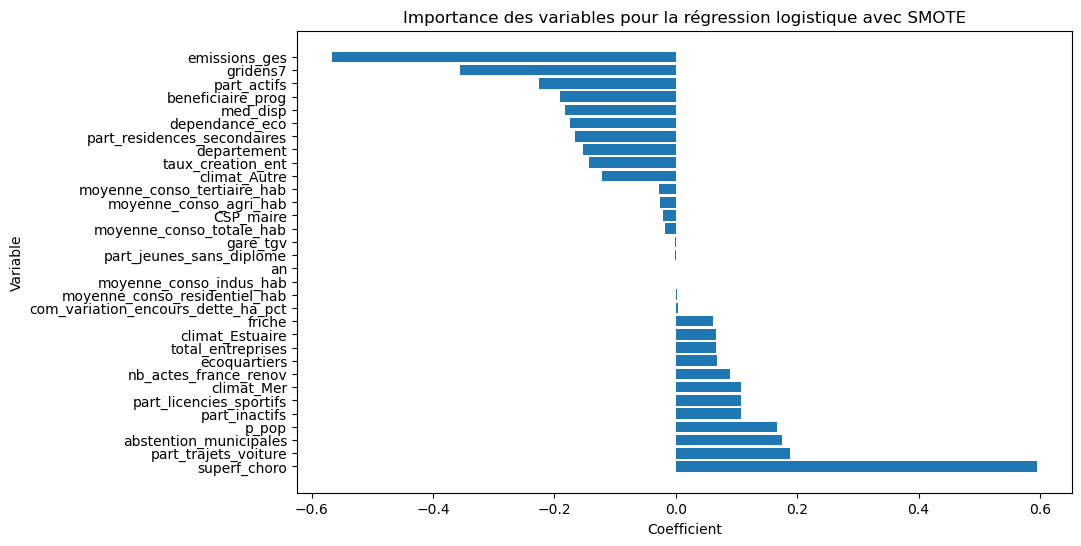

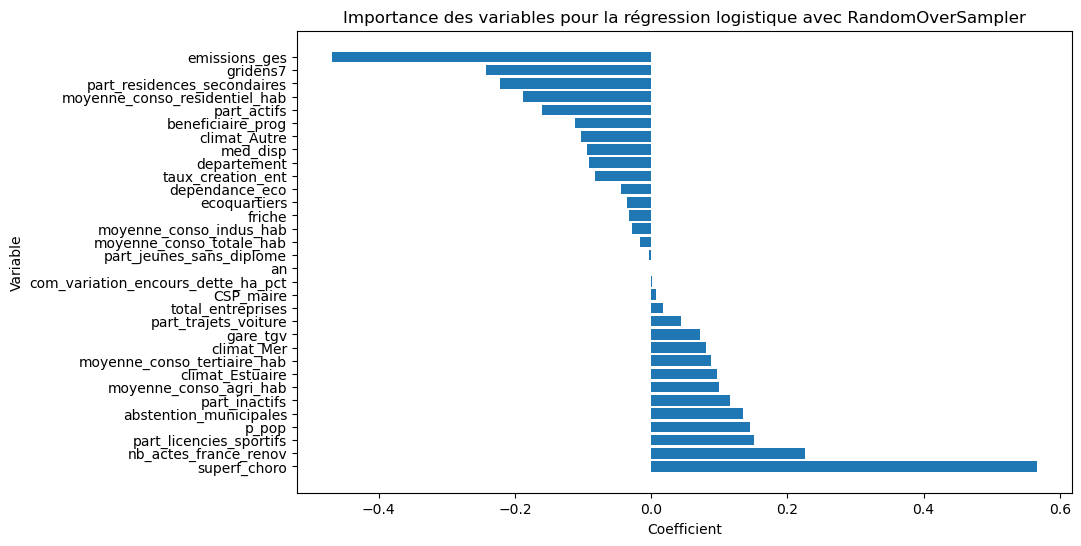

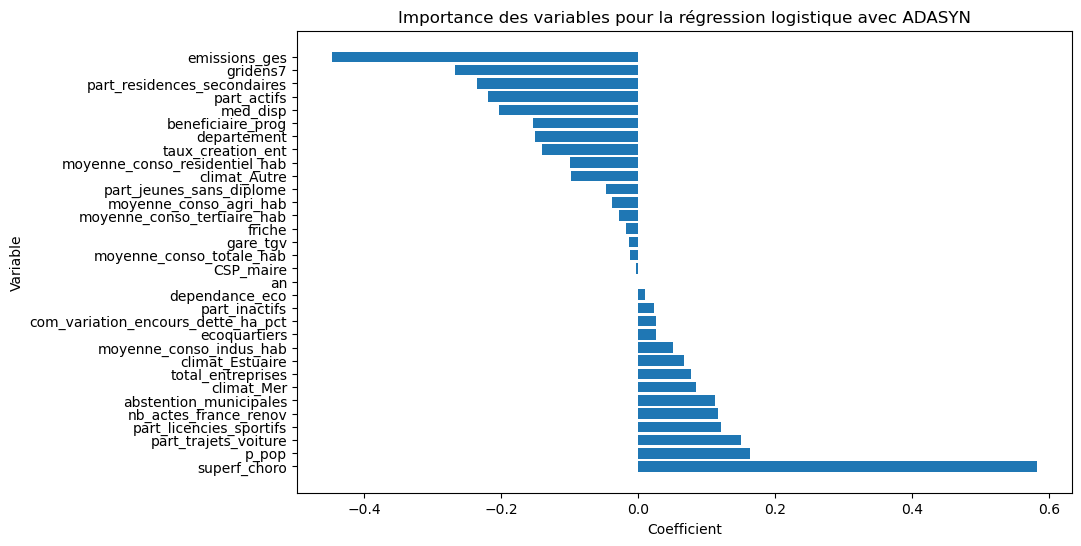

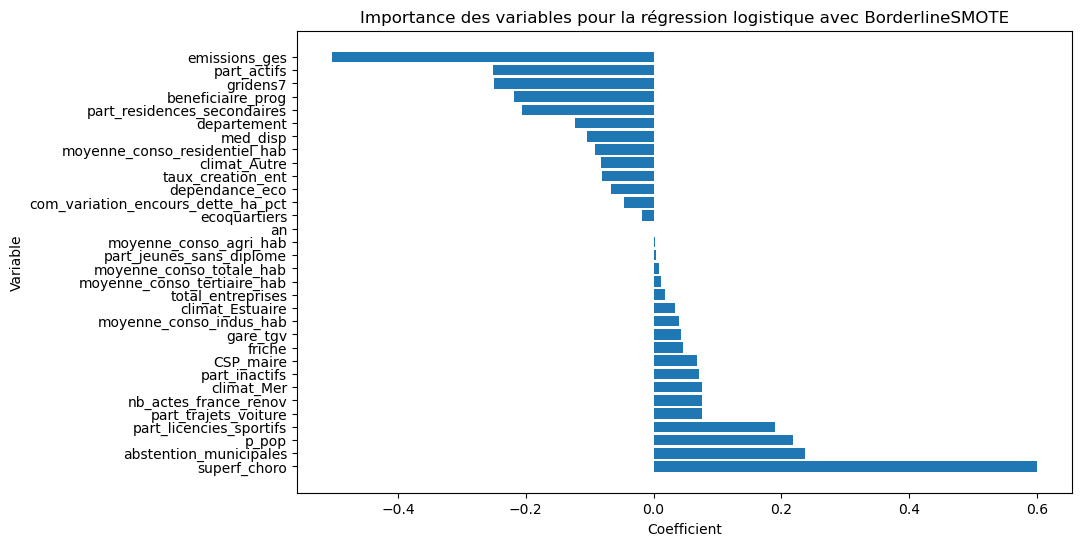

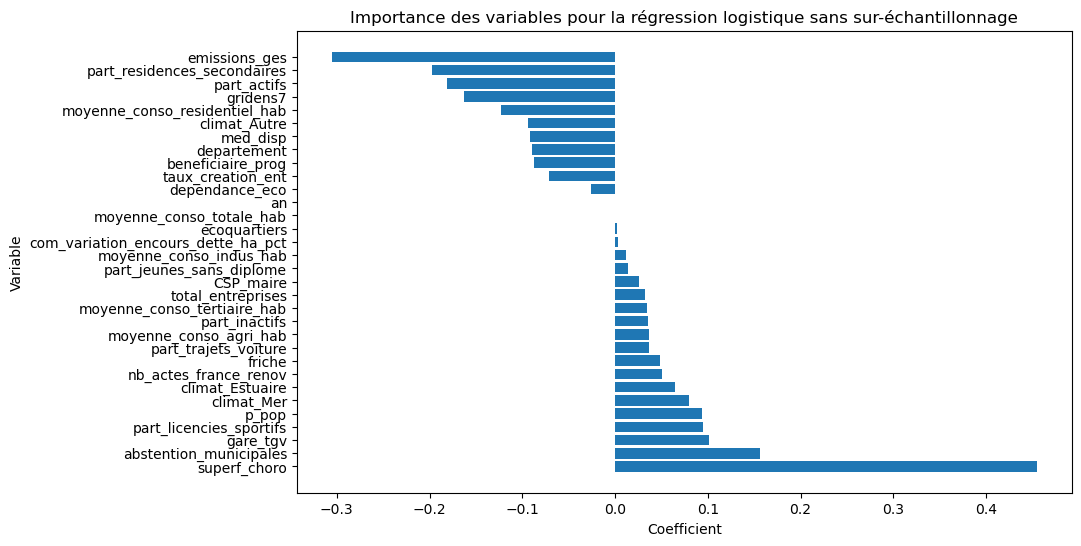

In [227]:
# Graphique pour l'importance des variables

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_reg_log_smote["Variable"], resultats_importance_variables_reg_log_smote["Coefficient"])
plt.xlabel("Coefficient")
plt.ylabel("Variable")
plt.title("Importance des variables pour la régression logistique avec SMOTE")
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_reg_log_oversampler["Variable"], resultats_importance_variables_reg_log_oversampler["Coefficient"])
plt.xlabel("Coefficient")
plt.ylabel("Variable")
plt.title("Importance des variables pour la régression logistique avec RandomOverSampler")
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_reg_log_adasyn["Variable"], resultats_importance_variables_reg_log_adasyn["Coefficient"])
plt.xlabel("Coefficient")
plt.ylabel("Variable")
plt.title("Importance des variables pour la régression logistique avec ADASYN")
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_reg_log_borderline_smote["Variable"], resultats_importance_variables_reg_log_borderline_smote["Coefficient"])
plt.xlabel("Coefficient")
plt.ylabel("Variable")
plt.title("Importance des variables pour la régression logistique avec BorderlineSMOTE")
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_reg_log["Variable"], resultats_importance_variables_reg_log["Coefficient"])
plt.xlabel("Coefficient")
plt.ylabel("Variable")
plt.title("Importance des variables pour la régression logistique sans sur-échantillonnage")
plt.show()

## I.2.3. Arbres de décision

### A) Construction des modèles

In [228]:
# Construction du modèle d'arbres de décision avec rééquilibrage des classes

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE
from imblearn.pipeline import Pipeline

etapes_arbre_oversampler = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('oversampler', RandomOverSampler(sampling_strategy = 0.4)), # Sur-échantillonnage
        ('arbre', DecisionTreeClassifier(max_depth=5, random_state=42)), # Arbre de décision
        ]

etapes_arbre_smote = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('smote', SMOTE(k_neighbors= 5)), # Sur-échantillonnage
        ('arbre', DecisionTreeClassifier(max_depth=5, random_state=42)), # Arbre de décision
        ]

etapes_arbre_adasyn = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('adasyn', ADASYN(n_neighbors = 5)), # Sur-échantillonnage
        ('arbre', DecisionTreeClassifier(max_depth=5, random_state=42)), # Arbre de décision
        ]

etapes_arbre_borderline_smote = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('borderline_smote', BorderlineSMOTE(k_neighbors = 5)), # Sur-échantillonnage
        ('arbre', DecisionTreeClassifier(max_depth=5, random_state=42)), # Arbre de décision
        ]

etapes_arbres = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('arbre', DecisionTreeClassifier(max_depth=5, random_state=42)), # Arbre de décision
        ]

# Justification de max_depth=5 : pour éviter l'overfitting
# On a choisi la valeur 5 car c'est une valeur standard qui permet de ne pas trop complexifier l'arbre de décision

modele_arbre_oversampler = Pipeline(steps=etapes_arbre_oversampler) # Création du pipeline
modele_arbre_smote = Pipeline(steps=etapes_arbre_smote) # Création du pipeline
modele_arbre_adasyn = Pipeline(steps=etapes_arbre_adasyn) # Création du pipeline
modele_arbre_borderline_smote = Pipeline(steps=etapes_arbre_borderline_smote) # Création du pipeline
modele_arbre = Pipeline(steps=etapes_arbres) # Création du pipeline

In [229]:
modele_arbre_oversampler.fit(X_train, y_train) # Entraînement
modele_arbre_smote.fit(X_train, y_train) # Entraînement
modele_arbre_adasyn.fit(X_train, y_train) # Entraînement
modele_arbre_borderline_smote.fit(X_train, y_train) # Entraînement
modele_arbre.fit(X_train, y_train) # Entraînement

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('arbre',
                 DecisionTreeClassifier(max_depth=5, random_state=42))])

In [230]:
# Prédictions

y_proba_arbre_oversampler = modele_arbre_oversampler.predict_proba(X_test)[:, 1]
y_pred_arbre_oversampler = modele_arbre_oversampler.predict(X_test)

y_proba_arbre_smote = modele_arbre_smote.predict_proba(X_test)[:, 1]
y_pred_arbre_smote = modele_arbre_smote.predict(X_test)

y_proba_arbre_adasyn = modele_arbre_adasyn.predict_proba(X_test)[:, 1]
y_pred_arbre_adasyn = modele_arbre_adasyn.predict(X_test)

y_proba_arbre_borderline_smote = modele_arbre_borderline_smote.predict_proba(X_test)[:, 1]
y_pred_arbre_borderline_smote = modele_arbre_borderline_smote.predict(X_test)

y_proba_arbre = modele_arbre.predict_proba(X_test)[:, 1]
y_pred_arbre = modele_arbre.predict(X_test)

### B) Mesure de la performance des modèles initiaux

In [231]:
# Calcul des métriques

from sklearn.metrics import roc_auc_score, average_precision_score, log_loss
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, cohen_kappa_score

auc_roc_arbre_oversampler = roc_auc_score(y_test, y_proba_arbre_oversampler)
auc_pr_arbre_oversampler = average_precision_score(y_test, y_proba_arbre_oversampler)
log_loss_value_arbre_oversampler = log_loss(y_test, y_proba_arbre_oversampler)
precision_arbre_oversampler = precision_score(y_test, y_pred_arbre_oversampler)
recall_arbre_oversampler = recall_score(y_test, y_pred_arbre_oversampler)
f1_arbre_oversampler = f1_score(y_test, y_pred_arbre_oversampler)
mcc_arbre_oversampler = matthews_corrcoef(y_test, y_pred_arbre_oversampler)
balanced_acc_arbre_oversampler = balanced_accuracy_score(y_test, y_pred_arbre_oversampler)
specificity_arbre_oversampler = confusion_matrix(y_test, y_pred_arbre_oversampler)[0, 0] / (confusion_matrix(y_test, y_pred_arbre_oversampler)[0, 0] + confusion_matrix(y_test, y_pred_arbre_oversampler)[0, 1])
cohen_kappa_arbre_oversampler = cohen_kappa_score(y_test, y_pred_arbre_oversampler)

In [232]:
auc_roc_arbre_smote = roc_auc_score(y_test, y_proba_arbre_smote)
auc_pr_arbre_smote = average_precision_score(y_test, y_proba_arbre_smote)
log_loss_value_arbre_smote = log_loss(y_test, y_proba_arbre_smote)
precision_arbre_smote = precision_score(y_test, y_pred_arbre_smote)
recall_arbre_smote = recall_score(y_test, y_pred_arbre_smote)
f1_arbre_smote = f1_score(y_test, y_pred_arbre_smote)
mcc_arbre_smote = matthews_corrcoef(y_test, y_pred_arbre_smote)
balanced_acc_arbre_smote = balanced_accuracy_score(y_test, y_pred_arbre_smote)
specificity_arbre_smote = confusion_matrix(y_test, y_pred_arbre_smote)[0, 0] / (confusion_matrix(y_test, y_pred_arbre_smote)[0, 0] + confusion_matrix(y_test, y_pred_arbre_smote)[0, 1])
cohen_kappa_arbre_smote = cohen_kappa_score(y_test, y_pred_arbre_smote)

In [233]:
auc_roc_arbre_adasyn = roc_auc_score(y_test, y_proba_arbre_adasyn)
auc_pr_arbre_adasyn = average_precision_score(y_test, y_proba_arbre_adasyn)
log_loss_value_arbre_adasyn = log_loss(y_test, y_proba_arbre_adasyn)
precision_arbre_adasyn = precision_score(y_test, y_pred_arbre_adasyn)
recall_arbre_adasyn = recall_score(y_test, y_pred_arbre_adasyn)
f1_arbre_adasyn = f1_score(y_test, y_pred_arbre_adasyn)
mcc_arbre_adasyn = matthews_corrcoef(y_test, y_pred_arbre_adasyn)
balanced_acc_arbre_adasyn = balanced_accuracy_score(y_test, y_pred_arbre_adasyn)
specificity_arbre_adasyn = confusion_matrix(y_test, y_pred_arbre_adasyn)[0, 0] / (confusion_matrix(y_test, y_pred_arbre_adasyn)[0, 0] + confusion_matrix(y_test, y_pred_arbre_adasyn)[0, 1])
cohen_kappa_arbre_adasyn = cohen_kappa_score(y_test, y_pred_arbre_adasyn)

In [234]:
auc_roc_arbre_borderline_smote = roc_auc_score(y_test, y_proba_arbre_borderline_smote)
auc_pr_arbre_borderline_smote = average_precision_score(y_test, y_proba_arbre_borderline_smote)
log_loss_value_arbre_borderline_smote = log_loss(y_test, y_proba_arbre_borderline_smote)
precision_arbre_borderline_smote = precision_score(y_test, y_pred_arbre_borderline_smote)
recall_arbre_borderline_smote = recall_score(y_test, y_pred_arbre_borderline_smote)
f1_arbre_borderline_smote = f1_score(y_test, y_pred_arbre_borderline_smote)
mcc_arbre_borderline_smote = matthews_corrcoef(y_test, y_pred_arbre_borderline_smote)
balanced_acc_arbre_borderline_smote = balanced_accuracy_score(y_test, y_pred_arbre_borderline_smote)
specificity_arbre_borderline_smote = confusion_matrix(y_test, y_pred_arbre_borderline_smote)[0, 0] / (confusion_matrix(y_test, y_pred_arbre_borderline_smote)[0, 0] + confusion_matrix(y_test, y_pred_arbre_borderline_smote)[0, 1])
cohen_kappa_arbre_borderline_smote = cohen_kappa_score(y_test, y_pred_arbre_borderline_smote)

In [235]:
auc_roc_arbre = roc_auc_score(y_test, y_proba_arbre)
auc_pr_arbre = average_precision_score(y_test, y_proba_arbre)
log_loss_value_arbre = log_loss(y_test, y_proba_arbre)
precision_arbre = precision_score(y_test, y_pred_arbre)
recall_arbre = recall_score(y_test, y_pred_arbre)
f1_arbre = f1_score(y_test, y_pred_arbre)
mcc_arbre = matthews_corrcoef(y_test, y_pred_arbre)
balanced_acc_arbre = balanced_accuracy_score(y_test, y_pred_arbre)
specificity_arbre = confusion_matrix(y_test, y_pred_arbre)[0, 0] / (confusion_matrix(y_test, y_pred_arbre)[0, 0] + confusion_matrix(y_test, y_pred_arbre)[0, 1])
cohen_kappa_arbre = cohen_kappa_score(y_test, y_pred_arbre)

In [236]:
# Affichage des résultats
resultats_arbres = pd.DataFrame({
    "Arbre de décision sans sur-échantillonnage": [auc_roc_arbre, auc_pr_arbre, f1_arbre, balanced_acc_arbre],
    "Arbre de décision avec SMOTE": [auc_roc_arbre_smote, auc_pr_arbre_smote, f1_arbre_smote, balanced_acc_arbre_smote],
    "Arbre de décision avec RandomOverSampler": [auc_roc_arbre_oversampler, auc_pr_arbre_oversampler, f1_arbre_oversampler, balanced_acc_arbre_oversampler],
    "Arbre de décision avec ADASYN": [auc_roc_arbre_adasyn, auc_pr_arbre_adasyn, f1_arbre_adasyn, balanced_acc_arbre_adasyn],
    "Arbre de décision avec BorderlineSMOTE": [auc_roc_arbre_borderline_smote, auc_pr_arbre_borderline_smote, f1_arbre_borderline_smote, balanced_acc_arbre_borderline_smote]
    },
    index = ["AUC-ROC", "AUC-PR", "F1-score", "Balanced accuracy"]
)

# Arrondir les résultats à 3 chiffres après la virgule
resultats_arbres = resultats_arbres.round(3)
resultats_arbres

Arbre de décision sans sur-échantillonnage  \
AUC-ROC                                                 0.647   
AUC-PR                                                  0.237   
F1-score                                                0.203   
Balanced accuracy                                       0.542   

                   Arbre de décision avec SMOTE  \
AUC-ROC                                   0.627   
AUC-PR                                    0.196   
F1-score                                  0.292   
Balanced accuracy                         0.574   

                   Arbre de décision avec RandomOverSampler  \
AUC-ROC                                               0.503   
AUC-PR                                                0.166   
F1-score                                              0.182   
Balanced accuracy                                     0.514   

                   Arbre de décision avec ADASYN  \
AUC-ROC                                    0.575   
AUC-PR                                     0.178   
F1-score                                   0.262   
Balanced accuracy                          0.540   

                   Arbre de décision avec BorderlineSMOTE  
AUC-ROC                                             0.610  
AUC-PR                                              0.192  
F1-score                                            0.294  
Balanced accuracy                                   0.576

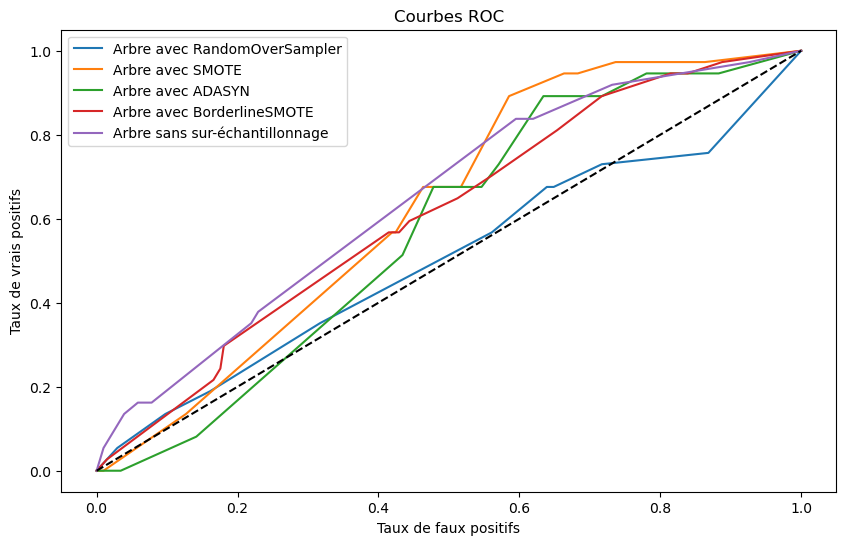

In [237]:
# Tracé des courbes ROC

from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr_arbre_oversampler, tpr_arbre_oversampler, _ = roc_curve(y_test, y_proba_arbre_oversampler)
fpr_arbre_smote, tpr_arbre_smote, _ = roc_curve(y_test, y_proba_arbre_smote)
fpr_arbre_adasyn, tpr_arbre_adasyn, _ = roc_curve(y_test, y_proba_arbre_adasyn)
fpr_arbre_borderline_smote, tpr_arbre_borderline_smote, _ = roc_curve(y_test, y_proba_arbre_borderline_smote)
fpr_arbre, tpr_arbre, _ = roc_curve(y_test, y_proba_arbre)

plt.figure(figsize=(10, 6))
plt.plot(fpr_arbre_oversampler, tpr_arbre_oversampler, label='Arbre avec RandomOverSampler')
plt.plot(fpr_arbre_smote, tpr_arbre_smote, label='Arbre avec SMOTE')
plt.plot(fpr_arbre_adasyn, tpr_arbre_adasyn, label='Arbre avec ADASYN')
plt.plot(fpr_arbre_borderline_smote, tpr_arbre_borderline_smote, label='Arbre avec BorderlineSMOTE')
plt.plot(fpr_arbre, tpr_arbre, label='Arbre sans sur-échantillonnage')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend()

# Sauvegarde et export de l'image
plt.savefig('data/Courbes_ROC_arbres.png')

plt.show()



### C) Ajustement des hyperparamètres

In [238]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import f1_score, cohen_kappa_score, balanced_accuracy_score, make_scorer, roc_auc_score

# Grilles de paramètres adaptées pour éviter le surapprentissage
param_grid_arbres_oversampler = {
    'oversampler__sampling_strategy': [0.2, 0.4, 0.5, 0.75, 1.0],  # Stratégies simplifiées pour échantillonnage
    'arbre__criterion': ['gini', 'entropy', 'log_loss'],
    'arbre__max_depth': [3, 6, 9, 15],  # Réduction des profondeurs possibles pour limiter la complexité
    'arbre__min_samples_split': [10, 20, 30],  # Augmentation de min_samples_split pour éviter surapprentissage
    'arbre__min_samples_leaf': [2, 4]  # Augmentation de min_samples_leaf pour éviter surapprentissage
}

param_grid_arbres_smote = {
    'smote__k_neighbors': [5, 7],  # Réduction des voisins pour SMOTE
    'smote__sampling_strategy': [0.2, 0.4, 0.5, 0.75, 1.0], 
    'arbre__criterion': ['gini', 'entropy', 'log_loss'],
    'arbre__max_depth': [3, 6, 9, 15],
    'arbre__min_samples_split': [10, 20, 30],
    'arbre__min_samples_leaf': [2, 4]
}

param_grid_arbres_adasyn = {
    'adasyn__n_neighbors': [5, 7], 
    'adasyn__sampling_strategy': [0.2, 0.4, 0.5, 0.75, 1.0], 
    'arbre__criterion': ['gini', 'entropy', 'log_loss'],
    'arbre__max_depth': [3, 6, 9, 15],
    'arbre__min_samples_split': [10, 20, 30],
    'arbre__min_samples_leaf': [2, 4]
}

param_grid_arbres_borderline_smote = {
    'borderline_smote__k_neighbors': [5, 7], 
    'borderline_smote__sampling_strategy': [0.2, 0.4, 0.5, 0.75, 1.0],
    'arbre__criterion': ['gini', 'entropy', 'log_loss'],
    'arbre__max_depth': [3, 6, 9, 15],
    'arbre__min_samples_split': [10, 20, 30],
    'arbre__min_samples_leaf': [2, 4]
}

param_grid_arbres = {
    'arbre__criterion': ['gini', 'entropy', 'log_loss'], 
    'arbre__max_depth': [3, 6, 9, 15], 
    'arbre__min_samples_split': [10, 20, 30], 
    'arbre__min_samples_leaf': [2, 4] 
}

# Choix des métriques adaptées
scoring = {
    'F1': make_scorer(f1_score),
    'Balanced accuracy': make_scorer(balanced_accuracy_score),
    'AUC': make_scorer(roc_auc_score),
}

In [239]:
# Ajustement des hyperparamètres

grille_recherche_arbre_oversampler = RandomizedSearchCV(modele_arbre_oversampler, param_grid_arbres_oversampler, cv=cv, scoring=scoring, refit = 'AUC',n_jobs=-1, n_iter=50, random_state=42)
grille_recherche_arbre_smote = RandomizedSearchCV(modele_arbre_smote, param_grid_arbres_smote, cv=cv, scoring=scoring, refit = 'AUC',n_jobs=-1, n_iter=50, random_state=42)
grille_recherche_arbre_adasyn = RandomizedSearchCV(modele_arbre_adasyn, param_grid_arbres_adasyn, cv=cv, scoring=scoring, refit = 'AUC',n_jobs=-1, n_iter=50, random_state=42)
grille_recherche_arbre_borderline_smote = RandomizedSearchCV(modele_arbre_borderline_smote, param_grid_arbres_borderline_smote, cv=cv, scoring=scoring, refit = 'AUC',n_jobs=-1, n_iter=50, random_state=42)
grille_recherche_arbre = RandomizedSearchCV(modele_arbre, param_grid_arbres, cv=cv, scoring=scoring, refit = 'AUC',n_jobs=-1, n_iter=50, random_state=42)

In [240]:
modele_arbre_oversampler_opt = grille_recherche_arbre_oversampler.fit(X_train, y_train).best_estimator_ 

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
150 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\utils\fixes.py", line 85, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\pipeline.py", line 329, in fit
    Xt, yt = self._fit

In [241]:
modele_arbre_smote_opt = grille_recherche_arbre_smote.fit(X_train, y_train).best_estimator_

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
150 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\utils\fixes.py", line 85, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\pipeline.py", line 329, in fit
    Xt, yt = self._fit

In [242]:
modele_arbre_adasyn_opt = grille_recherche_arbre_adasyn.fit(X_train, y_train).best_estimator_

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
210 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
210 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\utils\fixes.py", line 85, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\pipeline.py", line 329, in fit
    Xt, yt = self._fit

In [243]:
modele_arbre_borderline_smote_opt = grille_recherche_arbre_borderline_smote.fit(X_train, y_train).best_estimator_

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
150 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\utils\fixes.py", line 85, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\pipeline.py", line 329, in fit
    Xt, yt = self._fit

In [244]:
modele_arbre_opt = grille_recherche_arbre.fit(X_train, y_train).best_estimator_

In [245]:
# Prédictions avec les meilleurs hyperparamètres

y_proba_arbre_oversampler_cv = modele_arbre_oversampler_opt.predict_proba(X_test)[:, 1]
y_pred_arbre_oversampler_cv = modele_arbre_oversampler_opt.predict(X_test)

y_proba_arbre_smote_cv = modele_arbre_smote_opt.predict_proba(X_test)[:, 1]
y_pred_arbre_smote_cv = modele_arbre_smote_opt.predict(X_test)

y_proba_arbre_adasyn_cv = modele_arbre_adasyn_opt.predict_proba(X_test)[:, 1]
y_pred_arbre_adasyn_cv = modele_arbre_adasyn_opt.predict(X_test)

y_proba_arbre_borderline_smote_cv = modele_arbre_borderline_smote_opt.predict_proba(X_test)[:, 1]
y_pred_arbre_borderline_smote_cv = modele_arbre_borderline_smote_opt.predict(X_test)

y_proba_arbre_cv = modele_arbre_opt.predict_proba(X_test)[:, 1]
y_pred_arbre_cv = modele_arbre_opt.predict(X_test)

### D) Mesure de la performance des modèles optimisés

In [246]:
# Mesure de la performance

# Calcul des métriques
auc_roc_arbre_oversampler_cv = roc_auc_score(y_test, y_proba_arbre_oversampler_cv)
auc_pr_arbre_oversampler_cv = average_precision_score(y_test, y_proba_arbre_oversampler_cv)
log_loss_value_arbre_oversampler_cv = log_loss(y_test, y_proba_arbre_oversampler_cv)
precision_arbre_oversampler_cv = precision_score(y_test, y_pred_arbre_oversampler_cv)
recall_arbre_oversampler_cv = recall_score(y_test, y_pred_arbre_oversampler_cv)
f1_arbre_oversampler_cv = f1_score(y_test, y_pred_arbre_oversampler_cv)
mcc_arbre_oversampler_cv = matthews_corrcoef(y_test, y_pred_arbre_oversampler_cv)
balanced_acc_arbre_oversampler_cv = balanced_accuracy_score(y_test, y_pred_arbre_oversampler_cv)
specificity_arbre_oversampler_cv = confusion_matrix(y_test, y_pred_arbre_oversampler_cv)[0, 0] / (confusion_matrix(y_test, y_pred_arbre_oversampler_cv)[0, 0] + confusion_matrix(y_test, y_pred_arbre_oversampler_cv)[0, 1])
cohen_kappa_arbre_oversampler_cv = cohen_kappa_score(y_test, y_pred_arbre_oversampler_cv)

auc_roc_arbre_smote_cv = roc_auc_score(y_test, y_proba_arbre_smote_cv)
auc_pr_arbre_smote_cv = average_precision_score(y_test, y_proba_arbre_smote_cv)
log_loss_value_arbre_smote_cv = log_loss(y_test, y_proba_arbre_smote_cv)
precision_arbre_smote_cv = precision_score(y_test, y_pred_arbre_smote_cv)
recall_arbre_smote_cv = recall_score(y_test, y_pred_arbre_smote_cv)
f1_arbre_smote_cv = f1_score(y_test, y_pred_arbre_smote_cv)
mcc_arbre_smote_cv = matthews_corrcoef(y_test, y_pred_arbre_smote_cv)
specificity_arbre_smote_cv = confusion_matrix(y_test, y_pred_arbre_smote_cv)[0, 0] / (confusion_matrix(y_test, y_pred_arbre_smote_cv)[0, 0] + confusion_matrix(y_test, y_pred_arbre_smote_cv)[0, 1])
balanced_acc_arbre_smote_cv = balanced_accuracy_score(y_test, y_pred_arbre_smote_cv)
cohen_kappa_arbre_smote_cv = cohen_kappa_score(y_test, y_pred_arbre_smote_cv)

auc_roc_arbre_adasyn_cv = roc_auc_score(y_test, y_proba_arbre_adasyn_cv)
auc_pr_arbre_adasyn_cv = average_precision_score(y_test, y_proba_arbre_adasyn_cv)
log_loss_value_arbre_adasyn_cv = log_loss(y_test, y_proba_arbre_adasyn_cv)
precision_arbre_adasyn_cv = precision_score(y_test, y_pred_arbre_adasyn_cv)
recall_arbre_adasyn_cv = recall_score(y_test, y_pred_arbre_adasyn_cv)
f1_arbre_adasyn_cv = f1_score(y_test, y_pred_arbre_adasyn_cv)
mcc_arbre_adasyn_cv = matthews_corrcoef(y_test, y_pred_arbre_adasyn_cv)
balanced_acc_arbre_adasyn_cv = balanced_accuracy_score(y_test, y_pred_arbre_adasyn_cv)
specificity_arbre_adasyn_cv = confusion_matrix(y_test, y_pred_arbre_adasyn_cv)[0, 0] / (confusion_matrix(y_test, y_pred_arbre_adasyn_cv)[0, 0] + confusion_matrix(y_test, y_pred_arbre_adasyn_cv)[0, 1])
cohen_kappa_arbre_adasyn_cv = cohen_kappa_score(y_test, y_pred_arbre_adasyn_cv)

auc_roc_arbre_borderline_smote_cv = roc_auc_score(y_test, y_proba_arbre_borderline_smote_cv)
auc_pr_arbre_borderline_smote_cv = average_precision_score(y_test, y_proba_arbre_borderline_smote_cv)
log_loss_value_arbre_borderline_smote_cv = log_loss(y_test, y_proba_arbre_borderline_smote_cv)
precision_arbre_borderline_smote_cv = precision_score(y_test, y_pred_arbre_borderline_smote_cv)
recall_arbre_borderline_smote_cv = recall_score(y_test, y_pred_arbre_borderline_smote_cv)
f1_arbre_borderline_smote_cv = f1_score(y_test, y_pred_arbre_borderline_smote_cv)
mcc_arbre_borderline_smote_cv = matthews_corrcoef(y_test, y_pred_arbre_borderline_smote_cv)
balanced_acc_arbre_borderline_smote_cv = balanced_accuracy_score(y_test, y_pred_arbre_borderline_smote_cv)
specificity_arbre_borderline_smote_cv = confusion_matrix(y_test, y_pred_arbre_borderline_smote_cv)[0, 0] / (confusion_matrix(y_test, y_pred_arbre_borderline_smote_cv)[0, 0] + confusion_matrix(y_test, y_pred_arbre_borderline_smote_cv)[0, 1])
cohens_kappa_arbre_borderline_smote_cv = cohen_kappa_score(y_test, y_pred_arbre_borderline_smote_cv)

auc_roc_arbre_cv = roc_auc_score(y_test, y_proba_arbre_cv)
auc_pr_arbre_cv = average_precision_score(y_test, y_proba_arbre_cv)
log_loss_value_arbre_cv = log_loss(y_test, y_proba_arbre_cv)
precision_arbre_cv = precision_score(y_test, y_pred_arbre_cv)
recall_arbre_cv = recall_score(y_test, y_pred_arbre_cv)
f1_arbre_cv = f1_score(y_test, y_pred_arbre_cv)
mcc_arbre_cv = matthews_corrcoef(y_test, y_pred_arbre_cv)
balanced_acc_arbre_cv = balanced_accuracy_score(y_test, y_pred_arbre_cv)
specificity_arbre_cv = confusion_matrix(y_test, y_pred_arbre_cv)[0, 0] / (confusion_matrix(y_test, y_pred_arbre_cv)[0, 0] + confusion_matrix(y_test, y_pred_arbre_cv)[0, 1])
cohen_kappa_arbre_cv = cohen_kappa_score(y_test, y_pred_arbre_cv)

In [247]:
# Affichage des résultats

resultats_arbres_cv = pd.DataFrame({
    "Arbre de décision sans sur-échantillonnage": [auc_roc_arbre_cv, auc_pr_arbre_cv, f1_arbre_cv, balanced_acc_arbre_cv],
    "Arbre de décision avec SMOTE": [auc_roc_arbre_smote_cv, auc_pr_arbre_smote_cv, f1_arbre_smote_cv, balanced_acc_arbre_smote_cv],
    "Arbre de décision avec RandomOverSampler": [auc_roc_arbre_oversampler_cv, auc_pr_arbre_oversampler_cv,  f1_arbre_oversampler_cv, balanced_acc_arbre_oversampler_cv],
    "Arbre de décision avec ADASYN": [auc_roc_arbre_adasyn_cv, auc_pr_arbre_adasyn_cv, f1_arbre_adasyn_cv, balanced_acc_arbre_adasyn_cv ],
    "Arbre de décision avec BorderlineSMOTE": [auc_roc_arbre_borderline_smote_cv, auc_pr_arbre_borderline_smote_cv, f1_arbre_borderline_smote_cv, balanced_acc_arbre_borderline_smote_cv]
    },
    index = ["AUC-ROC", "AUC-PR", "F1", "Balanced Accuracy"]
)

# Arrondir les résultats à 3 chiffres après la virgule
resultats_arbres_cv = resultats_arbres_cv.round(3)
resultats_arbres_cv


Arbre de décision sans sur-échantillonnage  \
AUC-ROC                                                 0.578   
AUC-PR                                                  0.210   
F1                                                      0.278   
Balanced Accuracy                                       0.574   

                   Arbre de décision avec SMOTE  \
AUC-ROC                                   0.588   
AUC-PR                                    0.181   
F1                                        0.296   
Balanced Accuracy                         0.580   

                   Arbre de décision avec RandomOverSampler  \
AUC-ROC                                               0.556   
AUC-PR                                                0.169   
F1                                                    0.270   
Balanced Accuracy                                     0.559   

                   Arbre de décision avec ADASYN  \
AUC-ROC                                    0.599   
AUC-PR                                     0.195   
F1                                         0.329   
Balanced Accuracy                          0.618   

                   Arbre de décision avec BorderlineSMOTE  
AUC-ROC                                             0.527  
AUC-PR                                              0.161  
F1                                                  0.272  
Balanced Accuracy                                   0.551

In [248]:
# Export
resultats_arbres_cv.to_csv("data/resultats_arbres_opt.csv", index=True)
latex_table_arbres = resultats_arbres_cv.to_latex(index=True)
print(latex_table_arbres)

\begin{tabular}{lrrrrr}
\toprule
 & Arbre de décision sans sur-échantillonnage & Arbre de décision avec SMOTE & Arbre de décision avec RandomOverSampler & Arbre de décision avec ADASYN & Arbre de décision avec BorderlineSMOTE \\
\midrule
AUC-ROC & 0.578000 & 0.588000 & 0.556000 & 0.599000 & 0.527000 \\
AUC-PR & 0.210000 & 0.181000 & 0.169000 & 0.195000 & 0.161000 \\
F1 & 0.278000 & 0.296000 & 0.270000 & 0.329000 & 0.272000 \\
Balanced Accuracy & 0.574000 & 0.580000 & 0.559000 & 0.618000 & 0.551000 \\
\bottomrule
\end{tabular}



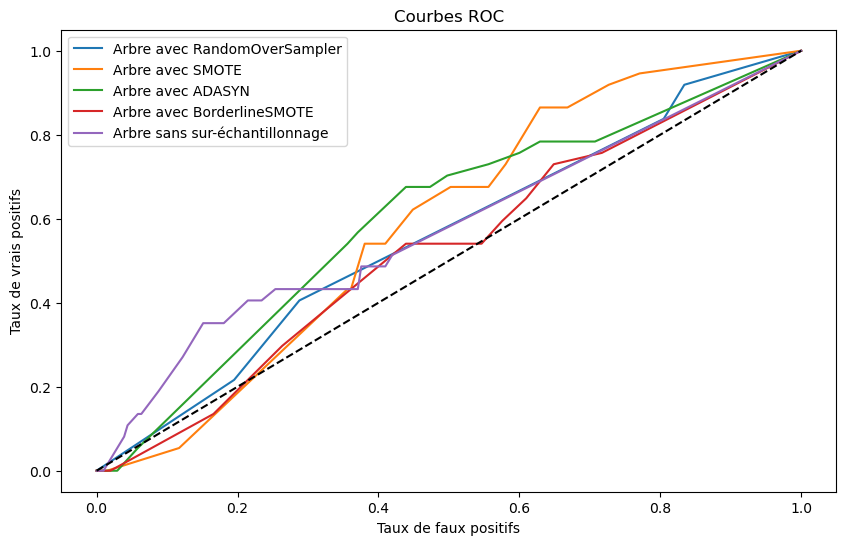

In [249]:
# Comparaison des courbes ROC

fpr_arbre_oversampler_cv, tpr_arbre_oversampler_cv, _ = roc_curve(y_test, y_proba_arbre_oversampler_cv)
fpr_arbre_smote_cv, tpr_arbre_smote_cv, _ = roc_curve(y_test, y_proba_arbre_smote_cv)
fpr_arbre_adasyn_cv, tpr_arbre_adasyn_cv, _ = roc_curve(y_test, y_proba_arbre_adasyn_cv)
fpr_arbre_borderline_smote_cv, tpr_arbre_borderline_smote_cv, _ = roc_curve(y_test, y_proba_arbre_borderline_smote_cv)
fpr_arbre_cv, tpr_arbre_cv, _ = roc_curve(y_test, y_proba_arbre_cv)

plt.figure(figsize=(10, 6))
plt.plot(fpr_arbre_oversampler_cv, tpr_arbre_oversampler_cv, label='Arbre avec RandomOverSampler')
plt.plot(fpr_arbre_smote_cv, tpr_arbre_smote_cv, label='Arbre avec SMOTE')
plt.plot(fpr_arbre_adasyn_cv, tpr_arbre_adasyn_cv, label='Arbre avec ADASYN')
plt.plot(fpr_arbre_borderline_smote_cv, tpr_arbre_borderline_smote_cv, label='Arbre avec BorderlineSMOTE')
plt.plot(fpr_arbre_cv, tpr_arbre_cv, label='Arbre sans sur-échantillonnage')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend()

# Export de l'image
plt.savefig('data/Courbes_ROC_arbres_cv.png')

plt.show()

### E) Importance des variables

In [250]:
# Importance des variables

# Récupération de l'importance des variables pour chaque modèle
importances_arbre_oversampler = modele_arbre_oversampler_opt.named_steps['arbre'].feature_importances_
importances_arbre_smote = modele_arbre_smote_opt.named_steps['arbre'].feature_importances_
importances_arbre_adasyn = modele_arbre_adasyn_opt.named_steps['arbre'].feature_importances_
importances_arbre_borderline_smote = modele_arbre_borderline_smote_opt.named_steps['arbre'].feature_importances_
importances_arbre = modele_arbre_opt.named_steps['arbre'].feature_importances_

# Création d'un DataFrame pour afficher les résultats
resultats_importance_variables_arbre_oversampler = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_arbre_oversampler
})

resultats_importance_variables_arbre_smote = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_arbre_smote
})

resultats_importance_variables_arbre_adasyn = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_arbre_adasyn
})

resultats_importance_variables_arbre_borderline_smote = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_arbre_borderline_smote
})

resultats_importance_variables_arbre = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_arbre
})

# Affichage des résultats
resultats_importance_variables_arbre_oversampler = resultats_importance_variables_arbre_oversampler.sort_values(by="Importance", ascending=False)
resultats_importance_variables_arbre_smote = resultats_importance_variables_arbre_smote.sort_values(by="Importance", ascending=False)
resultats_importance_variables_arbre_adasyn = resultats_importance_variables_arbre_adasyn.sort_values(by="Importance", ascending=False)
resultats_importance_variables_arbre_borderline_smote = resultats_importance_variables_arbre_borderline_smote.sort_values(by="Importance", ascending=False)
resultats_importance_variables_arbre = resultats_importance_variables_arbre.sort_values(by="Importance", ascending=False)

resultats_importance_variables_arbre_oversampler

Variable  Importance
18                               p_pop    0.460152
5                        emissions_ges    0.153064
6                nb_actes_france_renov    0.114908
21                       part_inactifs    0.098078
16                            med_disp    0.091905
1              moyenne_conso_indus_hab    0.081894
28            part_jeunes_sans_diplome    0.000000
27             part_licencies_sportifs    0.000000
29                        climat_Autre    0.000000
25                   taux_creation_ent    0.000000
24              abstention_municipales    0.000000
23                      dependance_eco    0.000000
22                         part_actifs    0.000000
30                     climat_Estuaire    0.000000
20  com_variation_encours_dette_ha_pct    0.000000
19                           CSP_maire    0.000000
26                   total_entreprises    0.000000
0               moyenne_conso_agri_hab    0.000000
17                                  an    0.000000
15                part_trajets_voiture    0.000000
14                            gare_tgv    0.000000
13                         departement    0.000000
12                        superf_choro    0.000000
11                            gridens7    0.000000
10                   beneficiaire_prog    0.000000
9          part_residences_secondaires    0.000000
8                         ecoquartiers    0.000000
7                               friche    0.000000
4             moyenne_conso_totale_hab    0.000000
3        moyenne_conso_residentiel_hab    0.000000
2          moyenne_conso_tertiaire_hab    0.000000
31                          climat_Mer    0.000000

In [251]:
resultats_importance_variables_arbre_smote

Variable  Importance
7                               friche    0.463121
1              moyenne_conso_indus_hab    0.211976
6                nb_actes_france_renov    0.079479
13                         departement    0.074454
22                         part_actifs    0.039798
9          part_residences_secondaires    0.024925
18                               p_pop    0.022403
23                      dependance_eco    0.020883
5                        emissions_ges    0.018336
25                   taux_creation_ent    0.011530
30                     climat_Estuaire    0.008737
28            part_jeunes_sans_diplome    0.008061
4             moyenne_conso_totale_hab    0.004471
20  com_variation_encours_dette_ha_pct    0.003462
27             part_licencies_sportifs    0.003218
15                part_trajets_voiture    0.003067
16                            med_disp    0.002080
24              abstention_municipales    0.000000
26                   total_entreprises    0.000000
21                       part_inactifs    0.000000
29                        climat_Autre    0.000000
0               moyenne_conso_agri_hab    0.000000
19                           CSP_maire    0.000000
17                                  an    0.000000
14                            gare_tgv    0.000000
12                        superf_choro    0.000000
11                            gridens7    0.000000
10                   beneficiaire_prog    0.000000
8                         ecoquartiers    0.000000
3        moyenne_conso_residentiel_hab    0.000000
2          moyenne_conso_tertiaire_hab    0.000000
31                          climat_Mer    0.000000

In [252]:
resultats_importance_variables_arbre_adasyn

Variable  Importance
1              moyenne_conso_indus_hab    0.275594
13                         departement    0.252489
11                            gridens7    0.095673
12                        superf_choro    0.087286
22                         part_actifs    0.079314
7                               friche    0.034156
25                   taux_creation_ent    0.031221
9          part_residences_secondaires    0.030409
19                           CSP_maire    0.029093
24              abstention_municipales    0.021974
26                   total_entreprises    0.015822
21                       part_inactifs    0.013909
28            part_jeunes_sans_diplome    0.012779
3        moyenne_conso_residentiel_hab    0.011323
23                      dependance_eco    0.008957
20  com_variation_encours_dette_ha_pct    0.000000
27             part_licencies_sportifs    0.000000
29                        climat_Autre    0.000000
30                     climat_Estuaire    0.000000
0               moyenne_conso_agri_hab    0.000000
16                            med_disp    0.000000
18                               p_pop    0.000000
17                                  an    0.000000
15                part_trajets_voiture    0.000000
14                            gare_tgv    0.000000
10                   beneficiaire_prog    0.000000
8                         ecoquartiers    0.000000
6                nb_actes_france_renov    0.000000
5                        emissions_ges    0.000000
4             moyenne_conso_totale_hab    0.000000
2          moyenne_conso_tertiaire_hab    0.000000
31                          climat_Mer    0.000000

In [253]:
resultats_importance_variables_arbre_borderline_smote

Variable  Importance
1              moyenne_conso_indus_hab    0.226943
11                            gridens7    0.126448
26                   total_entreprises    0.116646
13                         departement    0.095833
27             part_licencies_sportifs    0.060646
20  com_variation_encours_dette_ha_pct    0.057718
3        moyenne_conso_residentiel_hab    0.048658
22                         part_actifs    0.047849
24              abstention_municipales    0.044028
28            part_jeunes_sans_diplome    0.041407
23                      dependance_eco    0.037706
19                           CSP_maire    0.022781
0               moyenne_conso_agri_hab    0.021905
12                        superf_choro    0.020389
6                nb_actes_france_renov    0.012022
2          moyenne_conso_tertiaire_hab    0.010668
5                        emissions_ges    0.008351
29                        climat_Autre    0.000000
21                       part_inactifs    0.000000
30                     climat_Estuaire    0.000000
25                   taux_creation_ent    0.000000
16                            med_disp    0.000000
18                               p_pop    0.000000
17                                  an    0.000000
15                part_trajets_voiture    0.000000
14                            gare_tgv    0.000000
10                   beneficiaire_prog    0.000000
9          part_residences_secondaires    0.000000
8                         ecoquartiers    0.000000
7                               friche    0.000000
4             moyenne_conso_totale_hab    0.000000
31                          climat_Mer    0.000000

In [254]:
resultats_importance_variables_arbre

Variable  Importance
18                               p_pop    0.167992
21                       part_inactifs    0.111984
20  com_variation_encours_dette_ha_pct    0.075284
4             moyenne_conso_totale_hab    0.070767
19                           CSP_maire    0.068234
6                nb_actes_france_renov    0.053076
22                         part_actifs    0.051564
16                            med_disp    0.050381
1              moyenne_conso_indus_hab    0.045553
2          moyenne_conso_tertiaire_hab    0.042944
12                        superf_choro    0.041615
27             part_licencies_sportifs    0.035987
25                   taux_creation_ent    0.035911
23                      dependance_eco    0.026278
13                         departement    0.019069
26                   total_entreprises    0.017596
0               moyenne_conso_agri_hab    0.016091
15                part_trajets_voiture    0.014861
28            part_jeunes_sans_diplome    0.014402
30                     climat_Estuaire    0.013525
9          part_residences_secondaires    0.008741
10                   beneficiaire_prog    0.006802
14                            gare_tgv    0.006749
24              abstention_municipales    0.004593
17                                  an    0.000000
11                            gridens7    0.000000
8                         ecoquartiers    0.000000
7                               friche    0.000000
5                        emissions_ges    0.000000
3        moyenne_conso_residentiel_hab    0.000000
29                        climat_Autre    0.000000
31                          climat_Mer    0.000000

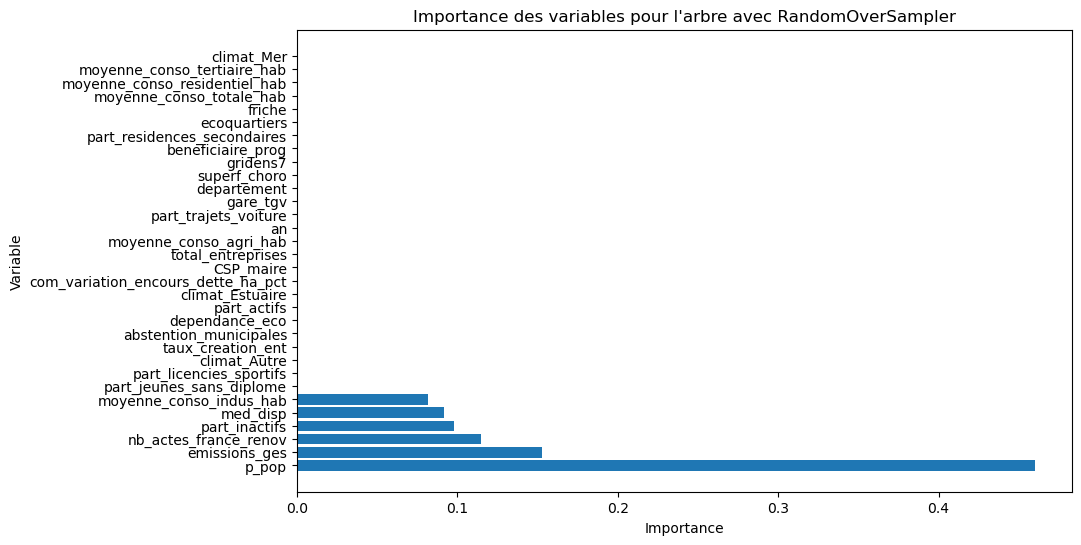

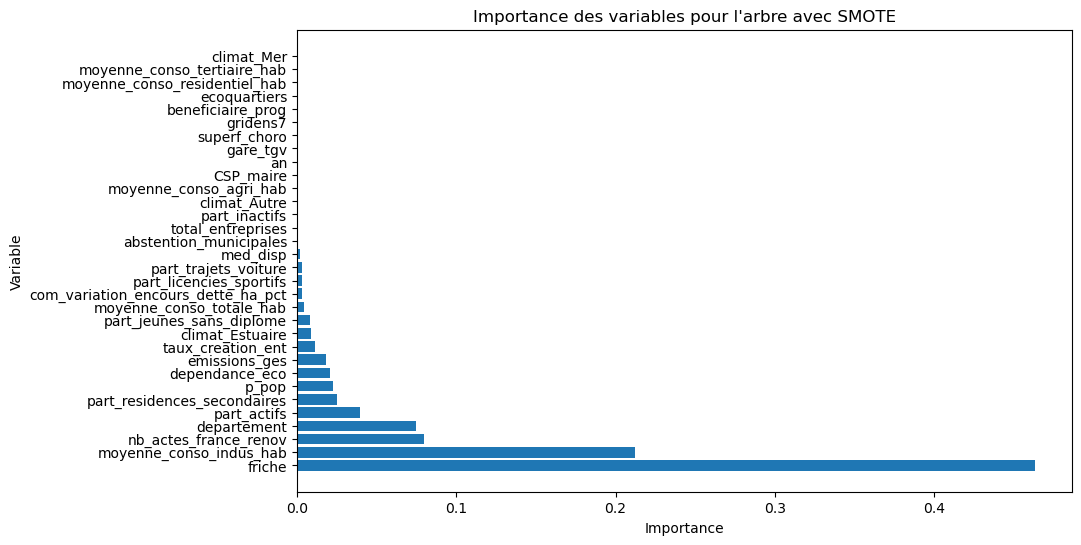

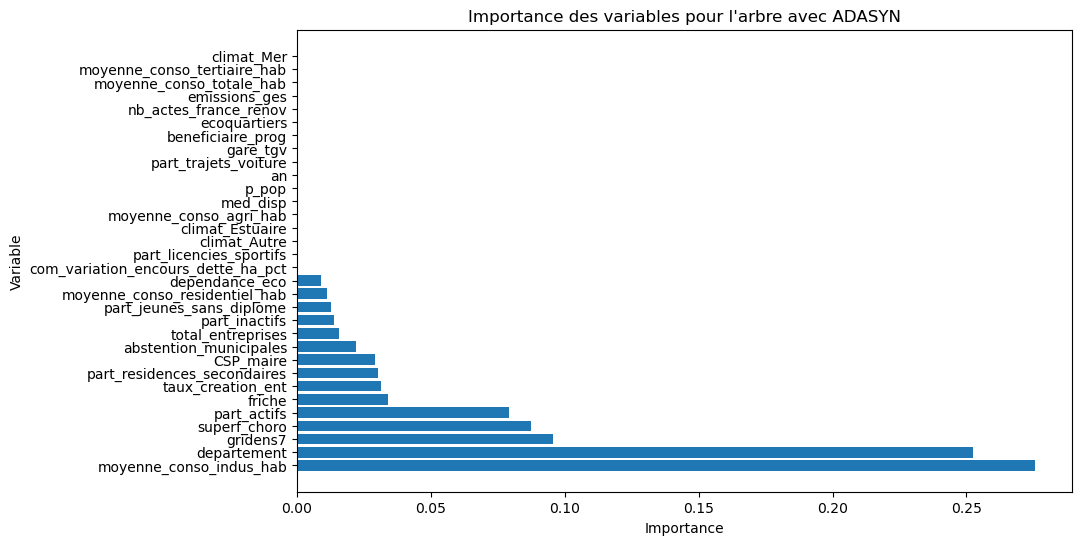

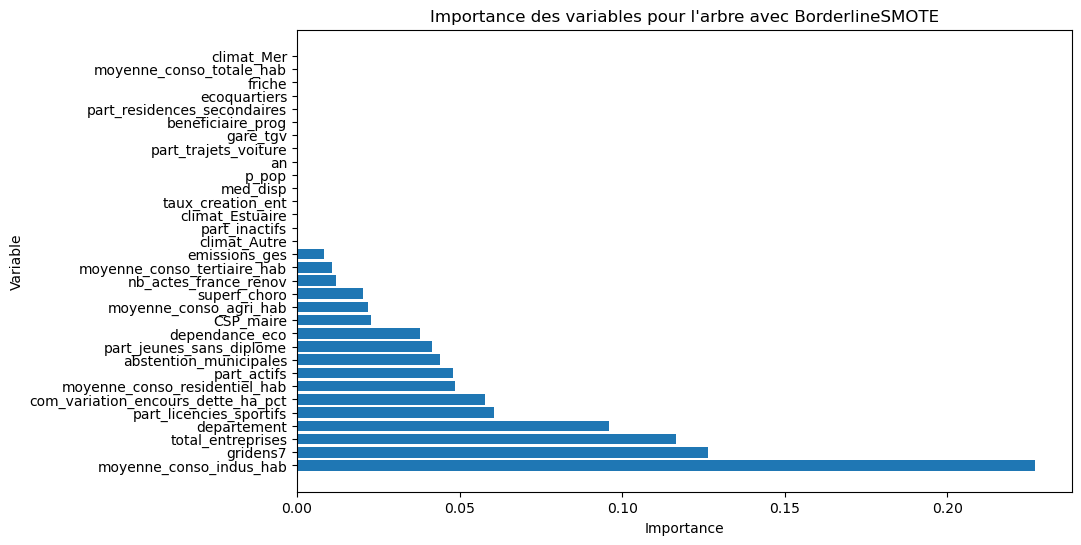

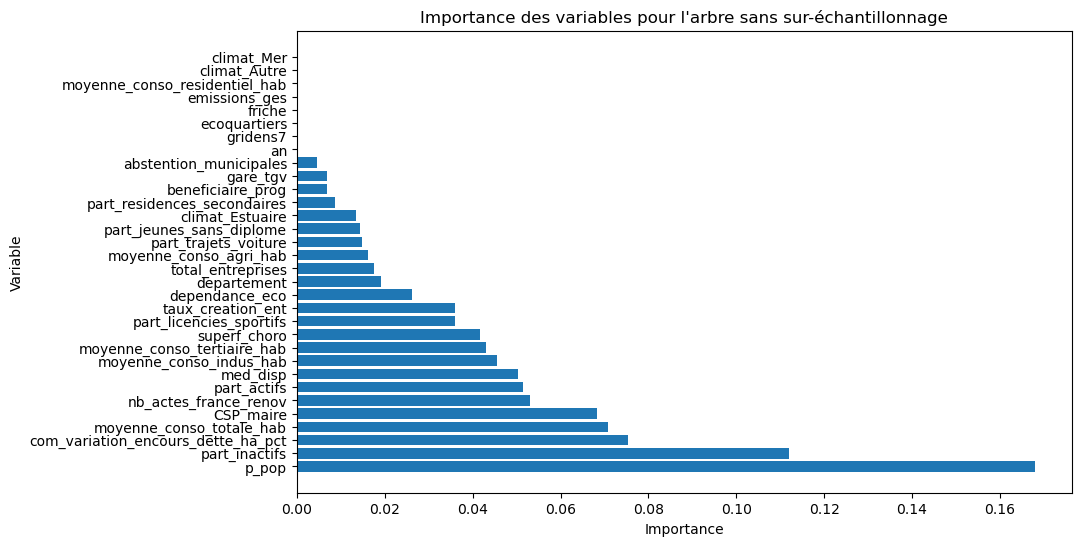

In [255]:
# Graphique de l'importance des variables

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_arbre_oversampler['Variable'], resultats_importance_variables_arbre_oversampler['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour l\'arbre avec RandomOverSampler')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_arbre_smote['Variable'], resultats_importance_variables_arbre_smote['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour l\'arbre avec SMOTE')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_arbre_adasyn['Variable'], resultats_importance_variables_arbre_adasyn['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour l\'arbre avec ADASYN')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_arbre_borderline_smote['Variable'], resultats_importance_variables_arbre_borderline_smote['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour l\'arbre avec BorderlineSMOTE')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_arbre['Variable'], resultats_importance_variables_arbre['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour l\'arbre sans sur-échantillonnage')
plt.show()

## I.2.4. Forêts Aléatoires

### A) Construction des modèles

In [256]:
# Construction du modèle de forêts aléatoires avec rééquilibrage des classes

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline

etapes_rf_oversampler = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('oversampler', RandomOverSampler(sampling_strategy = 0.4)), # Sur-échantillonnage
        ('rf', RandomForestClassifier(random_state=42))
        ]

etapes_rf_smote = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('smote', SMOTE(k_neighbors = 5)), # Sur-échantillonnage
        ('rf', RandomForestClassifier(random_state=42)), # Forets aléatoires
        ]

etapes_rf_adasyn = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('adasyn', ADASYN(n_neighbors = 5)), # Sur-échantillonnage
        ('rf', RandomForestClassifier(random_state=42)), # Forets aléatoires
        ]

etapes_rf_borderline_smote = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('borderline_smote', BorderlineSMOTE(k_neighbors = 5)), # Sur-échantillonnage
        ('rf', RandomForestClassifier(random_state=42)), # Forets aléatoires
        ]

etapes_rf = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('rf', RandomForestClassifier(random_state=42)) # Forets aléatoires
        ]


modele_rf_oversampler = Pipeline(steps=etapes_rf_oversampler) # Création du pipeline
modele_rf_smote = Pipeline(steps=etapes_rf_smote) # Création du pipeline
modele_rf_adasyn = Pipeline(steps=etapes_rf_adasyn) # Création du pipeline
modele_rf_borderline_smote = Pipeline(steps=etapes_rf_borderline_smote) # Création du pipeline
modele_rf = Pipeline(steps=etapes_rf) # Création du pipeline

modele_rf_oversampler.fit(X_train, y_train) # Entraînement
modele_rf_smote.fit(X_train, y_train) # Entraînement
modele_rf_adasyn.fit(X_train, y_train) # Entraînement
modele_rf_borderline_smote.fit(X_train, y_train) # Entraînement
modele_rf.fit(X_train, y_train) # Entraînement

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('rf', RandomForestClassifier(random_state=42))])

In [257]:
# Prédictions

y_proba_rf_oversampler = modele_rf_oversampler.predict_proba(X_test)[:, 1]
y_pred_rf_oversampler = modele_rf_oversampler.predict(X_test)

y_proba_rf_smote = modele_rf_smote.predict_proba(X_test)[:, 1]
y_pred_rf_smote = modele_rf_smote.predict(X_test)

y_proba_rf_adasyn = modele_rf_adasyn.predict_proba(X_test)[:, 1]
y_pred_rf_adasyn = modele_rf_adasyn.predict(X_test)

y_proba_rf_borderline_smote = modele_rf_borderline_smote.predict_proba(X_test)[:, 1]
y_pred_rf_borderline_smote = modele_rf_borderline_smote.predict(X_test)

y_proba_rf = modele_rf.predict_proba(X_test)[:, 1]
y_pred_rf = modele_rf.predict(X_test)

### B) Mesure de la performance des modèles initiaux

In [258]:
# Calcul des métriques

from sklearn.metrics import roc_auc_score, average_precision_score, log_loss
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, cohen_kappa_score

auc_roc_rf_oversampler = roc_auc_score(y_test, y_proba_rf_oversampler)
auc_pr_rf_oversampler = average_precision_score(y_test, y_proba_rf_oversampler)
log_loss_value_rf_oversampler = log_loss(y_test, y_proba_rf_oversampler)
precision_rf_oversampler = precision_score(y_test, y_pred_rf_oversampler)
recall_rf_oversampler = recall_score(y_test, y_pred_rf_oversampler)
f1_rf_oversampler = f1_score(y_test, y_pred_rf_oversampler)
mcc_rf_oversampler = matthews_corrcoef(y_test, y_pred_rf_oversampler)
balanced_acc_rf_oversampler = balanced_accuracy_score(y_test, y_pred_rf_oversampler)
specificity_rf_oversampler = confusion_matrix(y_test, y_pred_rf_oversampler)[0, 0] / (confusion_matrix(y_test, y_pred_rf_oversampler)[0, 0] + confusion_matrix(y_test, y_pred_rf_oversampler)[0, 1])
cohen_kappa_rf_oversampler = cohen_kappa_score(y_test, y_pred_rf_oversampler)

auc_roc_rf_smote = roc_auc_score(y_test, y_proba_rf_smote)
auc_pr_rf_smote = average_precision_score(y_test, y_proba_rf_smote)
log_loss_value_rf_smote = log_loss(y_test, y_proba_rf_smote)
precision_rf_smote = precision_score(y_test, y_pred_rf_smote)
recall_rf_smote = recall_score(y_test, y_pred_rf_smote)
f1_rf_smote = f1_score(y_test, y_pred_rf_smote)
mcc_rf_smote = matthews_corrcoef(y_test, y_pred_rf_smote)
balanced_acc_rf_smote = balanced_accuracy_score(y_test, y_pred_rf_smote)
specificity_rf_smote = confusion_matrix(y_test, y_pred_rf_smote)[0, 0] / (confusion_matrix(y_test, y_pred_rf_smote)[0, 0] + confusion_matrix(y_test, y_pred_rf_smote)[0, 1])
cohen_kappa_rf_smote = cohen_kappa_score(y_test, y_pred_rf_smote)

auc_roc_rf_adasyn = roc_auc_score(y_test, y_proba_rf_adasyn)
auc_pr_rf_adasyn = average_precision_score(y_test, y_proba_rf_adasyn)
log_loss_value_rf_adasyn = log_loss(y_test, y_proba_rf_adasyn)
precision_rf_adasyn = precision_score(y_test, y_pred_rf_adasyn)
recall_rf_adasyn = recall_score(y_test, y_pred_rf_adasyn)
f1_rf_adasyn = f1_score(y_test, y_pred_rf_adasyn)
mcc_rf_adasyn = matthews_corrcoef(y_test, y_pred_rf_adasyn)
balanced_acc_rf_adasyn = balanced_accuracy_score(y_test, y_pred_rf_adasyn)
specificity_rf_adasyn = confusion_matrix(y_test, y_pred_rf_adasyn)[0, 0] / (confusion_matrix(y_test, y_pred_rf_adasyn)[0, 0] + confusion_matrix(y_test, y_pred_rf_adasyn)[0, 1])
cohen_kappa_rf_adasyn = cohen_kappa_score(y_test, y_pred_rf_adasyn)

auc_roc_rf_borderline_smote = roc_auc_score(y_test, y_proba_rf_borderline_smote)
auc_pr_rf_borderline_smote = average_precision_score(y_test, y_proba_rf_borderline_smote)
log_loss_value_rf_borderline_smote = log_loss(y_test, y_proba_rf_borderline_smote)
precision_rf_borderline_smote = precision_score(y_test, y_pred_rf_borderline_smote)
recall_rf_borderline_smote = recall_score(y_test, y_pred_rf_borderline_smote)
f1_rf_borderline_smote = f1_score(y_test, y_pred_rf_borderline_smote)
mcc_rf_borderline_smote = matthews_corrcoef(y_test, y_pred_rf_borderline_smote)
balanced_acc_rf_borderline_smote = balanced_accuracy_score(y_test, y_pred_rf_borderline_smote)
specificity_rf_borderline_smote = confusion_matrix(y_test, y_pred_rf_borderline_smote)[0, 0] / (confusion_matrix(y_test, y_pred_rf_borderline_smote)[0, 0] + confusion_matrix(y_test, y_pred_rf_borderline_smote)[0, 1])
cohen_kappa_rf_borderline_smote = cohen_kappa_score(y_test, y_pred_rf_borderline_smote)

auc_roc_rf = roc_auc_score(y_test, y_proba_rf)
auc_pr_rf = average_precision_score(y_test, y_proba_rf)
log_loss_value_rf = log_loss(y_test, y_proba_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
mcc_rf = matthews_corrcoef(y_test, y_pred_rf)
balanced_acc_rf = balanced_accuracy_score(y_test, y_pred_rf)
specificity_rf = confusion_matrix(y_test, y_pred_rf)[0, 0] / (confusion_matrix(y_test, y_pred_rf)[0, 0] + confusion_matrix(y_test, y_pred_rf)[0, 1])
cohen_kappa_rf = cohen_kappa_score(y_test, y_pred_rf)

In [259]:
# Affichage des résultats

resultats_rf = pd.DataFrame({
    "Forêts aléatoires sans sur-échantillonnage": [auc_roc_rf, auc_pr_rf, f1_rf, balanced_acc_rf],
    "Forêts aléatoires avec SMOTE": [auc_roc_rf_smote, auc_pr_rf_smote, f1_rf_smote, balanced_acc_rf_smote],
    "Forêts aléatoires avec RandomOverSampler": [auc_roc_rf_oversampler, auc_pr_rf_oversampler, f1_rf_oversampler, balanced_acc_rf_oversampler],
    "Forêts aléatoires avec ADASYN": [auc_roc_rf_adasyn, auc_pr_rf_adasyn, f1_rf_adasyn, balanced_acc_rf_adasyn],
    "Forêts aléatoires avec BorderlineSMOTE": [auc_roc_rf_borderline_smote, auc_pr_rf_borderline_smote, f1_rf_borderline_smote, balanced_acc_rf_borderline_smote]
    },
    index = ["AUC-ROC", "AUC-PR", "F1-score", "Balanced accuracy"]
)

# Arrondir les résultats à 3 chiffres après la virgule
resultats_rf = resultats_rf.round(3)
resultats_rf

Forêts aléatoires sans sur-échantillonnage  \
AUC-ROC                                                 0.583   
AUC-PR                                                  0.215   
F1-score                                                0.000   
Balanced accuracy                                       0.493   

                   Forêts aléatoires avec SMOTE  \
AUC-ROC                                   0.642   
AUC-PR                                    0.299   
F1-score                                  0.243   
Balanced accuracy                         0.553   

                   Forêts aléatoires avec RandomOverSampler  \
AUC-ROC                                               0.541   
AUC-PR                                                0.196   
F1-score                                              0.080   
Balanced accuracy                                     0.500   

                   Forêts aléatoires avec ADASYN  \
AUC-ROC                                    0.605   
AUC-PR                                     0.250   
F1-score                                   0.211   
Balanced accuracy                          0.532   

                   Forêts aléatoires avec BorderlineSMOTE  
AUC-ROC                                             0.615  
AUC-PR                                              0.250  
F1-score                                            0.231  
Balanced accuracy                                   0.544

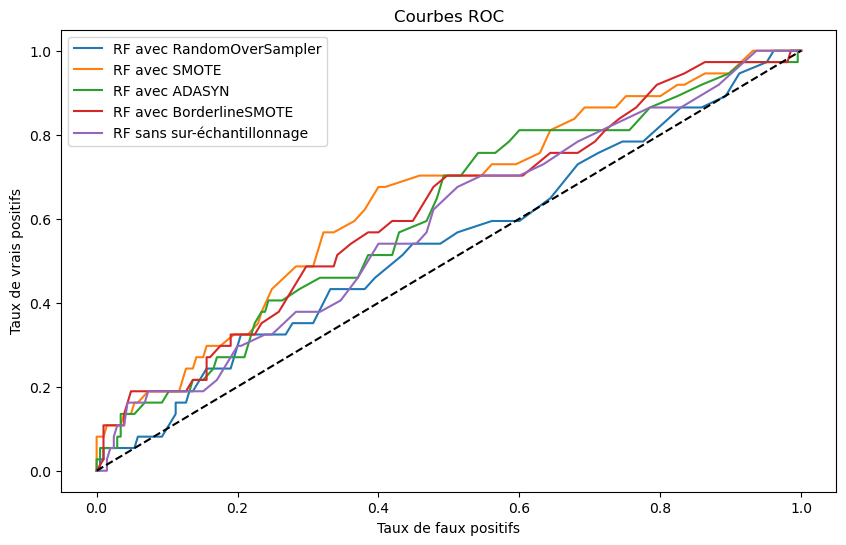

In [260]:
# Courbes ROC

from sklearn.metrics import roc_curve

fpr_rf_oversampler, tpr_rf_oversampler, _ = roc_curve(y_test, y_proba_rf_oversampler)
fpr_rf_smote, tpr_rf_smote, _ = roc_curve(y_test, y_proba_rf_smote)
fpr_rf_adasyn, tpr_rf_adasyn, _ = roc_curve(y_test, y_proba_rf_adasyn)
fpr_rf_borderline_smote, tpr_rf_borderline_smote, _ = roc_curve(y_test, y_proba_rf_borderline_smote)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)

plt.figure(figsize=(10, 6))
plt.plot(fpr_rf_oversampler, tpr_rf_oversampler, label='RF avec RandomOverSampler')
plt.plot(fpr_rf_smote, tpr_rf_smote, label='RF avec SMOTE')
plt.plot(fpr_rf_adasyn, tpr_rf_adasyn, label='RF avec ADASYN')
plt.plot(fpr_rf_borderline_smote, tpr_rf_borderline_smote, label='RF avec BorderlineSMOTE')
plt.plot(fpr_rf, tpr_rf, label='RF sans sur-échantillonnage')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend()

# Export de l'image
plt.savefig('data/Courbes_ROC_rf.png')

plt.show()



### C) Ajustement des hyperparamètres

In [261]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import f1_score, balanced_accuracy_score, make_scorer, roc_auc_score

# Grilles de paramètres adaptées pour éviter le surapprentissage
param_grid_rf_oversampler = {
    'oversampler__sampling_strategy': [0.2, 0.4, 0.5, 0.75, 1.0],  # Stratégies simplifiées pour échantillonnage
    'rf__n_estimators': [50, 100, 300, 500],  # Réduction des options pour le nombre d'arbres
    'rf__criterion': ['gini', 'entropy', 'log_loss'],  # Utilisation d'un seul critère d'impureté
    'rf__max_depth': [6, 15, 21],  # Réduction des options de profondeur maximale
    'rf__min_samples_split': [10, 20],  # Limitation des options pour min_samples_split
    'rf__min_samples_leaf': [2, 4],
    'rf__bootstrap': [True, False]  # Limitation à un seul choix de bootstrap
}

param_grid_rf_smote = {
    'smote__k_neighbors': [5, 7],  # Réduction des voisins pour SMOTE
    'smote__sampling_strategy': [0.2, 0.4, 0.5, 0.75, 1.0], 
    'rf__n_estimators': [50, 100, 300, 500], 
    'rf__criterion': ['gini', 'entropy', 'log_loss'], 
    'rf__max_depth': [6, 15, 21],
    'rf__min_samples_split': [10, 20],
    'rf__min_samples_leaf': [2, 4],
    'rf__bootstrap': [True,False] 
}

param_grid_rf_adasyn = {
    'adasyn__n_neighbors': [5, 7], 
    'adasyn__sampling_strategy': [0.2, 0.4, 0.5, 0.75, 1.0], 
    'rf__n_estimators': [50, 100, 300, 500], 
    'rf__criterion': ['gini', 'entropy', 'log_loss'], 
    'rf__max_depth': [6, 15, 21],
    'rf__min_samples_split': [10, 20],
    'rf__min_samples_leaf': [2, 4],
    'rf__bootstrap': [True,False] 
}

param_grid_rf_borderline_smote = {
    'borderline_smote__k_neighbors': [5, 7], 
    'borderline_smote__sampling_strategy': [0.2, 0.4, 0.5, 0.75, 1.0], 
    'rf__n_estimators': [50, 100, 300, 500], 
    'rf__criterion': ['gini', 'entropy', 'log_loss'], 
    'rf__max_depth': [6, 15, 21],
    'rf__min_samples_split': [10, 20],
    'rf__min_samples_leaf': [2, 4],
    'rf__bootstrap': [True, False] 
}

param_grid_rf = {
    'rf__n_estimators': [50, 100, 300, 500], 
    'rf__criterion': ['gini', 'entropy', 'log_loss'], 
    'rf__max_depth': [6, 15, 21], 
    'rf__min_samples_split': [10, 20], 
    'rf__min_samples_leaf': [2, 4],
    'rf__bootstrap': [True,False] 
}

# Choix des métriques adaptées
scoring = {
    'F1': make_scorer(f1_score),
    'Balanced Accuracy': make_scorer(balanced_accuracy_score),
    'AUC': make_scorer(roc_auc_score),
}

In [262]:
# Ajustement des 

grille_recherche_rf_oversampler = RandomizedSearchCV(modele_rf_oversampler, param_grid_rf_oversampler, cv=cv, scoring=scoring, refit = 'AUC', n_jobs=-1, n_iter=50, random_state=42)
grille_recherche_rf_smote = RandomizedSearchCV(modele_rf_smote, param_grid_rf_smote, cv=cv, scoring=scoring, refit = 'AUC', n_jobs=-1, n_iter=50, random_state=42)
grille_recherche_rf_adasyn = RandomizedSearchCV(modele_rf_adasyn, param_grid_rf_adasyn, cv=cv, scoring=scoring, refit = 'AUC', n_jobs=-1, n_iter=50, random_state=42)
grille_recherche_rf_borderline_smote = RandomizedSearchCV(modele_rf_borderline_smote, param_grid_rf_borderline_smote, cv=cv, scoring=scoring, refit = 'AUC', n_jobs=-1, n_iter=50, random_state=42)
grille_recherche_rf = RandomizedSearchCV(modele_rf, param_grid_rf, cv=cv, scoring=scoring, refit = 'AUC', n_jobs=-1, n_iter=50, random_state=42)

In [263]:
modele_rf_oversampler_opt = grille_recherche_rf_oversampler.fit(X_train, y_train).best_estimator_

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
250 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
250 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\utils\fixes.py", line 85, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\pipeline.py", line 329, in fit
    Xt, yt = self._fit

In [264]:
modele_rf_smote_opt = grille_recherche_rf_smote.fit(X_train, y_train).best_estimator_

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
160 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\utils\fixes.py", line 85, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\pipeline.py", line 329, in fit
    Xt, yt = self._fit

In [265]:
modele_rf_adasyn_opt = grille_recherche_rf_adasyn.fit(X_train, y_train).best_estimator_

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
160 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\utils\fixes.py", line 85, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\pipeline.py", line 329, in fit
    Xt, yt = self._fit

In [266]:
modele_rf_borderline_smote_opt = grille_recherche_rf_borderline_smote.fit(X_train, y_train).best_estimator_

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
160 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\utils\fixes.py", line 85, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\pipeline.py", line 329, in fit
    Xt, yt = self._fit

In [267]:
modele_rf_opt = grille_recherche_rf.fit(X_train, y_train).best_estimator_

In [268]:
# Affichage des meilleurs paramètres
best_params_rf_oversampler = modele_rf_oversampler_opt.get_params()
best_params_rf_smote = modele_rf_smote_opt.get_params()
best_params_rf_adasyn = modele_rf_adasyn_opt.get_params()
best_params_rf_borderline_smote = modele_rf_borderline_smote_opt.get_params()
best_params_rf = modele_rf_opt.get_params()

In [269]:
# Affichage des meilleurs paramètres pour chaque modèle

print("Les meilleurs paramètres pour le modèle de forêts aléatoires avec oversampler : \n", best_params_rf_oversampler)
print('\n')
print("Les meilleurs paramètres pour le modèle de forêts aléatoires avec smote :\n", best_params_rf_smote)
print('\n')
print("Les meilleurs paramètres pour le modèle de forêts aléatoires avec adasyn :\n", best_params_rf_adasyn)
print('\n')
print("Les meilleurs paramètres pour le modèle de forêts aléatoires avec borderline smote :\n", best_params_rf_borderline_smote)
print('\n')
print("Les meilleurs paramètres pour le modèle de forêts aléatoires sans méthode de sur-échantillonnage :\n", best_params_rf)


Les meilleurs paramètres pour le modèle de forêts aléatoires avec oversampler : 
 {'memory': None, 'steps': [('std_scaler', StandardScaler()), ('oversampler', RandomOverSampler()), ('rf', RandomForestClassifier(criterion='entropy', max_depth=3, min_samples_split=7,
                       n_estimators=300, random_state=42))], 'verbose': False, 'std_scaler': StandardScaler(), 'oversampler': RandomOverSampler(), 'rf': RandomForestClassifier(criterion='entropy', max_depth=3, min_samples_split=7,
                       n_estimators=300, random_state=42), 'std_scaler__copy': True, 'std_scaler__with_mean': True, 'std_scaler__with_std': True, 'oversampler__random_state': None, 'oversampler__sampling_strategy': 'auto', 'oversampler__shrinkage': None, 'rf__bootstrap': True, 'rf__ccp_alpha': 0.0, 'rf__class_weight': None, 'rf__criterion': 'entropy', 'rf__max_depth': 3, 'rf__max_features': 'sqrt', 'rf__max_leaf_nodes': None, 'rf__max_samples': None, 'rf__min_impurity_decrease': 0.0, 'rf__min_sampl

In [270]:
# Prédictions avec les meilleurs hyperparamètres

y_proba_rf_oversampler_cv = modele_rf_oversampler_opt.predict_proba(X_test)[:, 1]
y_pred_rf_oversampler_cv = modele_rf_oversampler_opt.predict(X_test)

y_proba_rf_smote_cv = modele_rf_smote_opt.predict_proba(X_test)[:, 1]
y_pred_rf_smote_cv = modele_rf_smote_opt.predict(X_test)

y_proba_rf_adasyn_cv = modele_rf_adasyn_opt.predict_proba(X_test)[:, 1]
y_pred_rf_adasyn_cv = modele_rf_adasyn_opt.predict(X_test)

y_proba_rf_borderline_smote_cv = modele_rf_borderline_smote_opt.predict_proba(X_test)[:, 1]
y_pred_rf_borderline_smote_cv = modele_rf_borderline_smote_opt.predict(X_test)

y_proba_rf_cv = modele_rf_opt.predict_proba(X_test)[:, 1]
y_pred_rf_cv = modele_rf_opt.predict(X_test)

### D) Mesure de la performance des modèles optimisés

In [271]:
# Calcul des métriques

auc_roc_rf_oversampler_cv = roc_auc_score(y_test, y_proba_rf_oversampler_cv)
auc_pr_rf_oversampler_cv = average_precision_score(y_test, y_proba_rf_oversampler_cv)
log_loss_value_rf_oversampler_cv = log_loss(y_test, y_proba_rf_oversampler_cv)
precision_rf_oversampler_cv = precision_score(y_test, y_pred_rf_oversampler_cv)
recall_rf_oversampler_cv = recall_score(y_test, y_pred_rf_oversampler_cv)
f1_rf_oversampler_cv = f1_score(y_test, y_pred_rf_oversampler_cv)
mcc_rf_oversampler_cv = matthews_corrcoef(y_test, y_pred_rf_oversampler_cv)
balanced_acc_rf_oversampler_cv = balanced_accuracy_score(y_test, y_pred_rf_oversampler_cv)
specificity_rf_oversampler_cv = confusion_matrix(y_test, y_pred_rf_oversampler_cv)[0, 0] / (confusion_matrix(y_test, y_pred_rf_oversampler_cv)[0, 0] + confusion_matrix(y_test, y_pred_rf_oversampler_cv)[0, 1])
cohen_kappa_rf_oversampler_cv = cohen_kappa_score(y_test, y_pred_rf_oversampler_cv)

auc_roc_rf_smote_cv = roc_auc_score(y_test, y_proba_rf_smote_cv)
auc_pr_rf_smote_cv = average_precision_score(y_test, y_proba_rf_smote_cv)
log_loss_value_rf_smote_cv = log_loss(y_test, y_proba_rf_smote_cv)
precision_rf_smote_cv = precision_score(y_test, y_pred_rf_smote_cv)
recall_rf_smote_cv = recall_score(y_test, y_pred_rf_smote_cv)
f1_rf_smote_cv = f1_score(y_test, y_pred_rf_smote_cv)
mcc_rf_smote_cv = matthews_corrcoef(y_test, y_pred_rf_smote_cv)
balanced_acc_rf_smote_cv = balanced_accuracy_score(y_test, y_pred_rf_smote_cv)
specificity_rf_smote_cv = confusion_matrix(y_test, y_pred_rf_smote_cv)[0, 0] / (confusion_matrix(y_test, y_pred_rf_smote_cv)[0, 0] + confusion_matrix(y_test, y_pred_rf_smote_cv)[0, 1])
cohen_kappa_rf_smote_cv = cohen_kappa_score(y_test, y_pred_rf_smote_cv)

auc_roc_rf_adasyn_cv = roc_auc_score(y_test, y_proba_rf_adasyn_cv)
auc_pr_rf_adasyn_cv = average_precision_score(y_test, y_proba_rf_adasyn_cv)
log_loss_value_rf_adasyn_cv = log_loss(y_test, y_proba_rf_adasyn_cv)
precision_rf_adasyn_cv = precision_score(y_test, y_pred_rf_adasyn_cv)
recall_rf_adasyn_cv = recall_score(y_test, y_pred_rf_adasyn_cv)
f1_rf_adasyn_cv = f1_score(y_test, y_pred_rf_adasyn_cv)
mcc_rf_adasyn_cv = matthews_corrcoef(y_test, y_pred_rf_adasyn_cv)
balanced_acc_rf_adasyn_cv = balanced_accuracy_score(y_test, y_pred_rf_adasyn_cv)
specificity_rf_adasyn_cv = confusion_matrix(y_test, y_pred_rf_adasyn_cv)[0, 0] / (confusion_matrix(y_test, y_pred_rf_adasyn_cv)[0, 0] + confusion_matrix(y_test, y_pred_rf_adasyn_cv)[0, 1])
cohen_kappa_rf_adasyn_cv = cohen_kappa_score(y_test, y_pred_rf_adasyn_cv)

auc_roc_rf_borderline_smote_cv = roc_auc_score(y_test, y_proba_rf_borderline_smote_cv)
auc_pr_rf_borderline_smote_cv = average_precision_score(y_test, y_proba_rf_borderline_smote_cv)
log_loss_value_rf_borderline_smote_cv = log_loss(y_test, y_proba_rf_borderline_smote_cv)
precision_rf_borderline_smote_cv = precision_score(y_test, y_pred_rf_borderline_smote_cv)
recall_rf_borderline_smote_cv = recall_score(y_test, y_pred_rf_borderline_smote_cv)
f1_rf_borderline_smote_cv = f1_score(y_test, y_pred_rf_borderline_smote_cv)
mcc_rf_borderline_smote_cv = matthews_corrcoef(y_test, y_pred_rf_borderline_smote_cv)
balanced_acc_rf_borderline_smote_cv = balanced_accuracy_score(y_test, y_pred_rf_borderline_smote_cv)
specificity_rf_borderline_smote_cv = confusion_matrix(y_test, y_pred_rf_borderline_smote_cv)[0, 0] / (confusion_matrix(y_test, y_pred_rf_borderline_smote_cv)[0, 0] + confusion_matrix(y_test, y_pred_rf_borderline_smote_cv)[0, 1])
cohen_kappa_rf_borderline_smote_cv = cohen_kappa_score(y_test, y_pred_rf_borderline_smote_cv)

auc_roc_rf_cv = roc_auc_score(y_test, y_proba_rf_cv)
auc_pr_rf_cv = average_precision_score(y_test, y_proba_rf_cv)
log_loss_value_rf_cv = log_loss(y_test, y_proba_rf_cv)
precision_rf_cv = precision_score(y_test, y_pred_rf_cv)
recall_rf_cv = recall_score(y_test, y_pred_rf_cv)
f1_rf_cv = f1_score(y_test, y_pred_rf_cv)
mcc_rf_cv = matthews_corrcoef(y_test, y_pred_rf_cv)
balanced_acc_rf_cv = balanced_accuracy_score(y_test, y_pred_rf_cv)
specificity_rf_cv = confusion_matrix(y_test, y_pred_rf_cv)[0, 0] / (confusion_matrix(y_test, y_pred_rf_cv)[0, 0] + confusion_matrix(y_test, y_pred_rf_cv)[0, 1])
cohen_kappa_rf_cv = cohen_kappa_score(y_test, y_pred_rf_cv)

In [272]:
# Affichage des résultats

resultats_rf_opt = pd.DataFrame({
    "Forêts aléatoires sans sur-échantillonnage": [auc_roc_rf_cv, auc_pr_rf_cv, f1_rf_cv, balanced_acc_rf_cv],
    "Forêts aléatoires avec SMOTE": [auc_roc_rf_smote_cv, auc_pr_rf_smote_cv, f1_rf_smote_cv, balanced_acc_rf_smote_cv],
    "Forêts aléatoires avec RandomOverSampler": [auc_roc_rf_oversampler_cv, auc_pr_rf_oversampler_cv, f1_rf_oversampler_cv, balanced_acc_rf_oversampler_cv],
    "Forêts aléatoires avec ADASYN": [auc_roc_rf_adasyn_cv, auc_pr_rf_adasyn_cv, f1_rf_adasyn_cv, balanced_acc_rf_adasyn_cv],
    "Forêts aléatoires avec BorderlineSMOTE": [auc_roc_rf_borderline_smote_cv, auc_pr_rf_borderline_smote_cv, f1_rf_borderline_smote_cv, balanced_acc_rf_borderline_smote_cv]
    },
    index = ["AUC-ROC", "AUC-PR", "F1-score", "Balanced accuracy"]
)
# Arrondir les résultats à 3 chiffres après la virgule
resultats_rf_opt = resultats_rf_opt.round(3)
resultats_rf_opt


Forêts aléatoires sans sur-échantillonnage  \
AUC-ROC                                                 0.576   
AUC-PR                                                  0.216   
F1-score                                                0.049   
Balanced accuracy                                       0.506   

                   Forêts aléatoires avec SMOTE  \
AUC-ROC                                   0.615   
AUC-PR                                    0.248   
F1-score                                  0.262   
Balanced accuracy                         0.548   

                   Forêts aléatoires avec RandomOverSampler  \
AUC-ROC                                               0.612   
AUC-PR                                                0.207   
F1-score                                              0.283   
Balanced accuracy                                     0.569   

                   Forêts aléatoires avec ADASYN  \
AUC-ROC                                    0.643   
AUC-PR                                     0.277   
F1-score                                   0.303   
Balanced accuracy                          0.587   

                   Forêts aléatoires avec BorderlineSMOTE  
AUC-ROC                                             0.632  
AUC-PR                                              0.300  
F1-score                                            0.323  
Balanced accuracy                                   0.607

In [273]:
# Export
resultats_rf_opt.to_csv("data/resultats_rf_opt.csv", index=True)
latex_table_rf = resultats_rf_opt.to_latex(index=True)
print(latex_table_rf)

\begin{tabular}{lrrrrr}
\toprule
 & Forêts aléatoires sans sur-échantillonnage & Forêts aléatoires avec SMOTE & Forêts aléatoires avec RandomOverSampler & Forêts aléatoires avec ADASYN & Forêts aléatoires avec BorderlineSMOTE \\
\midrule
AUC-ROC & 0.576000 & 0.615000 & 0.612000 & 0.643000 & 0.632000 \\
AUC-PR & 0.216000 & 0.248000 & 0.207000 & 0.277000 & 0.300000 \\
F1-score & 0.049000 & 0.262000 & 0.283000 & 0.303000 & 0.323000 \\
Balanced accuracy & 0.506000 & 0.548000 & 0.569000 & 0.587000 & 0.607000 \\
\bottomrule
\end{tabular}



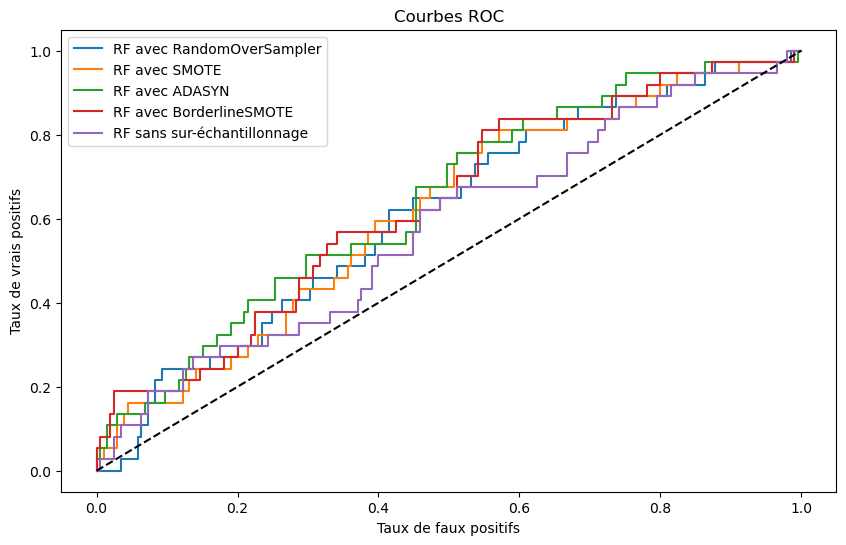

In [274]:
# Comparaison des courbes ROC

fpr_rf_oversampler_cv, tpr_rf_oversampler_cv, _ = roc_curve(y_test, y_proba_rf_oversampler_cv)
fpr_rf_smote_cv, tpr_rf_smote_cv, _ = roc_curve(y_test, y_proba_rf_smote_cv)
fpr_rf_adasyn_cv, tpr_rf_adasyn_cv, _ = roc_curve(y_test, y_proba_rf_adasyn_cv)
fpr_rf_borderline_smote_cv, tpr_rf_borderline_smote_cv, _ = roc_curve(y_test, y_proba_rf_borderline_smote_cv)
fpr_rf_cv, tpr_rf_cv, _ = roc_curve(y_test, y_proba_rf_cv)


plt.figure(figsize=(10, 6))
plt.plot(fpr_rf_oversampler_cv, tpr_rf_oversampler_cv, label='RF avec RandomOverSampler')
plt.plot(fpr_rf_smote_cv, tpr_rf_smote_cv, label='RF avec SMOTE')
plt.plot(fpr_rf_adasyn_cv, tpr_rf_adasyn_cv, label='RF avec ADASYN')
plt.plot(fpr_rf_borderline_smote_cv, tpr_rf_borderline_smote_cv, label='RF avec BorderlineSMOTE')
plt.plot(fpr_rf_cv, tpr_rf_cv, label='RF sans sur-échantillonnage')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend()

# Export de l'image
plt.savefig('data/Courbes_ROC_rf_cv.png')

plt.show()

### E) Importance des variables

In [275]:
# Importance des variables

# Récupération de l'importance des variables pour chaque modèle
importance_rf_oversampler = modele_rf_oversampler_opt.named_steps['rf'].feature_importances_
importance_rf_smote = modele_rf_smote_opt.named_steps['rf'].feature_importances_
importance_rf_adasyn = modele_rf_adasyn_opt.named_steps['rf'].feature_importances_
importance_rf_borderline_smote = modele_rf_borderline_smote_opt.named_steps['rf'].feature_importances_
importance_rf = modele_rf_opt.named_steps['rf'].feature_importances_

# Création d'un DataFrame pour afficher les résultats
resultats_importance_variables_rf_oversampler = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importance_rf_oversampler
})

resultats_importance_variables_rf_smote = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importance_rf_smote
})

resultats_importance_variables_rf_adasyn = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importance_rf_adasyn
})

resultats_importance_variables_rf_borderline_smote = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importance_rf_borderline_smote
})

resultats_importance_variables_rf = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importance_rf
})

# Affichage des résultats
resultats_importance_variables_rf_oversampler = resultats_importance_variables_rf_oversampler.sort_values(by="Importance", ascending=False)
resultats_importance_variables_rf_smote = resultats_importance_variables_rf_smote.sort_values(by="Importance", ascending=False)
resultats_importance_variables_rf_adasyn = resultats_importance_variables_rf_adasyn.sort_values(by="Importance", ascending=False)
resultats_importance_variables_rf_borderline_smote = resultats_importance_variables_rf_borderline_smote.sort_values(by="Importance", ascending=False)
resultats_importance_variables_rf = resultats_importance_variables_rf.sort_values(by="Importance", ascending=False)

resultats_importance_variables_rf_oversampler

Variable  Importance
18                               p_pop    0.133744
5                        emissions_ges    0.098659
26                   total_entreprises    0.098400
6                nb_actes_france_renov    0.089455
22                         part_actifs    0.072739
21                       part_inactifs    0.059916
24              abstention_municipales    0.045211
23                      dependance_eco    0.041743
1              moyenne_conso_indus_hab    0.041372
12                        superf_choro    0.038068
16                            med_disp    0.031140
2          moyenne_conso_tertiaire_hab    0.027411
27             part_licencies_sportifs    0.025413
9          part_residences_secondaires    0.022080
3        moyenne_conso_residentiel_hab    0.021913
7                               friche    0.021281
25                   taux_creation_ent    0.020799
20  com_variation_encours_dette_ha_pct    0.020144
4             moyenne_conso_totale_hab    0.019653
11                            gridens7    0.019377
19                           CSP_maire    0.013550
0               moyenne_conso_agri_hab    0.011913
28            part_jeunes_sans_diplome    0.010170
15                part_trajets_voiture    0.008991
13                         departement    0.002928
14                            gare_tgv    0.002721
10                   beneficiaire_prog    0.000625
29                        climat_Autre    0.000330
8                         ecoquartiers    0.000163
31                          climat_Mer    0.000089
17                                  an    0.000000
30                     climat_Estuaire    0.000000

In [276]:
resultats_importance_variables_rf_smote

Variable  Importance
1              moyenne_conso_indus_hab    0.134635
18                               p_pop    0.099391
7                               friche    0.098524
26                   total_entreprises    0.095453
11                            gridens7    0.094824
6                nb_actes_france_renov    0.074148
21                       part_inactifs    0.049204
28            part_jeunes_sans_diplome    0.045010
5                        emissions_ges    0.044152
12                        superf_choro    0.043671
22                         part_actifs    0.034721
13                         departement    0.029864
23                      dependance_eco    0.029172
20  com_variation_encours_dette_ha_pct    0.026222
24              abstention_municipales    0.021580
16                            med_disp    0.015131
27             part_licencies_sportifs    0.013449
2          moyenne_conso_tertiaire_hab    0.013199
0               moyenne_conso_agri_hab    0.008370
9          part_residences_secondaires    0.007517
25                   taux_creation_ent    0.006724
19                           CSP_maire    0.006301
3        moyenne_conso_residentiel_hab    0.003528
4             moyenne_conso_totale_hab    0.002875
15                part_trajets_voiture    0.001727
31                          climat_Mer    0.000320
29                        climat_Autre    0.000193
14                            gare_tgv    0.000096
17                                  an    0.000000
10                   beneficiaire_prog    0.000000
8                         ecoquartiers    0.000000
30                     climat_Estuaire    0.000000

In [277]:
resultats_importance_variables_rf_adasyn

Variable  Importance
1              moyenne_conso_indus_hab    0.126106
18                               p_pop    0.099893
7                               friche    0.085621
11                            gridens7    0.082148
26                   total_entreprises    0.062988
6                nb_actes_france_renov    0.062568
13                         departement    0.059617
5                        emissions_ges    0.058521
12                        superf_choro    0.057668
22                         part_actifs    0.040597
27             part_licencies_sportifs    0.036365
21                       part_inactifs    0.034262
28            part_jeunes_sans_diplome    0.029170
19                           CSP_maire    0.024139
20  com_variation_encours_dette_ha_pct    0.023085
24              abstention_municipales    0.021538
23                      dependance_eco    0.020864
16                            med_disp    0.014079
0               moyenne_conso_agri_hab    0.012597
9          part_residences_secondaires    0.010407
2          moyenne_conso_tertiaire_hab    0.009842
3        moyenne_conso_residentiel_hab    0.007855
25                   taux_creation_ent    0.007513
15                part_trajets_voiture    0.006391
4             moyenne_conso_totale_hab    0.004389
14                            gare_tgv    0.000687
10                   beneficiaire_prog    0.000638
30                     climat_Estuaire    0.000261
31                          climat_Mer    0.000175
29                        climat_Autre    0.000018
17                                  an    0.000000
8                         ecoquartiers    0.000000

In [278]:
resultats_importance_variables_rf_borderline_smote

Variable  Importance
18                               p_pop    0.130020
11                            gridens7    0.105411
26                   total_entreprises    0.103654
1              moyenne_conso_indus_hab    0.099707
7                               friche    0.098551
6                nb_actes_france_renov    0.091022
5                        emissions_ges    0.041439
22                         part_actifs    0.040868
21                       part_inactifs    0.033498
13                         departement    0.028689
12                        superf_choro    0.027266
2          moyenne_conso_tertiaire_hab    0.025492
24              abstention_municipales    0.023036
28            part_jeunes_sans_diplome    0.021644
20  com_variation_encours_dette_ha_pct    0.019032
23                      dependance_eco    0.018500
27             part_licencies_sportifs    0.014068
19                           CSP_maire    0.013613
16                            med_disp    0.012409
0               moyenne_conso_agri_hab    0.011106
9          part_residences_secondaires    0.010120
4             moyenne_conso_totale_hab    0.009195
3        moyenne_conso_residentiel_hab    0.006994
15                part_trajets_voiture    0.006077
25                   taux_creation_ent    0.005844
14                            gare_tgv    0.000898
29                        climat_Autre    0.000595
10                   beneficiaire_prog    0.000582
30                     climat_Estuaire    0.000264
31                          climat_Mer    0.000260
8                         ecoquartiers    0.000147
17                                  an    0.000000

In [279]:
resultats_importance_variables_rf

Variable  Importance
18                               p_pop    0.060444
26                   total_entreprises    0.056733
6                nb_actes_france_renov    0.056558
12                        superf_choro    0.052102
21                       part_inactifs    0.047870
5                        emissions_ges    0.047693
20  com_variation_encours_dette_ha_pct    0.046451
22                         part_actifs    0.044908
2          moyenne_conso_tertiaire_hab    0.044897
4             moyenne_conso_totale_hab    0.043532
27             part_licencies_sportifs    0.043141
16                            med_disp    0.042508
24              abstention_municipales    0.041509
1              moyenne_conso_indus_hab    0.039087
3        moyenne_conso_residentiel_hab    0.037776
28            part_jeunes_sans_diplome    0.036409
0               moyenne_conso_agri_hab    0.036223
9          part_residences_secondaires    0.036091
23                      dependance_eco    0.034886
25                   taux_creation_ent    0.034662
15                part_trajets_voiture    0.033814
19                           CSP_maire    0.027149
7                               friche    0.018364
11                            gridens7    0.013258
13                         departement    0.012187
14                            gare_tgv    0.005523
29                        climat_Autre    0.002432
31                          climat_Mer    0.002261
10                   beneficiaire_prog    0.000548
8                         ecoquartiers    0.000532
30                     climat_Estuaire    0.000452
17                                  an    0.000000

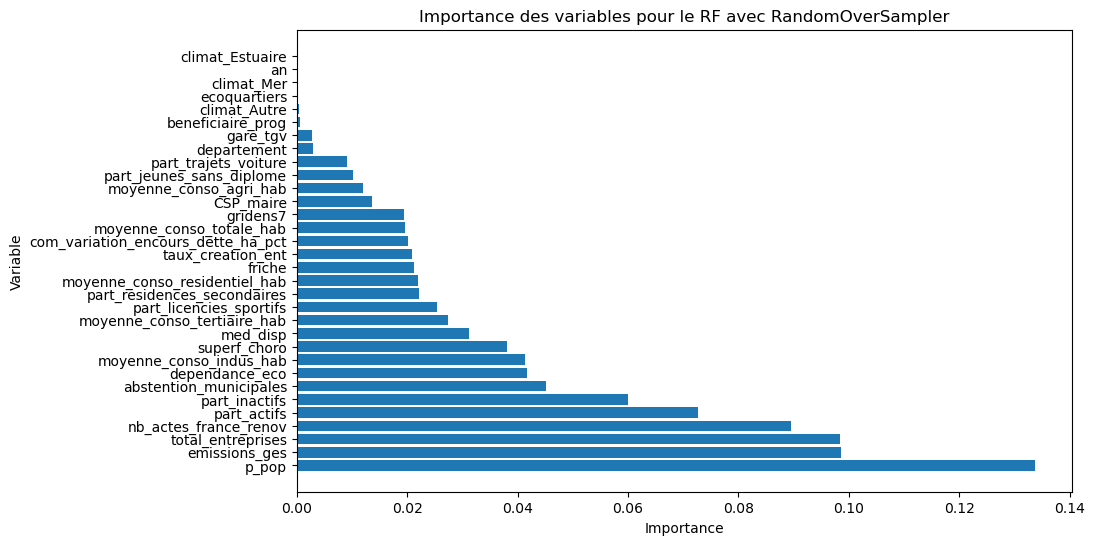

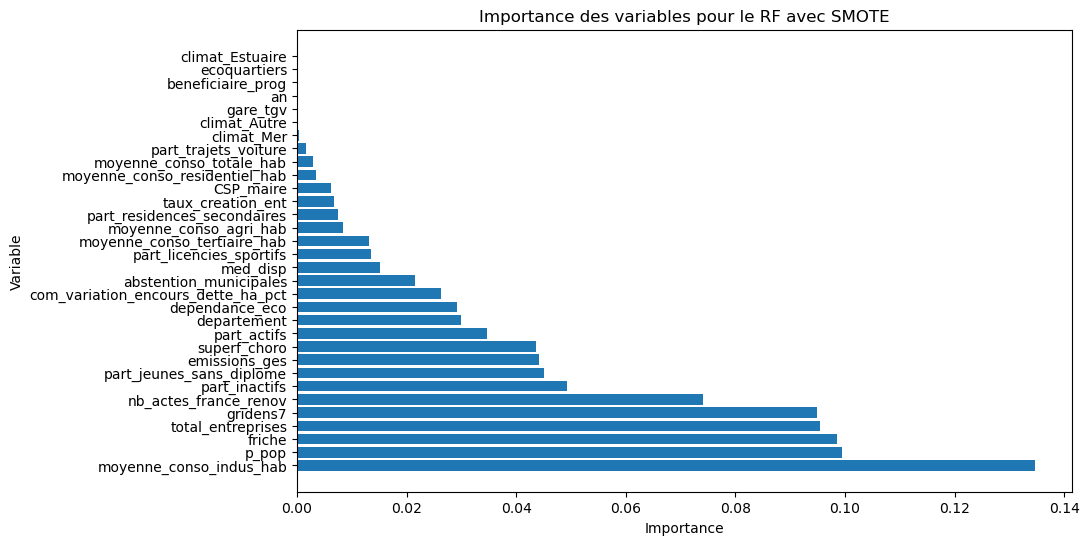

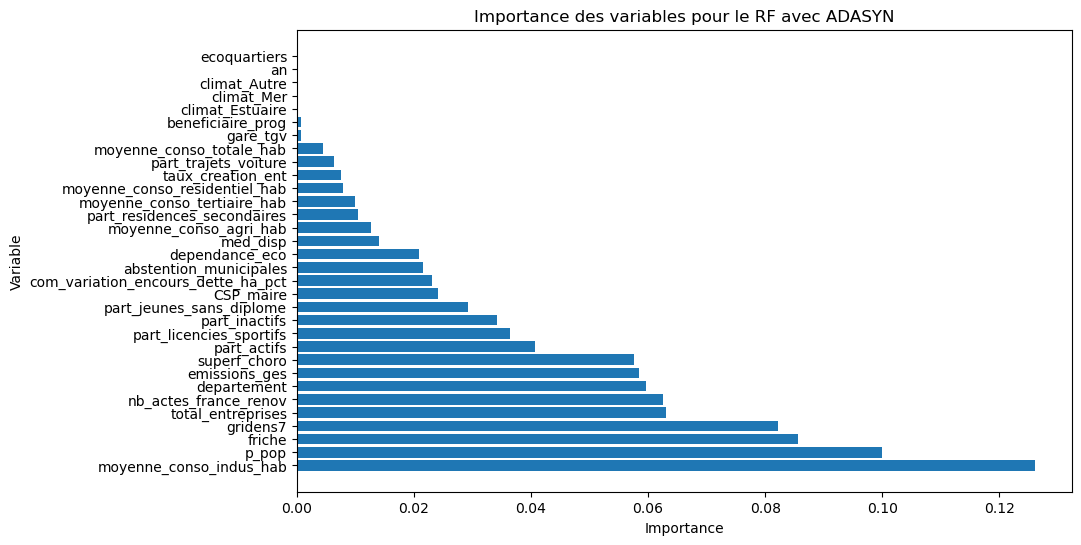

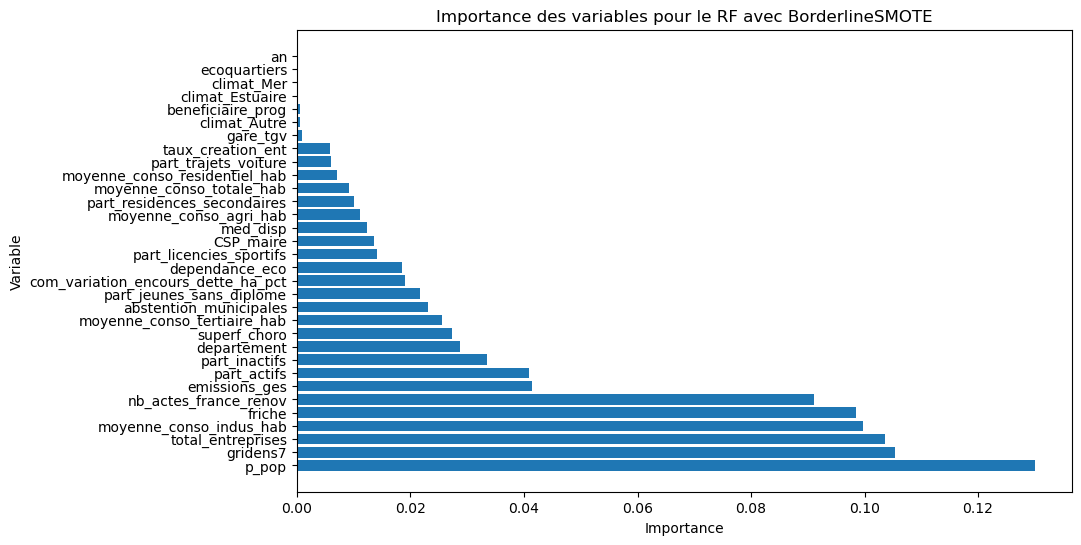

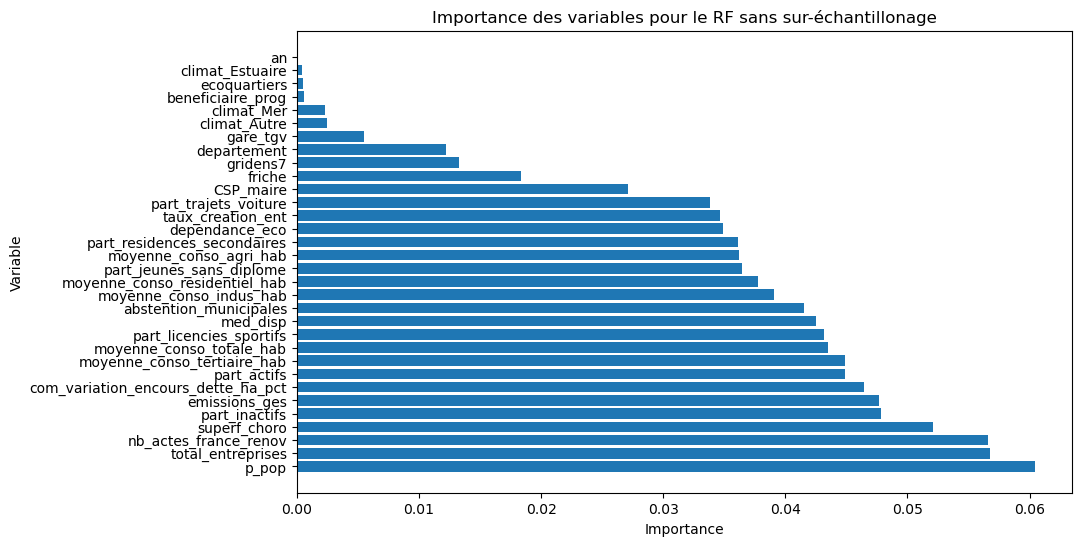

In [280]:
# Graphique de l'importance des variables

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_rf_oversampler['Variable'], resultats_importance_variables_rf_oversampler['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour le RF avec RandomOverSampler')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_rf_smote['Variable'], resultats_importance_variables_rf_smote['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour le RF avec SMOTE')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_rf_adasyn['Variable'], resultats_importance_variables_rf_adasyn['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour le RF avec ADASYN')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_rf_borderline_smote['Variable'], resultats_importance_variables_rf_borderline_smote['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour le RF avec BorderlineSMOTE')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_rf['Variable'], resultats_importance_variables_rf['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour le RF sans sur-échantillonage')
plt.show()

## I.2.4. Gradient Boosting

### A) Construction des modèles

In [281]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline

# Construction des étapes
etapes_gb_randomoversampler = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('oversampler', RandomOverSampler(sampling_strategy = 0.4)), # Sur-échantillonnage
        ('gb', GradientBoostingClassifier(random_state=42)) # Gradient Boosting
        ]

etapes_gb_smote = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('smote', SMOTE(k_neighbors = 5)), # Sur-échantillonnage
        ('gb', GradientBoostingClassifier(random_state=42)) # Gradient Boosting
        ]

etapes_gb_adasyn = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('adasyn', ADASYN(n_neighbors = 5)), # Sur-échantillonnage
        ('gb', GradientBoostingClassifier(random_state=42)) # Gradient Boosting
        ]

etapes_gb_borderline_smote = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('borderline_smote', BorderlineSMOTE(k_neighbors = 5)), # Sur-échantillonnage
        ('gb', GradientBoostingClassifier(random_state=42)) # Gradient Boosting
        ]

etapes_gb = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('gb', GradientBoostingClassifier(random_state=42)) # Gradient Boosting
        ]

modele_gb_randomoversampler = Pipeline(steps=etapes_gb_randomoversampler) # Création du pipeline
modele_gb_smote = Pipeline(steps=etapes_gb_smote) # Création du pipeline
modele_gb_adasyn = Pipeline(steps=etapes_gb_adasyn) # Création du pipeline
modele_gb_borderline_smote = Pipeline(steps=etapes_gb_borderline_smote) # Création du pipeline
modele_gb = Pipeline(steps=etapes_gb) # Création du pipeline

In [282]:
# Entraînement des modèles
modele_gb_randomoversampler.fit(X_train, y_train) # Entraînement
modele_gb_smote.fit(X_train, y_train) # Entraînement
modele_gb_adasyn.fit(X_train, y_train) # Entraînement
modele_gb_borderline_smote.fit(X_train, y_train) # Entraînement
modele_gb.fit(X_train, y_train)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('gb', GradientBoostingClassifier(random_state=42))])

In [283]:
# Prédictions

y_proba_gb_randomoversampler = modele_gb_randomoversampler.predict_proba(X_test)[:, 1]
y_pred_gb_randomoversampler = modele_gb_randomoversampler.predict(X_test)

y_proba_gb_smote = modele_gb_smote.predict_proba(X_test)[:, 1]
y_pred_gb_smote = modele_gb_smote.predict(X_test)

y_proba_gb_adasyn = modele_gb_adasyn.predict_proba(X_test)[:, 1]
y_pred_gb_adasyn = modele_gb_adasyn.predict(X_test)

y_proba_gb_borderline_smote = modele_gb_borderline_smote.predict_proba(X_test)[:, 1]
y_pred_gb_borderline_smote = modele_gb_borderline_smote.predict(X_test)

y_proba_gb = modele_gb.predict_proba(X_test)[:, 1]
y_pred_gb = modele_gb.predict(X_test)

### B) Mesure de la performance des modèles initiaux

In [284]:
# Calcul des métriques

from sklearn.metrics import roc_auc_score, average_precision_score, log_loss
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef

auc_roc_gb_randomoversampler = roc_auc_score(y_test, y_proba_gb_randomoversampler)
auc_pr_gb_randomoversampler = average_precision_score(y_test, y_proba_gb_randomoversampler)
log_loss_value_gb_randomoversampler = log_loss(y_test, y_proba_gb_randomoversampler)
precision_gb_randomoversampler = precision_score(y_test, y_pred_gb_randomoversampler)
recall_gb_randomoversampler = recall_score(y_test, y_pred_gb_randomoversampler)
f1_gb_randomoversampler = f1_score(y_test, y_pred_gb_randomoversampler)
mcc_gb_randomoversampler = matthews_corrcoef(y_test, y_pred_gb_randomoversampler)
balanced_acc_gb_randomoversampler = balanced_accuracy_score(y_test, y_pred_gb_randomoversampler)
specificity_gb_randomoversampler = confusion_matrix(y_test, y_pred_gb_randomoversampler)[0, 0] / (confusion_matrix(y_test, y_pred_gb_randomoversampler)[0, 0] + confusion_matrix(y_test, y_pred_gb_randomoversampler)[0, 1])
cohen_kappa_gb_randomoversampler = cohen_kappa_score(y_test, y_pred_gb_randomoversampler)

auc_roc_gb_smote = roc_auc_score(y_test, y_proba_gb_smote)
auc_pr_gb_smote = average_precision_score(y_test, y_proba_gb_smote)
log_loss_value_gb_smote = log_loss(y_test, y_proba_gb_smote)
precision_gb_smote = precision_score(y_test, y_pred_gb_smote)
recall_gb_smote = recall_score(y_test, y_pred_gb_smote)
f1_gb_smote = f1_score(y_test, y_pred_gb_smote)
mcc_gb_smote = matthews_corrcoef(y_test, y_pred_gb_smote)
balanced_acc_gb_smote = balanced_accuracy_score(y_test, y_pred_gb_smote)
specificity_gb_smote = confusion_matrix(y_test, y_pred_gb_smote)[0, 0] / (confusion_matrix(y_test, y_pred_gb_smote)[0, 0] + confusion_matrix(y_test, y_pred_gb_smote)[0, 1])
cohen_kappa_gb_smote = cohen_kappa_score(y_test, y_pred_gb_smote)

auc_roc_gb_adasyn = roc_auc_score(y_test, y_proba_gb_adasyn)
auc_pr_gb_adasyn = average_precision_score(y_test, y_proba_gb_adasyn)
log_loss_value_gb_adasyn = log_loss(y_test, y_proba_gb_adasyn)
precision_gb_adasyn = precision_score(y_test, y_pred_gb_adasyn)
recall_gb_adasyn = recall_score(y_test, y_pred_gb_adasyn)
f1_gb_adasyn = f1_score(y_test, y_pred_gb_adasyn)
mcc_gb_adasyn = matthews_corrcoef(y_test, y_pred_gb_adasyn)
balanced_acc_gb_adasyn = balanced_accuracy_score(y_test, y_pred_gb_adasyn)
specificity_gb_adasyn = confusion_matrix(y_test, y_pred_gb_adasyn)[0, 0] / (confusion_matrix(y_test, y_pred_gb_adasyn)[0, 0] + confusion_matrix(y_test, y_pred_gb_adasyn)[0, 1])
cohen_kappa_gb_adasyn = cohen_kappa_score(y_test, y_pred_gb_adasyn)

auc_roc_gb_borderline_smote = roc_auc_score(y_test, y_proba_gb_borderline_smote)
auc_pr_gb_borderline_smote = average_precision_score(y_test, y_proba_gb_borderline_smote)
log_loss_value_gb_borderline_smote = log_loss(y_test, y_proba_gb_borderline_smote)
precision_gb_borderline_smote = precision_score(y_test, y_pred_gb_borderline_smote)
recall_gb_borderline_smote = recall_score(y_test, y_pred_gb_borderline_smote)
f1_gb_borderline_smote = f1_score(y_test, y_pred_gb_borderline_smote)
mcc_gb_borderline_smote = matthews_corrcoef(y_test, y_pred_gb_borderline_smote)
balanced_acc_gb_borderline_smote = balanced_accuracy_score(y_test, y_pred_gb_borderline_smote)
specificity_gb_borderline_smote = confusion_matrix(y_test, y_pred_gb_borderline_smote)[0, 0] / (confusion_matrix(y_test, y_pred_gb_borderline_smote)[0, 0] + confusion_matrix(y_test, y_pred_gb_borderline_smote)[0, 1])
cohen_kappa_gb_borderline_smote = cohen_kappa_score(y_test, y_pred_gb_borderline_smote)

auc_roc_gb = roc_auc_score(y_test, y_proba_gb)
auc_pr_gb = average_precision_score(y_test, y_proba_gb)
log_loss_value_gb = log_loss(y_test, y_proba_gb)
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)
mcc_gb = matthews_corrcoef(y_test, y_pred_gb)
balanced_acc_gb = balanced_accuracy_score(y_test, y_pred_gb)
specificity_gb = confusion_matrix(y_test, y_pred_gb)[0, 0] / (confusion_matrix(y_test, y_pred_gb)[0, 0] + confusion_matrix(y_test, y_pred_gb)[0, 1])
cohen_kappa_gb = cohen_kappa_score(y_test, y_pred_gb)

In [285]:
# Affichage des résultats
resultats_gb = pd.DataFrame({
    "Gradient Boosting sans sur-échantillonnage": [auc_roc_gb, auc_pr_gb, f1_gb, balanced_acc_gb],
    "Gradient Boosting avec SMOTE": [auc_roc_gb_smote, auc_pr_gb_smote, f1_gb_smote, balanced_acc_gb_smote],
    "Gradient Boosting avec RandomOverSampler": [auc_roc_gb_randomoversampler, auc_pr_gb_randomoversampler, f1_gb_randomoversampler, balanced_acc_gb_randomoversampler],
    "Gradient Boosting avec ADASYN": [auc_roc_gb_adasyn, auc_pr_gb_adasyn, f1_gb_adasyn, balanced_acc_gb_adasyn],
    "Gradient Boosting avec BorderlineSMOTE": [auc_roc_gb_borderline_smote, auc_pr_gb_borderline_smote, f1_gb_borderline_smote, balanced_acc_gb_borderline_smote]
    },
    index = ["AUC-ROC", "AUC-PR", "F1-score", "Balanced accuracy"]
)
# Arrondir les résultats à 3 chiffres après la virgule
resultats_gb = resultats_gb.round(3)
resultats_gb

Gradient Boosting sans sur-échantillonnage  \
AUC-ROC                                                 0.627   
AUC-PR                                                  0.244   
F1-score                                                0.133   
Balanced accuracy                                       0.528   

                   Gradient Boosting avec SMOTE  \
AUC-ROC                                   0.596   
AUC-PR                                    0.236   
F1-score                                  0.267   
Balanced accuracy                         0.562   

                   Gradient Boosting avec RandomOverSampler  \
AUC-ROC                                               0.610   
AUC-PR                                                0.271   
F1-score                                              0.197   
Balanced accuracy                                     0.537   

                   Gradient Boosting avec ADASYN  \
AUC-ROC                                    0.617   
AUC-PR                                     0.217   
F1-score                                   0.256   
Balanced accuracy                          0.556   

                   Gradient Boosting avec BorderlineSMOTE  
AUC-ROC                                             0.612  
AUC-PR                                              0.259  
F1-score                                            0.244  
Balanced accuracy                                   0.546

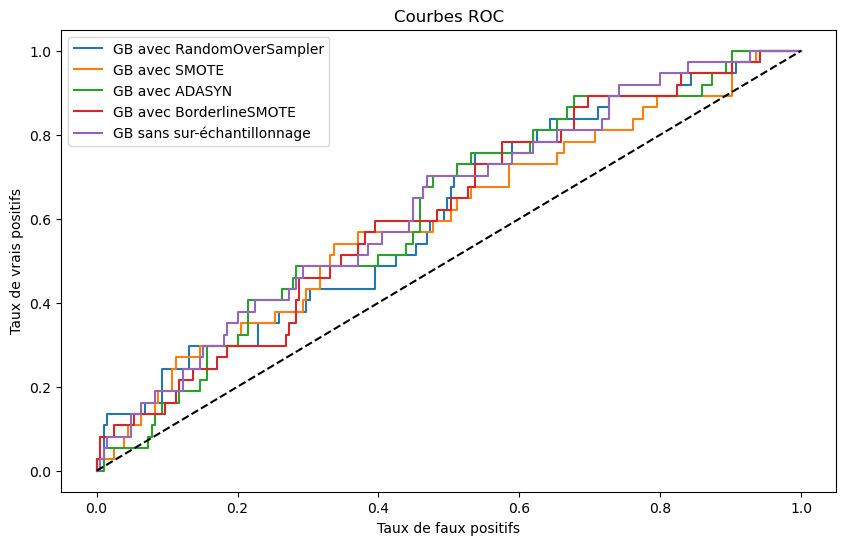

In [286]:
# Courbes ROC

from sklearn.metrics import roc_curve

fpr_gb_randomoversampler, tpr_gb_randomoversampler, _ = roc_curve(y_test, y_proba_gb_randomoversampler)
fpr_gb_smote, tpr_gb_smote, _ = roc_curve(y_test, y_proba_gb_smote)
fpr_gb_adasyn, tpr_gb_adasyn, _ = roc_curve(y_test, y_proba_gb_adasyn)
fpr_gb_borderline_smote, tpr_gb_borderline_smote, _ = roc_curve(y_test, y_proba_gb_borderline_smote)
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_proba_gb)

plt.figure(figsize=(10, 6))
plt.plot(fpr_gb_randomoversampler, tpr_gb_randomoversampler, label='GB avec RandomOverSampler')
plt.plot(fpr_gb_smote, tpr_gb_smote, label='GB avec SMOTE')
plt.plot(fpr_gb_adasyn, tpr_gb_adasyn, label='GB avec ADASYN')
plt.plot(fpr_gb_borderline_smote, tpr_gb_borderline_smote, label='GB avec BorderlineSMOTE')
plt.plot(fpr_gb, tpr_gb, label='GB sans sur-échantillonnage')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend()


# Export de l'image
plt.savefig('data/Courbes_ROC_gb.png')

plt.show()


### C) Ajustement des hyperparamètres

In [287]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score, balanced_accuracy_score, roc_auc_score

# Grilles de paramètres adaptées pour éviter le surapprentissage

param_grid_gb_oversampler = {
    'oversampler__sampling_strategy': [0.2, 0.4, 0.5, 0.75, 1.0],  # Stratégies simplifiées pour échantillonnage
    'gb__n_estimators': [50, 100, 300],  # Réduction des options pour le nombre d'arbres
    'gb__learning_rate': [0.01, 0.1, 0.5],  # Ajout d'une valeur plus basse pour learning_rate
    'gb__max_depth': [3, 5, 7]  # Limitation des options pour max_depth
}

param_grid_gb_smote = {
    'smote__k_neighbors': [5, 7],  # Réduction des voisins pour SMOTE
    'smote__sampling_strategy': [0.2, 0.4, 0.5, 0.75, 1.0], 
    'gb__n_estimators': [50, 100, 300], 
    'gb__learning_rate': [0.01, 0.1, 0.5], 
    'gb__max_depth': [3, 5, 7]  
}

param_grid_gb_adasyn = {
    'adasyn__n_neighbors': [5, 7], 
    'adasyn__sampling_strategy': [0.2, 0.4, 0.5, 0.75, 1.0], 
    'gb__n_estimators': [50, 100, 300], 
    'gb__learning_rate': [0.01, 0.1, 0.5], 
    'gb__max_depth': [3, 5, 7]  
}

param_grid_gb_borderline_smote = {
    'borderline_smote__k_neighbors': [5, 7], 
    'borderline_smote__sampling_strategy': [0.2, 0.4, 0.5, 0.75, 1.0], 
    'gb__n_estimators': [50, 100, 300], 
    'gb__learning_rate': [0.01, 0.1, 0.5], 
    'gb__max_depth': [3, 5, 7]  
}

param_grid_gb = {
    'gb__n_estimators': [50, 100, 300], 
    'gb__learning_rate': [0.01, 0.1, 0.5], 
    'gb__max_depth': [3, 5, 7]  
}

# Choix des métriques adaptées
scoring = {
    'F1': make_scorer(f1_score),
    'Balanced Accuracy': make_scorer(balanced_accuracy_score),
    'AUC': make_scorer(roc_auc_score),
}

In [288]:
# Ajustement des hyperparamètres
grille_recherche_gb_randomoversampler = RandomizedSearchCV(modele_gb_randomoversampler, param_grid_gb_oversampler, cv=cv, scoring=scoring, refit = 'AUC', n_jobs=-1, n_iter=50, random_state=42)
grille_recherche_gb_smote = RandomizedSearchCV(modele_gb_smote, param_grid_gb_smote, cv=cv, scoring=scoring, refit = 'AUC',n_jobs=-1, n_iter=50 random_state=42)
grille_recherche_gb_adasyn = RandomizedSearchCV(modele_gb_adasyn, param_grid_gb_adasyn, cv=cv, scoring=scoring, refit = 'AUC',n_jobs=-1, n_iter=50 random_state=42)
grille_recherche_gb_borderline_smote = RandomizedSearchCV(modele_gb_borderline_smote, param_grid_gb_borderline_smote, cv=cv, scoring=scoring, refit = 'AUC',n_jobs=-1, n_iter=50, random_state=42)
grille_recherche_gb = RandomizedSearchCV(modele_gb, param_grid_gb, cv=cv, scoring=scoring, refit = 'AUC',n_jobs=-1, n_iter=50, random_state=42)

In [289]:
modele_gb_oversampler_opt = grille_recherche_gb_randomoversampler.fit(X_train, y_train).best_estimator_

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
150 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\utils\fixes.py", line 85, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\pipeline.py", line 329, in fit
    Xt, yt = self._fit

In [290]:
modele_gb_smote_opt = grille_recherche_gb_smote.fit(X_train, y_train).best_estimator_

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
160 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\utils\fixes.py", line 85, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\pipeline.py", line 329, in fit
    Xt, yt = self._fit

In [291]:
modele_gb_adasyn_opt = grille_recherche_gb_adasyn.fit(X_train, y_train).best_estimator_

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
190 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
110 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\utils\fixes.py", line 85, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\pipeline.py", line 329, in fit
    Xt, yt = self._fit

In [292]:
modele_gb_borderline_smote_opt = grille_recherche_gb_borderline_smote.fit(X_train, y_train).best_estimator_

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
190 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
190 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\utils\fixes.py", line 85, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\pipeline.py", line 329, in fit
    Xt, yt = self._fit(X, y, routed_params)
             ^^^^^^^^^^^^^^^

In [293]:
modele_gb_opt = grille_recherche_gb.fit(X_train, y_train).best_estimator_

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 60 is smaller than n_iter=100. Running 60 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [294]:
# Prédictions avec les meilleurs hyperparamètres

y_proba_gb_randomoversampler_cv = modele_gb_oversampler_opt.predict_proba(X_test)[:, 1]
y_pred_gb_randomoversampler_cv = modele_gb_oversampler_opt.predict(X_test)

y_proba_gb_smote_cv = modele_gb_smote_opt.predict_proba(X_test)[:, 1]
y_pred_gb_smote_cv = modele_gb_smote_opt.predict(X_test)

y_proba_gb_adasyn_cv = modele_gb_adasyn_opt.predict_proba(X_test)[:, 1]
y_pred_gb_adasyn_cv = modele_gb_adasyn_opt.predict(X_test)

y_proba_gb_borderline_smote_cv = modele_gb_borderline_smote_opt.predict_proba(X_test)[:, 1]
y_pred_gb_borderline_smote_cv = modele_gb_borderline_smote_opt.predict(X_test)

y_proba_gb_cv = modele_gb_opt.predict_proba(X_test)[:, 1]
y_pred_gb_cv = modele_gb_opt.predict(X_test)

### D) Mesure de la performance des modèles optimisés

In [295]:
# Calcul des métriques

auc_roc_gb_randomoversampler_cv = roc_auc_score(y_test, y_proba_gb_randomoversampler_cv)
auc_pr_gb_randomoversampler_cv = average_precision_score(y_test, y_proba_gb_randomoversampler_cv)
log_loss_value_gb_randomoversampler_cv = log_loss(y_test, y_proba_gb_randomoversampler_cv)
precision_gb_randomoversampler_cv = precision_score(y_test, y_pred_gb_randomoversampler_cv)
recall_gb_randomoversampler_cv = recall_score(y_test, y_pred_gb_randomoversampler_cv)
f1_gb_randomoversampler_cv = f1_score(y_test, y_pred_gb_randomoversampler_cv)
mcc_gb_randomoversampler_cv = matthews_corrcoef(y_test, y_pred_gb_randomoversampler_cv)
balanced_acc_gb_randomoversampler_cv = balanced_accuracy_score(y_test, y_pred_gb_randomoversampler_cv)
specificity_gb_randomoversampler_cv = confusion_matrix(y_test, y_pred_gb_randomoversampler_cv)[0, 0] / (confusion_matrix(y_test, y_pred_gb_randomoversampler_cv)[0, 0] + confusion_matrix(y_test, y_pred_gb_randomoversampler_cv)[0, 1])
cohen_kappa_gb_randomoversampler_cv = cohen_kappa_score(y_test, y_pred_gb_randomoversampler_cv)

auc_roc_gb_smote_cv = roc_auc_score(y_test, y_proba_gb_smote_cv)
auc_pr_gb_smote_cv = average_precision_score(y_test, y_proba_gb_smote_cv)
log_loss_value_gb_smote_cv = log_loss(y_test, y_proba_gb_smote_cv)
precision_gb_smote_cv = precision_score(y_test, y_pred_gb_smote_cv)
recall_gb_smote_cv = recall_score(y_test, y_pred_gb_smote_cv)
f1_gb_smote_cv = f1_score(y_test, y_pred_gb_smote_cv)
mcc_gb_smote_cv = matthews_corrcoef(y_test, y_pred_gb_smote_cv)
balanced_acc_gb_smote_cv = balanced_accuracy_score(y_test, y_pred_gb_smote_cv)
specificity_gb_smote_cv = confusion_matrix(y_test, y_pred_gb_smote_cv)[0, 0] / (confusion_matrix(y_test, y_pred_gb_smote_cv)[0, 0] + confusion_matrix(y_test, y_pred_gb_smote_cv)[0, 1])
cohen_kappa_gb_smote_cv = cohen_kappa_score(y_test, y_pred_gb_smote_cv)

auc_roc_gb_adasyn_cv = roc_auc_score(y_test, y_proba_gb_adasyn_cv)
auc_pr_gb_adasyn_cv = average_precision_score(y_test, y_proba_gb_adasyn_cv)
log_loss_value_gb_adasyn_cv = log_loss(y_test, y_proba_gb_adasyn_cv)
precision_gb_adasyn_cv = precision_score(y_test, y_pred_gb_adasyn_cv)
recall_gb_adasyn_cv = recall_score(y_test, y_pred_gb_adasyn_cv)
f1_gb_adasyn_cv = f1_score(y_test, y_pred_gb_adasyn_cv)
mcc_gb_adasyn_cv = matthews_corrcoef(y_test, y_pred_gb_adasyn_cv)
balanced_acc_gb_adasyn_cv = balanced_accuracy_score(y_test, y_pred_gb_adasyn_cv)
specificity_gb_adasyn_cv = confusion_matrix(y_test, y_pred_gb_adasyn_cv)[0, 0] / (confusion_matrix(y_test, y_pred_gb_adasyn_cv)[0, 0] + confusion_matrix(y_test, y_pred_gb_adasyn_cv)[0, 1])
cohen_kappa_gb_adasyn_cv = cohen_kappa_score(y_test, y_pred_gb_adasyn_cv)

auc_roc_gb_borderline_smote_cv = roc_auc_score(y_test, y_proba_gb_borderline_smote_cv)
auc_pr_gb_borderline_smote_cv = average_precision_score(y_test, y_proba_gb_borderline_smote_cv)
log_loss_value_gb_borderline_smote_cv = log_loss(y_test, y_proba_gb_borderline_smote_cv)
precision_gb_borderline_smote_cv = precision_score(y_test, y_pred_gb_borderline_smote_cv)
recall_gb_borderline_smote_cv = recall_score(y_test, y_pred_gb_borderline_smote_cv)
f1_gb_borderline_smote_cv = f1_score(y_test, y_pred_gb_borderline_smote_cv)
mcc_gb_borderline_smote_cv = matthews_corrcoef(y_test, y_pred_gb_borderline_smote_cv)
balanced_acc_gb_borderline_smote_cv = balanced_accuracy_score(y_test, y_pred_gb_borderline_smote_cv)
specificity_gb_borderline_smote_cv = confusion_matrix(y_test, y_pred_gb_borderline_smote_cv)[0, 0] / (confusion_matrix(y_test, y_pred_gb_borderline_smote_cv)[0, 0] + confusion_matrix(y_test, y_pred_gb_borderline_smote_cv)[0, 1])
cohen_kappa_gb_borderline_smote_cv = cohen_kappa_score(y_test, y_pred_gb_borderline_smote_cv)

auc_roc_gb_cv = roc_auc_score(y_test, y_proba_gb_cv)
auc_pr_gb_cv = average_precision_score(y_test, y_proba_gb_cv)
log_loss_value_gb_cv = log_loss(y_test, y_proba_gb_cv)
precision_gb_cv = precision_score(y_test, y_pred_gb_cv)
recall_gb_cv = recall_score(y_test, y_pred_gb_cv)
f1_gb_cv = f1_score(y_test, y_pred_gb_cv)
mcc_gb_cv = matthews_corrcoef(y_test, y_pred_gb_cv)
balanced_acc_gb_cv = balanced_accuracy_score(y_test, y_pred_gb_cv)
specificity_gb_cv = confusion_matrix(y_test, y_pred_gb_cv)[0, 0] / (confusion_matrix(y_test, y_pred_gb_cv)[0, 0] + confusion_matrix(y_test, y_pred_gb_cv)[0, 1])
cohen_kappa_gb_cv = cohen_kappa_score(y_test, y_pred_gb_cv)

In [296]:
# Affichage des résultats

resultats_gb_cv = pd.DataFrame({
    "Gradient Boosting sans sur-échantillonnage": [auc_roc_gb_cv, auc_pr_gb_cv, f1_gb_cv, balanced_acc_gb_cv],
    "Gradient Boosting avec SMOTE": [auc_roc_gb_smote_cv, auc_pr_gb_smote_cv, f1_gb_smote_cv, balanced_acc_gb_smote_cv],
    "Gradient Boosting avec RandomOverSampler": [auc_roc_gb_randomoversampler_cv, auc_pr_gb_randomoversampler_cv, f1_gb_randomoversampler_cv, balanced_acc_gb_randomoversampler_cv],
    "Gradient Boosting avec ADASYN": [auc_roc_gb_adasyn_cv, auc_pr_gb_adasyn_cv, f1_gb_adasyn_cv, balanced_acc_gb_adasyn_cv],
    "Gradient Boosting avec BorderlineSMOTE": [auc_roc_gb_borderline_smote_cv, auc_pr_gb_borderline_smote_cv, f1_gb_borderline_smote_cv, balanced_acc_gb_borderline_smote_cv]
    },
    index = ["AUC-ROC", "AUC-PR", "F1-score", "Balanced accuracy"]
)
# Arrondir les résultats à 3 chiffres après la virgule
resultats_gb_cv = resultats_gb_cv.round(3)
resultats_gb_cv

Gradient Boosting sans sur-échantillonnage  \
AUC-ROC                                                 0.583   
AUC-PR                                                  0.221   
F1-score                                                0.093   
Balanced accuracy                                       0.517   

                   Gradient Boosting avec SMOTE  \
AUC-ROC                                   0.624   
AUC-PR                                    0.295   
F1-score                                  0.238   
Balanced accuracy                         0.545   

                   Gradient Boosting avec RandomOverSampler  \
AUC-ROC                                               0.606   
AUC-PR                                                0.198   
F1-score                                              0.296   
Balanced accuracy                                     0.582   

                   Gradient Boosting avec ADASYN  \
AUC-ROC                                    0.643   
AUC-PR                                     0.239   
F1-score                                   0.189   
Balanced accuracy                          0.521   

                   Gradient Boosting avec BorderlineSMOTE  
AUC-ROC                                             0.566  
AUC-PR                                              0.190  
F1-score                                            0.231  
Balanced accuracy                                   0.544

In [297]:
# Export
resultats_gb_cv.to_csv("data/resultats_gb_cv.csv", index=True)
latex_table_gb = resultats_gb_cv.to_latex(index=True)
print(latex_table_gb)

\begin{tabular}{lrrrrr}
\toprule
 & Gradient Boosting sans sur-échantillonnage & Gradient Boosting avec SMOTE & Gradient Boosting avec RandomOverSampler & Gradient Boosting avec ADASYN & Gradient Boosting avec BorderlineSMOTE \\
\midrule
AUC-ROC & 0.583000 & 0.624000 & 0.606000 & 0.643000 & 0.566000 \\
AUC-PR & 0.221000 & 0.295000 & 0.198000 & 0.239000 & 0.190000 \\
F1-score & 0.093000 & 0.238000 & 0.296000 & 0.189000 & 0.231000 \\
Balanced accuracy & 0.517000 & 0.545000 & 0.582000 & 0.521000 & 0.544000 \\
\bottomrule
\end{tabular}



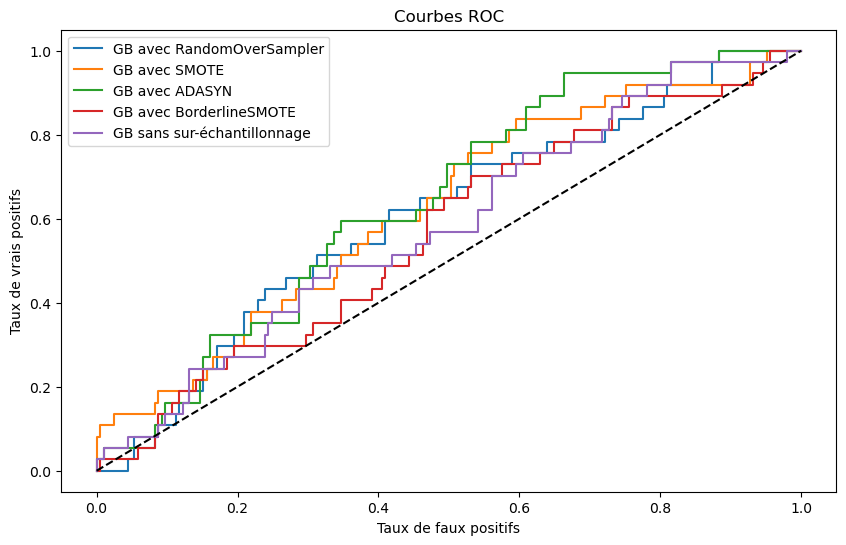

In [298]:
# Courbes ROC

fpr_gb_randomoversampler_cv, tpr_gb_randomoversampler_cv, _ = roc_curve(y_test, y_proba_gb_randomoversampler_cv)
fpr_gb_smote_cv, tpr_gb_smote_cv, _ = roc_curve(y_test, y_proba_gb_smote_cv)
fpr_gb_adasyn_cv, tpr_gb_adasyn_cv, _ = roc_curve(y_test, y_proba_gb_adasyn_cv)
fpr_gb_borderline_smote_cv, tpr_gb_borderline_smote_cv, _ = roc_curve(y_test, y_proba_gb_borderline_smote_cv)
fpr_gb_cv, tpr_gb_cv, _ = roc_curve(y_test, y_proba_gb_cv)

plt.figure(figsize=(10, 6))
plt.plot(fpr_gb_randomoversampler_cv, tpr_gb_randomoversampler_cv, label='GB avec RandomOverSampler')
plt.plot(fpr_gb_smote_cv, tpr_gb_smote_cv, label='GB avec SMOTE')
plt.plot(fpr_gb_adasyn_cv, tpr_gb_adasyn_cv, label='GB avec ADASYN')
plt.plot(fpr_gb_borderline_smote_cv, tpr_gb_borderline_smote_cv, label='GB avec BorderlineSMOTE')
plt.plot(fpr_gb_cv, tpr_gb_cv, label='GB sans sur-échantillonnage')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend()

# Export de l'image
plt.savefig('data/Courbes_ROC_gb_cv.png')

plt.show()


### E) Importance des variables

In [299]:
# Importance des variables

# Récupération de l'importance des variables pour chaque modèle
importances_gb_randomoversampler = grille_recherche_gb_randomoversampler.best_estimator_.named_steps['gb'].feature_importances_
importances_gb_smote = grille_recherche_gb_smote.best_estimator_.named_steps['gb'].feature_importances_
importances_gb_adasyn = grille_recherche_gb_adasyn.best_estimator_.named_steps['gb'].feature_importances_
importances_gb_borderline_smote = grille_recherche_gb_borderline_smote.best_estimator_.named_steps['gb'].feature_importances_
importances_gb = grille_recherche_gb.best_estimator_.named_steps['gb'].feature_importances_

# Création d'un DataFrame pour afficher les résultats
resultats_importance_variables_gb_randomoversampler = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_gb_randomoversampler
})

resultats_importance_variables_gb_smote = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_gb_smote
})

resultats_importance_variables_gb_adasyn = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_gb_adasyn
})

resultats_importance_variables_gb_borderline_smote = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_gb_borderline_smote
})

resultats_importance_variables_gb = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_gb
})

# Affichage des résultats
resultats_importance_variables_gb_randomoversampler = resultats_importance_variables_gb_randomoversampler.sort_values(by="Importance", ascending=False)
resultats_importance_variables_gb_smote = resultats_importance_variables_gb_smote.sort_values(by="Importance", ascending=False)
resultats_importance_variables_gb_adasyn = resultats_importance_variables_gb_adasyn.sort_values(by="Importance", ascending=False)
resultats_importance_variables_gb_borderline_smote = resultats_importance_variables_gb_borderline_smote.sort_values(by="Importance", ascending=False)
resultats_importance_gb = resultats_importance_variables_gb.sort_values(by="Importance", ascending=False)

resultats_importance_variables_gb_randomoversampler

Variable  Importance
18                               p_pop    0.111446
26                   total_entreprises    0.097237
6                nb_actes_france_renov    0.078983
21                       part_inactifs    0.063255
22                         part_actifs    0.060046
24              abstention_municipales    0.057068
20  com_variation_encours_dette_ha_pct    0.054631
12                        superf_choro    0.053557
16                            med_disp    0.041570
27             part_licencies_sportifs    0.040908
1              moyenne_conso_indus_hab    0.038561
5                        emissions_ges    0.036719
19                           CSP_maire    0.034886
9          part_residences_secondaires    0.029539
25                   taux_creation_ent    0.022217
4             moyenne_conso_totale_hab    0.021816
2          moyenne_conso_tertiaire_hab    0.021720
28            part_jeunes_sans_diplome    0.020698
3        moyenne_conso_residentiel_hab    0.020470
23                      dependance_eco    0.017829
15                part_trajets_voiture    0.017618
0               moyenne_conso_agri_hab    0.017079
11                            gridens7    0.014797
13                         departement    0.014001
7                               friche    0.010961
10                   beneficiaire_prog    0.002388
17                                  an    0.000000
14                            gare_tgv    0.000000
8                         ecoquartiers    0.000000
29                        climat_Autre    0.000000
30                     climat_Estuaire    0.000000
31                          climat_Mer    0.000000

In [300]:
resultats_importance_variables_gb_smote

Variable  Importance
7                               friche    0.187589
13                         departement    0.154519
18                               p_pop    0.076185
1              moyenne_conso_indus_hab    0.070844
21                       part_inactifs    0.056190
22                         part_actifs    0.052412
11                            gridens7    0.044657
19                           CSP_maire    0.038558
23                      dependance_eco    0.033997
24              abstention_municipales    0.028425
20  com_variation_encours_dette_ha_pct    0.027080
6                nb_actes_france_renov    0.025087
27             part_licencies_sportifs    0.021542
9          part_residences_secondaires    0.020394
5                        emissions_ges    0.018833
12                        superf_choro    0.018419
16                            med_disp    0.018283
4             moyenne_conso_totale_hab    0.015767
25                   taux_creation_ent    0.015570
3        moyenne_conso_residentiel_hab    0.014377
28            part_jeunes_sans_diplome    0.013818
2          moyenne_conso_tertiaire_hab    0.012130
15                part_trajets_voiture    0.012066
0               moyenne_conso_agri_hab    0.009577
26                   total_entreprises    0.007975
14                            gare_tgv    0.002198
10                   beneficiaire_prog    0.002016
8                         ecoquartiers    0.000680
31                          climat_Mer    0.000595
29                        climat_Autre    0.000218
17                                  an    0.000000
30                     climat_Estuaire    0.000000

In [301]:
resultats_importance_variables_gb_adasyn

Variable  Importance
13                         departement    0.178087
7                               friche    0.142715
11                            gridens7    0.090918
26                   total_entreprises    0.089895
1              moyenne_conso_indus_hab    0.055436
21                       part_inactifs    0.055032
22                         part_actifs    0.041255
19                           CSP_maire    0.041138
20  com_variation_encours_dette_ha_pct    0.038236
4             moyenne_conso_totale_hab    0.030781
12                        superf_choro    0.029055
6                nb_actes_france_renov    0.023447
27             part_licencies_sportifs    0.022843
24              abstention_municipales    0.022677
9          part_residences_secondaires    0.021807
3        moyenne_conso_residentiel_hab    0.019585
18                               p_pop    0.016747
28            part_jeunes_sans_diplome    0.015261
23                      dependance_eco    0.013865
25                   taux_creation_ent    0.012417
16                            med_disp    0.010537
2          moyenne_conso_tertiaire_hab    0.010014
5                        emissions_ges    0.007239
15                part_trajets_voiture    0.006972
0               moyenne_conso_agri_hab    0.003759
10                   beneficiaire_prog    0.000283
17                                  an    0.000000
14                            gare_tgv    0.000000
8                         ecoquartiers    0.000000
29                        climat_Autre    0.000000
30                     climat_Estuaire    0.000000
31                          climat_Mer    0.000000

In [302]:
resultats_importance_variables_gb_adasyn

Variable  Importance
13                         departement    0.178087
7                               friche    0.142715
11                            gridens7    0.090918
26                   total_entreprises    0.089895
1              moyenne_conso_indus_hab    0.055436
21                       part_inactifs    0.055032
22                         part_actifs    0.041255
19                           CSP_maire    0.041138
20  com_variation_encours_dette_ha_pct    0.038236
4             moyenne_conso_totale_hab    0.030781
12                        superf_choro    0.029055
6                nb_actes_france_renov    0.023447
27             part_licencies_sportifs    0.022843
24              abstention_municipales    0.022677
9          part_residences_secondaires    0.021807
3        moyenne_conso_residentiel_hab    0.019585
18                               p_pop    0.016747
28            part_jeunes_sans_diplome    0.015261
23                      dependance_eco    0.013865
25                   taux_creation_ent    0.012417
16                            med_disp    0.010537
2          moyenne_conso_tertiaire_hab    0.010014
5                        emissions_ges    0.007239
15                part_trajets_voiture    0.006972
0               moyenne_conso_agri_hab    0.003759
10                   beneficiaire_prog    0.000283
17                                  an    0.000000
14                            gare_tgv    0.000000
8                         ecoquartiers    0.000000
29                        climat_Autre    0.000000
30                     climat_Estuaire    0.000000
31                          climat_Mer    0.000000

In [303]:
resultats_importance_variables_gb

Variable  Importance
0               moyenne_conso_agri_hab    0.040818
1              moyenne_conso_indus_hab    0.026398
2          moyenne_conso_tertiaire_hab    0.040349
3        moyenne_conso_residentiel_hab    0.040305
4             moyenne_conso_totale_hab    0.041816
5                        emissions_ges    0.027931
6                nb_actes_france_renov    0.047083
7                               friche    0.018068
8                         ecoquartiers    0.001170
9          part_residences_secondaires    0.025954
10                   beneficiaire_prog    0.001907
11                            gridens7    0.005663
12                        superf_choro    0.064079
13                         departement    0.007888
14                            gare_tgv    0.007393
15                part_trajets_voiture    0.034677
16                            med_disp    0.037506
17                                  an    0.000000
18                               p_pop    0.073534
19                           CSP_maire    0.026391
20  com_variation_encours_dette_ha_pct    0.068472
21                       part_inactifs    0.063549
22                         part_actifs    0.043040
23                      dependance_eco    0.027629
24              abstention_municipales    0.028472
25                   taux_creation_ent    0.044399
26                   total_entreprises    0.041995
27             part_licencies_sportifs    0.065881
28            part_jeunes_sans_diplome    0.039696
29                        climat_Autre    0.001112
30                     climat_Estuaire    0.005943
31                          climat_Mer    0.000879

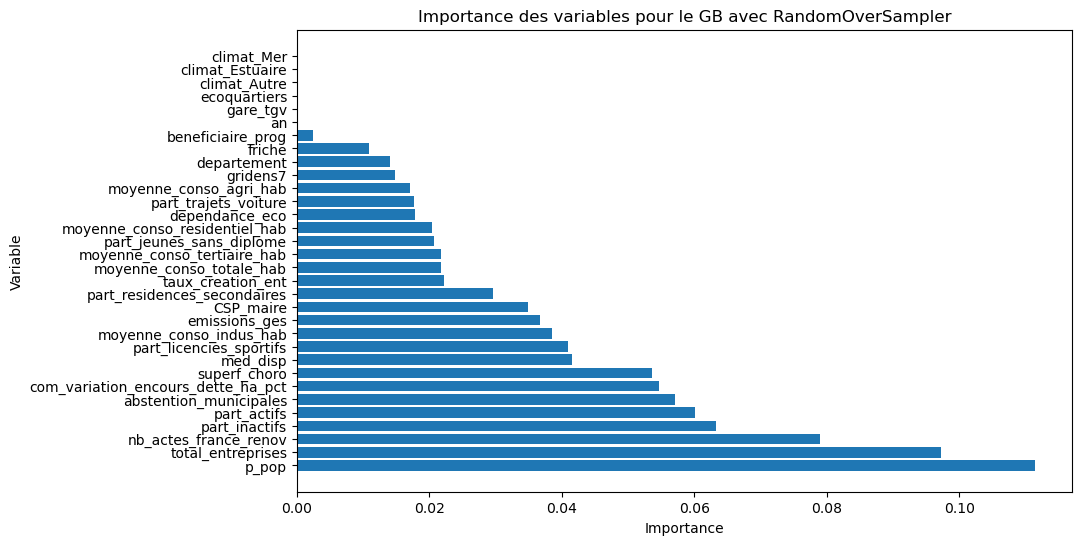

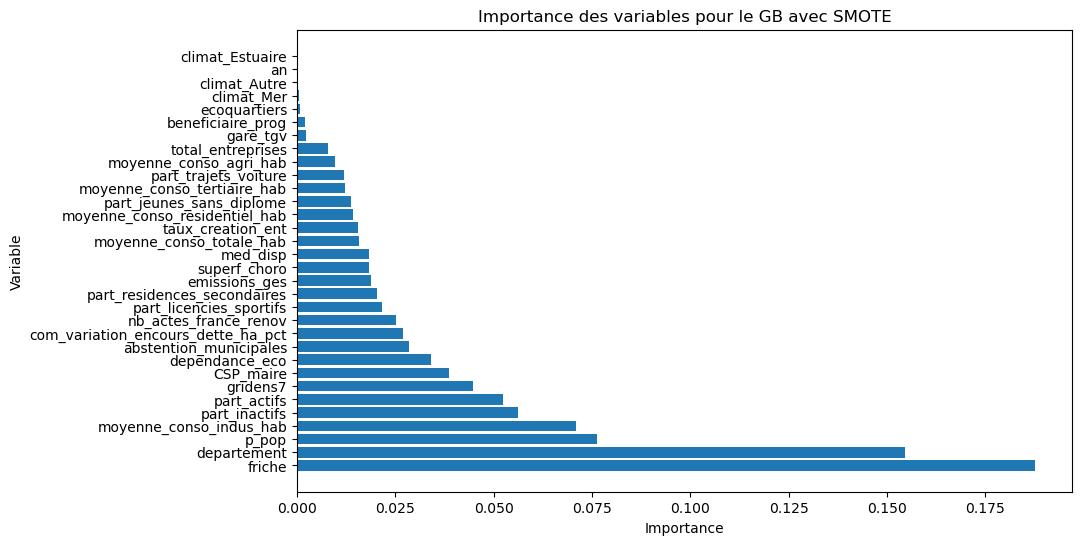

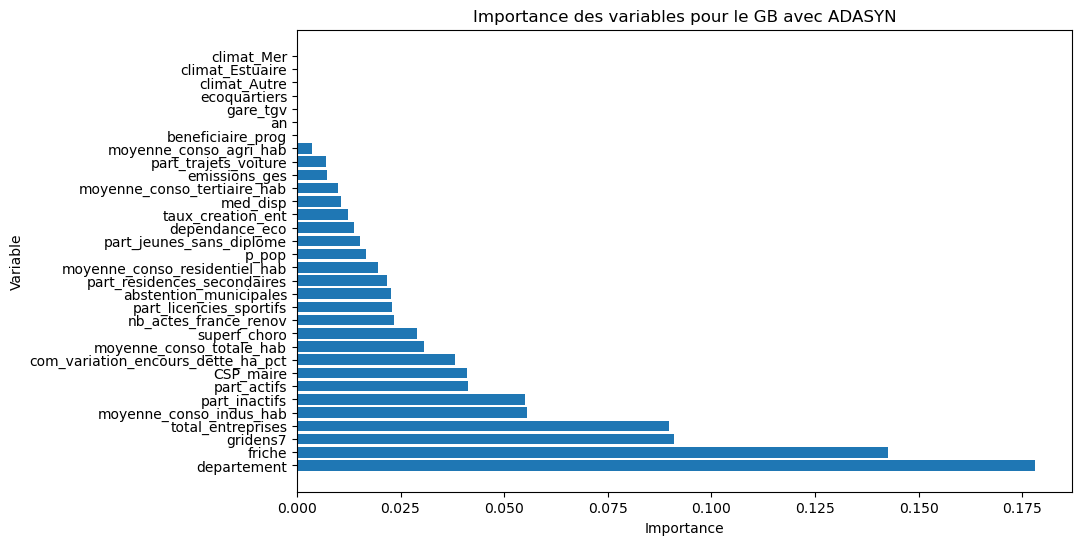

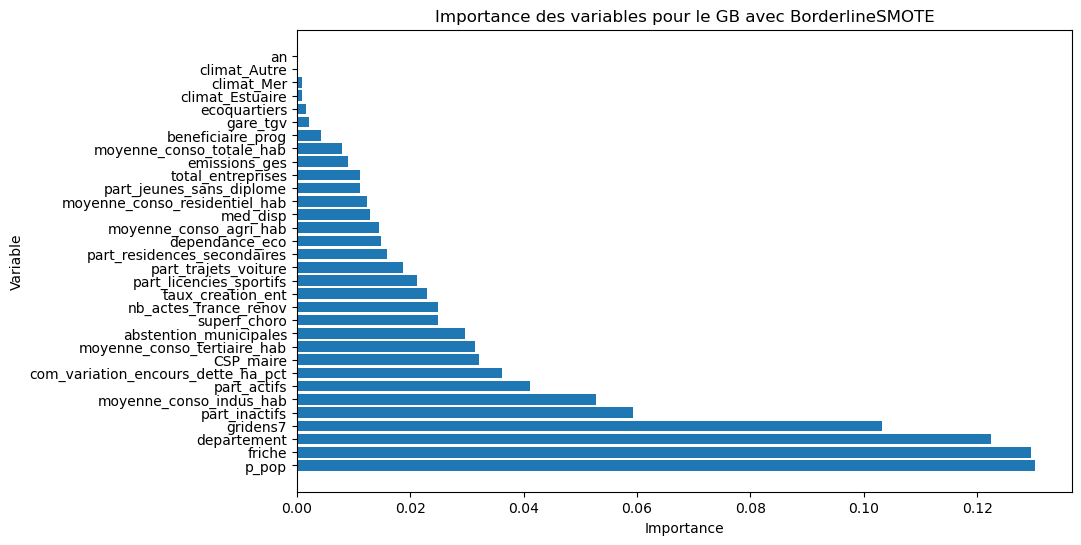

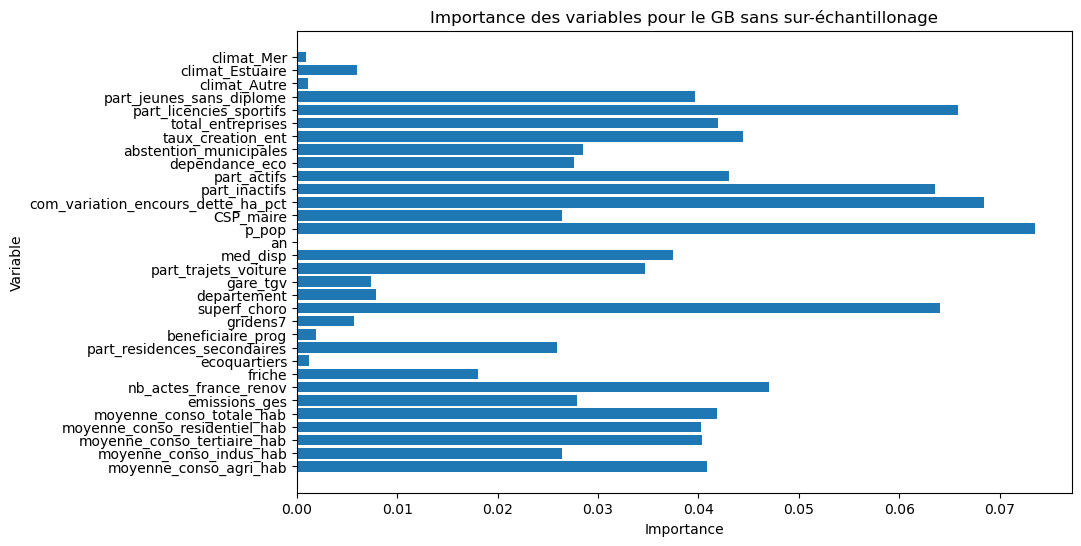

In [304]:
# Graphique de l'importance des variables

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_gb_randomoversampler['Variable'], resultats_importance_variables_gb_randomoversampler['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour le GB avec RandomOverSampler')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_gb_smote['Variable'], resultats_importance_variables_gb_smote['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour le GB avec SMOTE')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_gb_adasyn['Variable'], resultats_importance_variables_gb_adasyn['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour le GB avec ADASYN')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_gb_borderline_smote['Variable'], resultats_importance_variables_gb_borderline_smote['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour le GB avec BorderlineSMOTE')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_gb['Variable'], resultats_importance_variables_gb['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour le GB sans sur-échantillonage')
plt.show()

## I.2.5. Adaboost

### A) Construction des modèles

In [305]:
# Construction des modèles
from sklearn.ensemble import AdaBoostClassifier

etapes_adaboost_randomoversampler = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('oversampler', RandomOverSampler()), # Sur-échantillonnage
        ('adaboost', AdaBoostClassifier(random_state=42)) # AdaBoost
        ]

etapes_adaboost_smote = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('smote', SMOTE(k_neighbors = 5)), # Sur-échantillonnage
        ('adaboost', AdaBoostClassifier(random_state=42)) # AdaBoost
        ]

etapes_adaboost_adasyn = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('adasyn', ADASYN(n_neighbors = 5)), # Sur-échantillonnage
        ('adaboost', AdaBoostClassifier(random_state=42)) # AdaBoost
        ]

etapes_adaboost_borderline_smote = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('borderline_smote', BorderlineSMOTE(k_neighbors = 5)), # Sur-échantillonnage
        ('adaboost', AdaBoostClassifier(random_state=42)) # AdaBoost
        ]

etapes_adaboost = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('adaboost', AdaBoostClassifier(random_state=42)) # AdaBoost
        ]

modele_adaboost_randomoversampler = Pipeline(steps=etapes_adaboost_randomoversampler) # Création du pipeline
modele_adaboost_smote = Pipeline(steps=etapes_adaboost_smote) # Création du pipeline
modele_adaboost_adasyn = Pipeline(steps=etapes_adaboost_adasyn) # Création du pipeline
modele_adaboost_borderline_smote = Pipeline(steps=etapes_adaboost_borderline_smote) # Création du pipeline
modele_adaboost = Pipeline(steps=etapes_adaboost) # Création du pipeline

In [306]:
modele_adaboost_randomoversampler.fit(X_train, y_train) # Entraînement
modele_adaboost_smote.fit(X_train, y_train) # Entraînement
modele_adaboost_adasyn.fit(X_train, y_train) # Entraînement
modele_adaboost_borderline_smote.fit(X_train, y_train) # Entraînement
modele_adaboost.fit(X_train, y_train) # Entraînement

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('adaboost', AdaBoostClassifier(random_state=42))])

In [307]:
# Prédictions

y_proba_adaboost_randomoversampler = modele_adaboost_randomoversampler.predict_proba(X_test)[:, 1]
y_pred_adaboost_randomoversampler = modele_adaboost_randomoversampler.predict(X_test)

y_proba_adaboost_smote = modele_adaboost_smote.predict_proba(X_test)[:, 1]
y_pred_adaboost_smote = modele_adaboost_smote.predict(X_test)

y_proba_adaboost_adasyn = modele_adaboost_adasyn.predict_proba(X_test)[:, 1]
y_pred_adaboost_adasyn = modele_adaboost_adasyn.predict(X_test)

y_proba_adaboost_borderline_smote = modele_adaboost_borderline_smote.predict_proba(X_test)[:, 1]
y_pred_adaboost_borderline_smote = modele_adaboost_borderline_smote.predict(X_test)

y_proba_adaboost = modele_adaboost.predict_proba(X_test)[:, 1]
y_pred_adaboost = modele_adaboost.predict(X_test)

In [308]:
print(f'y_test shape: {y_test.shape}')
print(f'y_proba_adaboost_randomoversampler shape: {y_proba_adaboost_randomoversampler.shape}')
print(f'y_proba_adaboost_smote shape: {y_proba_adaboost_smote.shape}')
print(f'y_proba_adaboost_adasyn shape: {y_proba_adaboost_adasyn.shape}')
print(f'y_proba_adaboost_borderline_smote shape: {y_proba_adaboost_borderline_smote.shape}')
print(f'y_proba_adaboost shape: {y_proba_adaboost.shape}')


y_test shape: (242,)
y_proba_adaboost_randomoversampler shape: (242,)
y_proba_adaboost_smote shape: (242,)
y_proba_adaboost_adasyn shape: (242,)
y_proba_adaboost_borderline_smote shape: (242,)
y_proba_adaboost shape: (242,)


### B) Mesure de la performance des modèles initiaux

In [309]:
# Calcul des métriques

auc_roc_adaboost_randomoversampler = roc_auc_score(y_test, y_proba_adaboost_randomoversampler)
auc_pr_adaboost_randomoversampler = average_precision_score(y_test, y_proba_adaboost_randomoversampler)
log_loss_value_adaboost_randomoversampler = log_loss(y_test, y_proba_adaboost_randomoversampler)
precision_adaboost_randomoversampler = precision_score(y_test, y_pred_adaboost_randomoversampler)
recall_adaboost_randomoversampler = recall_score(y_test, y_pred_adaboost_randomoversampler)
f1_adaboost_randomoversampler = f1_score(y_test, y_pred_adaboost_randomoversampler)
mcc_adaboost_randomoversampler = matthews_corrcoef(y_test, y_pred_adaboost_randomoversampler)
balanced_acc_adaboost_randomoversampler = balanced_accuracy_score(y_test, y_pred_adaboost_randomoversampler)
specificity_adaboost_randomoversampler = confusion_matrix(y_test, y_pred_adaboost_randomoversampler)[0, 0] / (confusion_matrix(y_test, y_pred_adaboost_randomoversampler)[0, 0] + confusion_matrix(y_test, y_pred_adaboost_randomoversampler)[0, 1])
cohen_kappa_adaboost_randomoversampler = cohen_kappa_score(y_test, y_pred_adaboost_randomoversampler)

auc_roc_adaboost_smote = roc_auc_score(y_test, y_proba_adaboost_smote)
auc_pr_adaboost_smote = average_precision_score(y_test, y_proba_adaboost_smote)
log_loss_value_adaboost_smote = log_loss(y_test, y_proba_adaboost_smote)
precision_adaboost_smote = precision_score(y_test, y_pred_adaboost_smote)
recall_adaboost_smote = recall_score(y_test, y_pred_adaboost_smote)
f1_adaboost_smote = f1_score(y_test, y_pred_adaboost_smote)
mcc_adaboost_smote = matthews_corrcoef(y_test, y_pred_adaboost_smote)
balanced_acc_adaboost_smote = balanced_accuracy_score(y_test, y_pred_adaboost_smote)
specificity_adaboost_smote = confusion_matrix(y_test, y_pred_adaboost_smote)[0, 0] / (confusion_matrix(y_test, y_pred_adaboost_smote)[0, 0] + confusion_matrix(y_test, y_pred_adaboost_smote)[0, 1])
cohen_kappa_adaboost_smote = cohen_kappa_score(y_test, y_pred_adaboost_smote)

auc_roc_adaboost_adasyn = roc_auc_score(y_test, y_proba_adaboost_adasyn)
auc_pr_adaboost_adasyn = average_precision_score(y_test, y_proba_adaboost_adasyn)
log_loss_value_adaboost_adasyn = log_loss(y_test, y_proba_adaboost_adasyn)
precision_adaboost_adasyn = precision_score(y_test, y_pred_adaboost_adasyn)
recall_adaboost_adasyn = recall_score(y_test, y_pred_adaboost_adasyn)
f1_adaboost_adasyn = f1_score(y_test, y_pred_adaboost_adasyn)
mcc_adaboost_adasyn = matthews_corrcoef(y_test, y_pred_adaboost_adasyn)
balanced_acc_adaboost_adasyn = balanced_accuracy_score(y_test, y_pred_adaboost_adasyn)
specificity_adaboost_adasyn = confusion_matrix(y_test, y_pred_adaboost_adasyn)[0, 0] / (confusion_matrix(y_test, y_pred_adaboost_adasyn)[0, 0] + confusion_matrix(y_test, y_pred_adaboost_adasyn)[0, 1])
cohen_kappa_adaboost_adasyn = cohen_kappa_score(y_test, y_pred_adaboost_adasyn)

auc_roc_adaboost_borderline_smote = roc_auc_score(y_test, y_proba_adaboost_borderline_smote)
auc_pr_adaboost_borderline_smote = average_precision_score(y_test, y_proba_adaboost_borderline_smote)
log_loss_value_adaboost_borderline_smote = log_loss(y_test, y_proba_adaboost_borderline_smote)
precision_adaboost_borderline_smote = precision_score(y_test, y_pred_adaboost_borderline_smote)
recall_adaboost_borderline_smote = recall_score(y_test, y_pred_adaboost_borderline_smote)
f1_adaboost_borderline_smote = f1_score(y_test, y_pred_adaboost_borderline_smote)
mcc_adaboost_borderline_smote = matthews_corrcoef(y_test, y_pred_adaboost_borderline_smote)
balanced_acc_adaboost_borderline_smote = balanced_accuracy_score(y_test, y_pred_adaboost_borderline_smote)
specificity_adaboost_borderline_smote = confusion_matrix(y_test, y_pred_adaboost_borderline_smote)[0, 0] / (confusion_matrix(y_test, y_pred_adaboost_borderline_smote)[0, 0] + confusion_matrix(y_test, y_pred_adaboost_borderline_smote)[0, 1])
cohen_kappa_adaboost_borderline_smote = cohen_kappa_score(y_test, y_pred_adaboost_borderline_smote)

auc_roc_adaboost = roc_auc_score(y_test, y_proba_adaboost)
auc_pr_adaboost = average_precision_score(y_test, y_proba_adaboost)
log_loss_value_adaboost = log_loss(y_test, y_proba_adaboost)
precision_adaboost = precision_score(y_test, y_pred_adaboost)
recall_adaboost = recall_score(y_test, y_pred_adaboost)
f1_adaboost = f1_score(y_test, y_pred_adaboost)
mcc_adaboost = matthews_corrcoef(y_test, y_pred_adaboost)
balanced_acc_adaboost = balanced_accuracy_score(y_test, y_pred_adaboost)
specificity_adaboost = confusion_matrix(y_test, y_pred_adaboost)[0, 0] / (confusion_matrix(y_test, y_pred_adaboost)[0, 0] + confusion_matrix(y_test, y_pred_adaboost)[0, 1])
cohen_kappa_adaboost = cohen_kappa_score(y_test, y_pred_adaboost)

In [310]:
# Affichage des résultats

resultats_adaboost = pd.DataFrame({
    "AdaBoost sans sur-échantillonnage": [auc_roc_adaboost, auc_pr_adaboost, f1_adaboost, balanced_acc_adaboost],
    "AdaBoost avec SMOTE": [auc_roc_adaboost_smote, auc_pr_adaboost_smote, f1_adaboost_smote, balanced_acc_adaboost_smote],
    "AdaBoost avec RandomOverSampler": [auc_roc_adaboost_randomoversampler, auc_pr_adaboost_randomoversampler, f1_adaboost_randomoversampler, balanced_acc_adaboost_randomoversampler],
    "AdaBoost avec ADASYN": [auc_roc_adaboost_adasyn, auc_pr_adaboost_adasyn, f1_adaboost_adasyn, balanced_acc_adaboost_adasyn],
    "AdaBoost avec BorderlineSMOTE": [auc_roc_adaboost_borderline_smote, auc_pr_adaboost_borderline_smote, f1_adaboost_borderline_smote, balanced_acc_adaboost_borderline_smote]
    },
    index = ["AUC-ROC", "AUC-PR", "F1-score", "Balanced accuracy"]
)

# Arrondir les résultats à 3 chiffres après la virgule
resultats_adaboost = resultats_adaboost.round(3)
resultats_adaboost

AdaBoost sans sur-échantillonnage  AdaBoost avec SMOTE  \
AUC-ROC                                        0.628                0.636   
AUC-PR                                         0.270                0.228   
F1-score                                       0.197                0.280   
Balanced accuracy                              0.537                0.570   

                   AdaBoost avec RandomOverSampler  AdaBoost avec ADASYN  \
AUC-ROC                                      0.658                 0.616   
AUC-PR                                       0.296                 0.233   
F1-score                                     0.362                 0.314   
Balanced accuracy                            0.647                 0.597   

                   AdaBoost avec BorderlineSMOTE  
AUC-ROC                                    0.609  
AUC-PR                                     0.217  
F1-score                                   0.252  
Balanced accuracy                          0.546

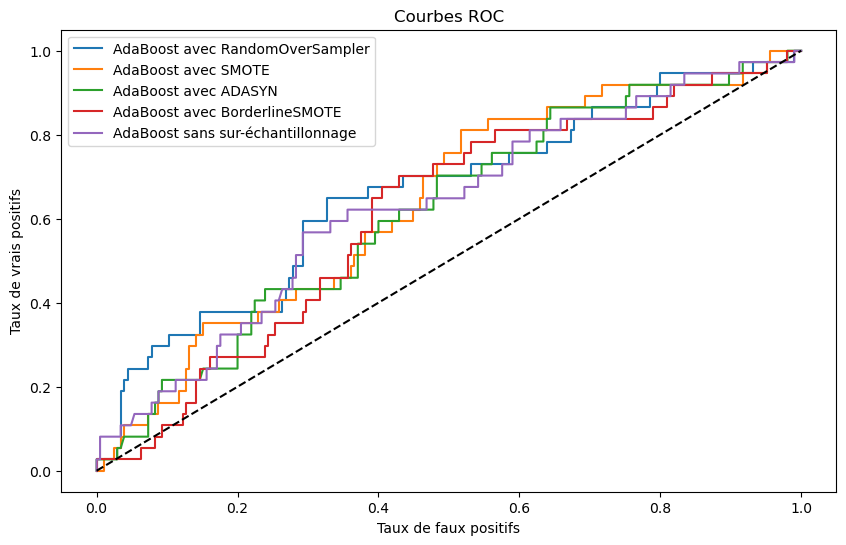

In [311]:
# Courbes ROC

fpr_adaboost_randomoversampler, tpr_adaboost_randomoversampler, _ = roc_curve(y_test, y_proba_adaboost_randomoversampler)
fpr_adaboost_smote, tpr_adaboost_smote, _ = roc_curve(y_test, y_proba_adaboost_smote)
fpr_adaboost_adasyn, tpr_adaboost_adasyn, _ = roc_curve(y_test, y_proba_adaboost_adasyn)
fpr_adaboost_borderline_smote, tpr_adaboost_borderline_smote, _ = roc_curve(y_test, y_proba_adaboost_borderline_smote)
fpr_adaboost, tpr_adaboost, _ = roc_curve(y_test, y_proba_adaboost)

plt.figure(figsize=(10, 6))
plt.plot(fpr_adaboost_randomoversampler, tpr_adaboost_randomoversampler, label='AdaBoost avec RandomOverSampler')
plt.plot(fpr_adaboost_smote, tpr_adaboost_smote, label='AdaBoost avec SMOTE')
plt.plot(fpr_adaboost_adasyn, tpr_adaboost_adasyn, label='AdaBoost avec ADASYN')
plt.plot(fpr_adaboost_borderline_smote, tpr_adaboost_borderline_smote, label='AdaBoost avec BorderlineSMOTE')
plt.plot(fpr_adaboost, tpr_adaboost, label='AdaBoost sans sur-échantillonnage')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend()

# Export de l'image
plt.savefig('data/Courbes_ROC_adaboost.png')

plt.show()


### C) Ajustement des hyperparamètres

In [312]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score, balanced_accuracy_score, roc_auc_score

# Grilles de paramètres adaptées pour éviter le surapprentissage

param_grid_adaboost_oversampler = {
    'oversampler__sampling_strategy': [0.2, 0.4, 0.5, 0.75, 1.0],  # Stratégies simplifiées pour échantillonnage
    'adaboost__n_estimators': [50, 100, 300],  # Réduction des options pour le nombre d'arbres
    'adaboost__learning_rate': [0.001, 0.01, 0.1],  # Ajout d'une valeur plus basse pour learning_rate
}

param_grid_adaboost_smote = {
    'smote__k_neighbors': [5, 7],  # Réduction des voisins pour SMOTE
    'smote__sampling_strategy': [0.2, 0.4, 0.5, 0.75, 1.0], 
    'adaboost__n_estimators': [50, 100, 300], 
    'adaboost__learning_rate': [0.001, 0.01, 0.1],  
}

param_grid_adaboost_adasyn = {
    'adasyn__n_neighbors': [5, 7], 
    'adasyn__sampling_strategy': [0.2, 0.4, 0.5, 0.75, 1.0], 
    'adaboost__n_estimators': [50, 100, 300], 
    'adaboost__learning_rate': [0.001, 0.01, 0.1],  
}

param_grid_adaboost_borderline_smote = {
    'borderline_smote__k_neighbors': [5, 7], 
    'borderline_smote__sampling_strategy': [0.2, 0.4, 0.5, 0.75, 1.0], 
    'adaboost__n_estimators': [50, 100, 300], 
    'adaboost__learning_rate': [0.001, 0.01, 0.1],  
}

param_grid_adaboost = {
    'adaboost__n_estimators': [50, 100, 300], 
    'adaboost__learning_rate': [0.001, 0.01, 0.1],  
}

# Choix des métriques adaptées
scoring = {
    'F1': make_scorer(f1_score),
    'Balanced Accuracy': make_scorer(balanced_accuracy_score),
    'AUC': make_scorer(roc_auc_score),
}

In [313]:
# Ajustement des hyperparamètres

grille_recherche_adaboost_randomoversampler = RandomizedSearchCV(modele_adaboost_randomoversampler, param_grid_adaboost_oversampler, cv=cv, scoring=scoring, refit = 'AUC', n_jobs=-1, n_iter=50, random_state=42)
grille_recherche_adaboost_smote = RandomizedSearchCV(modele_adaboost_smote, param_grid_adaboost_smote, cv=cv, scoring=scoring, refit = 'AUC',n_jobs=-1, n_iter=50, random_state=42)
grille_recherche_adaboost_adasyn = RandomizedSearchCV(modele_adaboost_adasyn, param_grid_adaboost_adasyn, cv=cv, scoring=scoring, refit = 'AUC',n_jobs=-1, n_iter=50, random_state=42)
grille_recherche_adaboost_borderline_smote = RandomizedSearchCV(modele_adaboost_borderline_smote, param_grid_adaboost_borderline_smote, cv=cv, scoring=scoring, refit = 'AUC',n_jobs=-1, n_iter=50, random_state=42)
grille_recherche_adaboost = RandomizedSearchCV(modele_adaboost, param_grid_adaboost, cv=cv, scoring=scoring, refit = 'AUC',n_jobs=-1, n_iter=50, random_state=42)

In [314]:
# Sélection du meilleur modèle

modele_adaboost_randomoversampler_opt = grille_recherche_adaboost_randomoversampler.fit(X_train, y_train).best_estimator_

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
170 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
170 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\utils\fixes.py", line 85, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\pipeline.py", line 329, in fit
    Xt, yt = self._fit(X, y, routed_params)
             ^^^^^^^^^^^^^^^

In [315]:
modele_adaboost_smote_opt = grille_recherche_adaboost_smote.fit(X_train, y_train).best_estimator_

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
190 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
190 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\utils\fixes.py", line 85, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\pipeline.py", line 329, in fit
    Xt, yt = self._fit(X, y, routed_params)
             ^^^^^^^^^^^^^^^

In [316]:
modele_adaboost_adasyn_opt = grille_recherche_adaboost_adasyn.fit(X_train, y_train).best_estimator_

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
190 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
190 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\utils\fixes.py", line 85, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\pipeline.py", line 329, in fit
    Xt, yt = self._fit(X, y, routed_params)
             ^^^^^^^^^^^^^^^

In [317]:
modele_adaboost_borderline_smote_opt = grille_recherche_adaboost_borderline_smote.fit(X_train, y_train).best_estimator_

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
190 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
190 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\utils\fixes.py", line 85, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\pipeline.py", line 329, in fit
    Xt, yt = self._fit(X, y, routed_params)
             ^^^^^^^^^^^^^^^

In [318]:
modele_adaboost_opt = grille_recherche_adaboost.fit(X_train, y_train).best_estimator_

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 24 is smaller than n_iter=100. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [319]:
# Prédictions

y_proba_adaboost_randomoversampler_cv = modele_adaboost_randomoversampler_opt.predict_proba(X_test)[:, 1]
y_pred_adaboost_randomoversampler_cv = modele_adaboost_randomoversampler_opt.predict(X_test)

y_proba_adaboost_smote_cv = modele_adaboost_smote_opt.predict_proba(X_test)[:, 1]
y_pred_adaboost_smote_cv = modele_adaboost_smote_opt.predict(X_test)

y_proba_adaboost_adasyn_cv = modele_adaboost_adasyn_opt.predict_proba(X_test)[:, 1]
y_pred_adaboost_adasyn_cv = modele_adaboost_adasyn_opt.predict(X_test)

y_proba_adaboost_borderline_smote_cv = modele_adaboost_borderline_smote_opt.predict_proba(X_test)[:, 1]
y_pred_adaboost_borderline_smote_cv = modele_adaboost_borderline_smote_opt.predict(X_test)

y_proba_adaboost_cv = modele_adaboost_opt.predict_proba(X_test)[:, 1]
y_pred_adaboost_cv = modele_adaboost_opt.predict(X_test)

### D) Mesure de la performance des modèles optimisés

In [320]:
# Calcul des métriques

auc_roc_adaboost_randomoversampler_cv = roc_auc_score(y_test, y_proba_adaboost_randomoversampler_cv)
auc_pr_adaboost_randomoversampler_cv = average_precision_score(y_test, y_proba_adaboost_randomoversampler_cv)
log_loss_value_adaboost_randomoversampler_cv = log_loss(y_test, y_proba_adaboost_randomoversampler_cv)
precision_adaboost_randomoversampler_cv = precision_score(y_test, y_pred_adaboost_randomoversampler_cv)
recall_adaboost_randomoversampler_cv = recall_score(y_test, y_pred_adaboost_randomoversampler_cv)
f1_adaboost_randomoversampler_cv = f1_score(y_test, y_pred_adaboost_randomoversampler_cv)
mcc_adaboost_randomoversampler_cv = matthews_corrcoef(y_test, y_pred_adaboost_randomoversampler_cv)
balanced_acc_adaboost_randomoversampler_cv = balanced_accuracy_score(y_test, y_pred_adaboost_randomoversampler_cv)
specificity_adaboost_randomoversampler_cv = confusion_matrix(y_test, y_pred_adaboost_randomoversampler_cv)[0, 0] / (confusion_matrix(y_test, y_pred_adaboost_randomoversampler_cv)[0, 0] + confusion_matrix(y_test, y_pred_adaboost_randomoversampler_cv)[0, 1])
cohen_kappa_adaboost_randomoversampler_cv = cohen_kappa_score(y_test, y_pred_adaboost_randomoversampler_cv)

auc_roc_adaboost_smote_cv = roc_auc_score(y_test, y_proba_adaboost_smote_cv)
auc_pr_adaboost_smote_cv = average_precision_score(y_test, y_proba_adaboost_smote_cv)
log_loss_value_adaboost_smote_cv = log_loss(y_test, y_proba_adaboost_smote_cv)
precision_adaboost_smote_cv = precision_score(y_test, y_pred_adaboost_smote_cv)
recall_adaboost_smote_cv = recall_score(y_test, y_pred_adaboost_smote_cv)
f1_adaboost_smote_cv = f1_score(y_test, y_pred_adaboost_smote_cv)
mcc_adaboost_smote_cv = matthews_corrcoef(y_test, y_pred_adaboost_smote_cv)
balanced_acc_adaboost_smote_cv = balanced_accuracy_score(y_test, y_pred_adaboost_smote_cv)
specificity_adaboost_smote_cv = confusion_matrix(y_test, y_pred_adaboost_smote_cv)[0, 0] / (confusion_matrix(y_test, y_pred_adaboost_smote_cv)[0, 0] + confusion_matrix(y_test, y_pred_adaboost_smote_cv)[0, 1])
cohen_kappa_adaboost_smote_cv = cohen_kappa_score(y_test, y_pred_adaboost_smote_cv)

auc_roc_adaboost_adasyn_cv = roc_auc_score(y_test, y_proba_adaboost_adasyn_cv)
auc_pr_adaboost_adasyn_cv = average_precision_score(y_test, y_proba_adaboost_adasyn_cv)
log_loss_value_adaboost_adasyn_cv = log_loss(y_test, y_proba_adaboost_adasyn_cv)
precision_adaboost_adasyn_cv = precision_score(y_test, y_pred_adaboost_adasyn_cv)
recall_adaboost_adasyn_cv = recall_score(y_test, y_pred_adaboost_adasyn_cv)
f1_adaboost_adasyn_cv = f1_score(y_test, y_pred_adaboost_adasyn_cv)
mcc_adaboost_adasyn_cv = matthews_corrcoef(y_test, y_pred_adaboost_adasyn_cv)
balanced_acc_adaboost_adasyn_cv = balanced_accuracy_score(y_test, y_pred_adaboost_adasyn_cv)
specificity_adaboost_adasyn_cv = confusion_matrix(y_test, y_pred_adaboost_adasyn_cv)[0, 0] / (confusion_matrix(y_test, y_pred_adaboost_adasyn_cv)[0, 0] + confusion_matrix(y_test, y_pred_adaboost_adasyn_cv)[0, 1])
cohen_kappa_adaboost_adasyn_cv = cohen_kappa_score(y_test, y_pred_adaboost_adasyn_cv)

auc_roc_adaboost_borderline_smote_cv = roc_auc_score(y_test, y_proba_adaboost_borderline_smote_cv)
auc_pr_adaboost_borderline_smote_cv = average_precision_score(y_test, y_proba_adaboost_borderline_smote_cv)
log_loss_value_adaboost_borderline_smote_cv = log_loss(y_test, y_proba_adaboost_borderline_smote_cv)
precision_adaboost_borderline_smote_cv = precision_score(y_test, y_pred_adaboost_borderline_smote_cv)
recall_adaboost_borderline_smote_cv = recall_score(y_test, y_pred_adaboost_borderline_smote_cv)
f1_adaboost_borderline_smote_cv = f1_score(y_test, y_pred_adaboost_borderline_smote_cv)
mcc_adaboost_borderline_smote_cv = matthews_corrcoef(y_test, y_pred_adaboost_borderline_smote_cv)
balanced_acc_adaboost_borderline_smote_cv = balanced_accuracy_score(y_test, y_pred_adaboost_borderline_smote_cv)
specificity_adaboost_borderline_smote_cv = confusion_matrix(y_test, y_pred_adaboost_borderline_smote_cv)[0, 0] / (confusion_matrix(y_test, y_pred_adaboost_borderline_smote_cv)[0, 0] + confusion_matrix(y_test, y_pred_adaboost_borderline_smote_cv)[0, 1])
cohen_kappa_adaboost_borderline_smote_cv = cohen_kappa_score(y_test, y_pred_adaboost_borderline_smote_cv)

auc_roc_adaboost_cv = roc_auc_score(y_test, y_proba_adaboost_cv)
auc_pr_adaboost_cv = average_precision_score(y_test, y_proba_adaboost_cv)
log_loss_value_adaboost_cv = log_loss(y_test, y_proba_adaboost_cv)
precision_adaboost_cv = precision_score(y_test, y_pred_adaboost_cv)
recall_adaboost_cv = recall_score(y_test, y_pred_adaboost_cv)
f1_adaboost_cv = f1_score(y_test, y_pred_adaboost_cv)
mcc_adaboost_cv = matthews_corrcoef(y_test, y_pred_adaboost_cv)
balanced_acc_adaboost_cv = balanced_accuracy_score(y_test, y_pred_adaboost_cv)
specificity_adaboost_cv = confusion_matrix(y_test, y_pred_adaboost_cv)[0, 0] / (confusion_matrix(y_test, y_pred_adaboost_cv)[0, 0] + confusion_matrix(y_test, y_pred_adaboost_cv)[0, 1])
cohen_kappa_adaboost_cv = cohen_kappa_score(y_test, y_pred_adaboost_cv)

In [321]:
# Affichage des résultats

resultats_adaboost_cv = pd.DataFrame({
    "AdaBoost sans sur-échantillonnage": [auc_roc_adaboost_cv, auc_pr_adaboost_cv, f1_adaboost_cv, balanced_acc_adaboost_cv],
    "AdaBoost avec SMOTE": [auc_roc_adaboost_smote_cv, auc_pr_adaboost_smote_cv, f1_adaboost_smote_cv, balanced_acc_adaboost_smote_cv],
    "AdaBoost avec RandomOverSampler": [auc_roc_adaboost_randomoversampler_cv, auc_pr_adaboost_randomoversampler_cv, f1_adaboost_randomoversampler_cv, balanced_acc_adaboost_randomoversampler_cv],
    "AdaBoost avec ADASYN": [auc_roc_adaboost_adasyn_cv, auc_pr_adaboost_adasyn_cv, f1_adaboost_adasyn_cv, balanced_acc_adaboost_adasyn_cv],
    "AdaBoost avec BorderlineSMOTE": [auc_roc_adaboost_borderline_smote_cv, auc_pr_adaboost_borderline_smote_cv, f1_adaboost_borderline_smote_cv, balanced_acc_adaboost_borderline_smote_cv]
    },
    index = ["AUC-ROC", "AUC-PR", "F1-score", "Balanced accuracy"]
)
# Arrondir les résultats à 3 chiffres après la virgule
resultats_adaboost_cv = resultats_adaboost_cv.round(3)
resultats_adaboost_cv

AdaBoost sans sur-échantillonnage  AdaBoost avec SMOTE  \
AUC-ROC                                        0.619                0.623   
AUC-PR                                         0.255                0.221   
F1-score                                       0.182                0.326   
Balanced accuracy                              0.536                0.613   

                   AdaBoost avec RandomOverSampler  AdaBoost avec ADASYN  \
AUC-ROC                                      0.610                 0.662   
AUC-PR                                       0.211                 0.280   
F1-score                                     0.246                 0.323   
Balanced accuracy                            0.532                 0.608   

                   AdaBoost avec BorderlineSMOTE  
AUC-ROC                                    0.633  
AUC-PR                                     0.217  
F1-score                                   0.329  
Balanced accuracy                          0.616

In [322]:
# Export 
resultats_adaboost_cv.to_csv("data/resultats_adaboost_cv.csv", index=True)
latex_table_adaboost = resultats_adaboost_cv.to_latex(index=True)
print(latex_table_adaboost)

\begin{tabular}{lrrrrr}
\toprule
 & AdaBoost sans sur-échantillonnage & AdaBoost avec SMOTE & AdaBoost avec RandomOverSampler & AdaBoost avec ADASYN & AdaBoost avec BorderlineSMOTE \\
\midrule
AUC-ROC & 0.619000 & 0.623000 & 0.610000 & 0.662000 & 0.633000 \\
AUC-PR & 0.255000 & 0.221000 & 0.211000 & 0.280000 & 0.217000 \\
F1-score & 0.182000 & 0.326000 & 0.246000 & 0.323000 & 0.329000 \\
Balanced accuracy & 0.536000 & 0.613000 & 0.532000 & 0.608000 & 0.616000 \\
\bottomrule
\end{tabular}



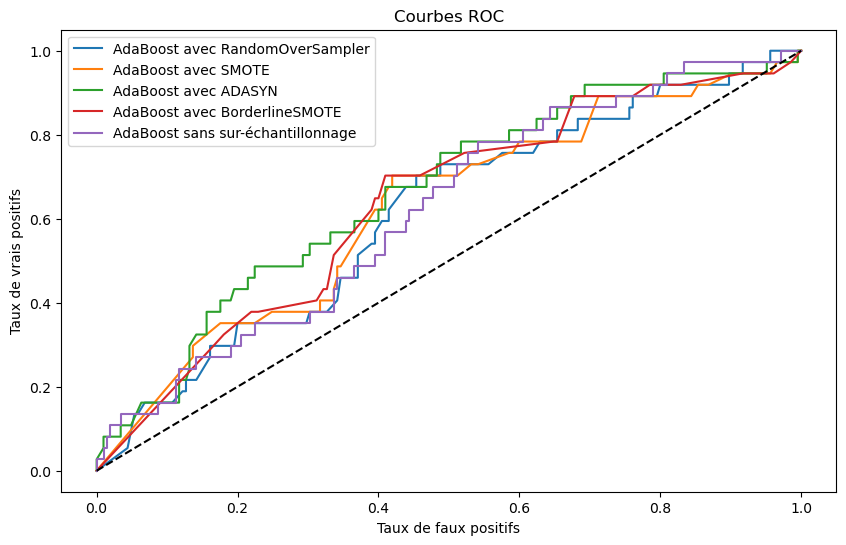

In [323]:
# Courbes ROC

fpr_adaboost_randomoversampler_cv, tpr_adaboost_randomoversampler_cv, _ = roc_curve(y_test, y_proba_adaboost_randomoversampler_cv)
fpr_adaboost_smote_cv, tpr_adaboost_smote_cv, _ = roc_curve(y_test, y_proba_adaboost_smote_cv)
fpr_adaboost_adasyn_cv, tpr_adaboost_adasyn_cv, _ = roc_curve(y_test, y_proba_adaboost_adasyn_cv)
fpr_adaboost_borderline_smote_cv, tpr_adaboost_borderline_smote_cv, _ = roc_curve(y_test, y_proba_adaboost_borderline_smote_cv)
fpr_adaboost_cv, tpr_adaboost_cv, _ = roc_curve(y_test, y_proba_adaboost_cv)

plt.figure(figsize=(10, 6))
plt.plot(fpr_adaboost_randomoversampler_cv, tpr_adaboost_randomoversampler_cv, label='AdaBoost avec RandomOverSampler')
plt.plot(fpr_adaboost_smote_cv, tpr_adaboost_smote_cv, label='AdaBoost avec SMOTE')
plt.plot(fpr_adaboost_adasyn_cv, tpr_adaboost_adasyn_cv, label='AdaBoost avec ADASYN')
plt.plot(fpr_adaboost_borderline_smote_cv, tpr_adaboost_borderline_smote_cv, label='AdaBoost avec BorderlineSMOTE')
plt.plot(fpr_adaboost_cv, tpr_adaboost_cv, label='AdaBoost sans sur-échantillonnage')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend()

# Export de l'image
plt.savefig('data/Courbes_ROC_adaboost_cv.png')

plt.show()

### E) Importance des variables

In [324]:
# Importance des variables

# Récupération de l'importance des variables pour chaque modèle
importances_adaboost_randomoversampler = modele_adaboost_randomoversampler_opt.named_steps['adaboost'].feature_importances_
importances_adaboost_smote = modele_adaboost_smote_opt.named_steps['adaboost'].feature_importances_
importances_adaboost_adasyn = modele_adaboost_adasyn_opt.named_steps['adaboost'].feature_importances_
importances_adaboost_borderline_smote = modele_adaboost_borderline_smote_opt.named_steps['adaboost'].feature_importances_
importances_adaboost = modele_adaboost_opt.named_steps['adaboost'].feature_importances_

# Création d'un DataFrame pour afficher les résultats
resultats_importance_variables_adaboost_randomoversampler = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_adaboost_randomoversampler
})

resultats_importance_variables_adaboost_smote = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_adaboost_smote
})

resultats_importance_variables_adaboost_adasyn = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_adaboost_adasyn
})

resultats_importance_variables_adaboost_borderline_smote = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_adaboost_borderline_smote
})

resultats_importance_variables_adaboost = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_adaboost
})

# Affichage des résultats
resultats_importance_variables_adaboost_randomoversampler = resultats_importance_variables_adaboost_randomoversampler.sort_values(by="Importance", ascending=False)
resultats_importance_variables_adaboost_smote = resultats_importance_variables_adaboost_smote.sort_values(by="Importance", ascending=False)
resultats_importance_variables_adaboost_adasyn = resultats_importance_variables_adaboost_adasyn.sort_values(by="Importance", ascending=False)
resultats_importance_variables_adaboost_borderline_smote = resultats_importance_variables_adaboost_borderline_smote.sort_values(by="Importance", ascending=False)
resultats_importance_variables_adaboost = resultats_importance_variables_adaboost.sort_values(by="Importance", ascending=False)

resultats_importance_variables_adaboost_randomoversampler

Variable  Importance
22                         part_actifs    0.233333
21                       part_inactifs    0.210000
6                nb_actes_france_renov    0.133333
18                               p_pop    0.120000
26                   total_entreprises    0.083333
1              moyenne_conso_indus_hab    0.040000
12                        superf_choro    0.040000
27             part_licencies_sportifs    0.040000
9          part_residences_secondaires    0.036667
20  com_variation_encours_dette_ha_pct    0.023333
16                            med_disp    0.020000
5                        emissions_ges    0.016667
24              abstention_municipales    0.003333
19                           CSP_maire    0.000000
25                   taux_creation_ent    0.000000
23                      dependance_eco    0.000000
28            part_jeunes_sans_diplome    0.000000
29                        climat_Autre    0.000000
30                     climat_Estuaire    0.000000
0               moyenne_conso_agri_hab    0.000000
17                                  an    0.000000
15                part_trajets_voiture    0.000000
14                            gare_tgv    0.000000
13                         departement    0.000000
11                            gridens7    0.000000
10                   beneficiaire_prog    0.000000
8                         ecoquartiers    0.000000
7                               friche    0.000000
4             moyenne_conso_totale_hab    0.000000
3        moyenne_conso_residentiel_hab    0.000000
2          moyenne_conso_tertiaire_hab    0.000000
31                          climat_Mer    0.000000

In [325]:
resultats_importance_variables_adaboost_smote

Variable  Importance
1              moyenne_conso_indus_hab        0.43
26                   total_entreprises        0.19
11                            gridens7        0.10
18                               p_pop        0.10
12                        superf_choro        0.07
7                               friche        0.04
5                        emissions_ges        0.02
6                nb_actes_france_renov        0.02
21                       part_inactifs        0.02
22                         part_actifs        0.01
28            part_jeunes_sans_diplome        0.00
27             part_licencies_sportifs        0.00
20  com_variation_encours_dette_ha_pct        0.00
25                   taux_creation_ent        0.00
29                        climat_Autre        0.00
24              abstention_municipales        0.00
23                      dependance_eco        0.00
30                     climat_Estuaire        0.00
0               moyenne_conso_agri_hab        0.00
16                            med_disp        0.00
19                           CSP_maire        0.00
17                                  an        0.00
15                part_trajets_voiture        0.00
14                            gare_tgv        0.00
13                         departement        0.00
10                   beneficiaire_prog        0.00
9          part_residences_secondaires        0.00
8                         ecoquartiers        0.00
4             moyenne_conso_totale_hab        0.00
3        moyenne_conso_residentiel_hab        0.00
2          moyenne_conso_tertiaire_hab        0.00
31                          climat_Mer        0.00

In [326]:
resultats_importance_variables_adaboost_smote

Variable  Importance
1              moyenne_conso_indus_hab        0.43
26                   total_entreprises        0.19
11                            gridens7        0.10
18                               p_pop        0.10
12                        superf_choro        0.07
7                               friche        0.04
5                        emissions_ges        0.02
6                nb_actes_france_renov        0.02
21                       part_inactifs        0.02
22                         part_actifs        0.01
28            part_jeunes_sans_diplome        0.00
27             part_licencies_sportifs        0.00
20  com_variation_encours_dette_ha_pct        0.00
25                   taux_creation_ent        0.00
29                        climat_Autre        0.00
24              abstention_municipales        0.00
23                      dependance_eco        0.00
30                     climat_Estuaire        0.00
0               moyenne_conso_agri_hab        0.00
16                            med_disp        0.00
19                           CSP_maire        0.00
17                                  an        0.00
15                part_trajets_voiture        0.00
14                            gare_tgv        0.00
13                         departement        0.00
10                   beneficiaire_prog        0.00
9          part_residences_secondaires        0.00
8                         ecoquartiers        0.00
4             moyenne_conso_totale_hab        0.00
3        moyenne_conso_residentiel_hab        0.00
2          moyenne_conso_tertiaire_hab        0.00
31                          climat_Mer        0.00

In [327]:
resultats_importance_variables_adaboost_borderline_smote

Variable  Importance
1              moyenne_conso_indus_hab        0.33
26                   total_entreprises        0.21
7                               friche        0.18
11                            gridens7        0.12
13                         departement        0.09
18                               p_pop        0.07
0               moyenne_conso_agri_hab        0.00
20  com_variation_encours_dette_ha_pct        0.00
21                       part_inactifs        0.00
22                         part_actifs        0.00
24              abstention_municipales        0.00
23                      dependance_eco        0.00
25                   taux_creation_ent        0.00
27             part_licencies_sportifs        0.00
28            part_jeunes_sans_diplome        0.00
29                        climat_Autre        0.00
30                     climat_Estuaire        0.00
19                           CSP_maire        0.00
16                            med_disp        0.00
17                                  an        0.00
15                part_trajets_voiture        0.00
14                            gare_tgv        0.00
12                        superf_choro        0.00
10                   beneficiaire_prog        0.00
9          part_residences_secondaires        0.00
8                         ecoquartiers        0.00
6                nb_actes_france_renov        0.00
5                        emissions_ges        0.00
4             moyenne_conso_totale_hab        0.00
3        moyenne_conso_residentiel_hab        0.00
2          moyenne_conso_tertiaire_hab        0.00
31                          climat_Mer        0.00

In [328]:
resultats_importance_variables_adaboost

Variable  Importance
3        moyenne_conso_residentiel_hab      0.0675
21                       part_inactifs      0.0650
5                        emissions_ges      0.0650
24              abstention_municipales      0.0600
22                         part_actifs      0.0550
27             part_licencies_sportifs      0.0525
25                   taux_creation_ent      0.0525
28            part_jeunes_sans_diplome      0.0500
20  com_variation_encours_dette_ha_pct      0.0500
2          moyenne_conso_tertiaire_hab      0.0425
16                            med_disp      0.0425
4             moyenne_conso_totale_hab      0.0400
12                        superf_choro      0.0400
6                nb_actes_france_renov      0.0350
26                   total_entreprises      0.0350
23                      dependance_eco      0.0350
1              moyenne_conso_indus_hab      0.0300
19                           CSP_maire      0.0300
13                         departement      0.0275
15                part_trajets_voiture      0.0275
9          part_residences_secondaires      0.0250
18                               p_pop      0.0250
0               moyenne_conso_agri_hab      0.0225
11                            gridens7      0.0125
14                            gare_tgv      0.0050
7                               friche      0.0050
30                     climat_Estuaire      0.0025
17                                  an      0.0000
10                   beneficiaire_prog      0.0000
8                         ecoquartiers      0.0000
29                        climat_Autre      0.0000
31                          climat_Mer      0.0000

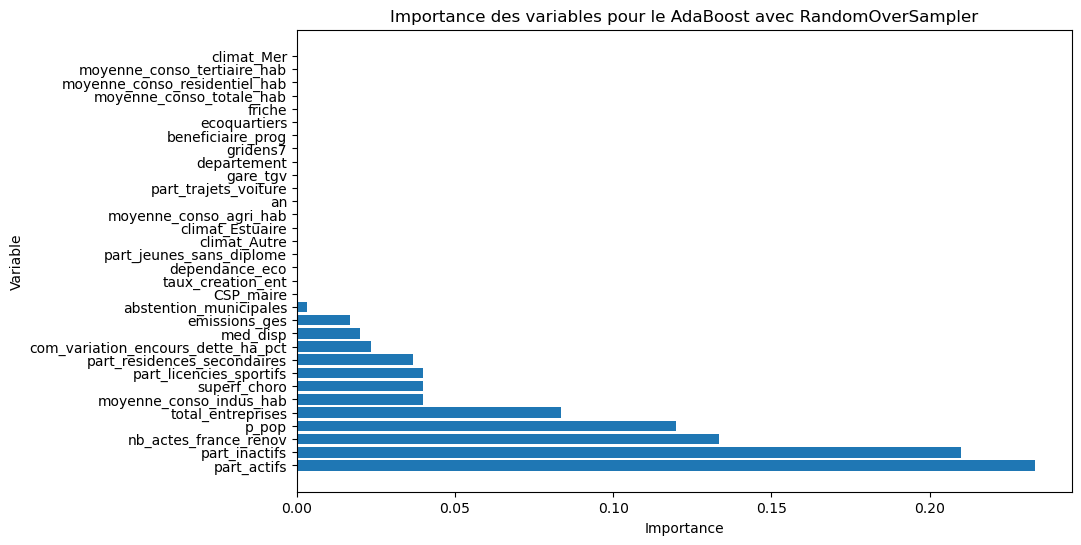

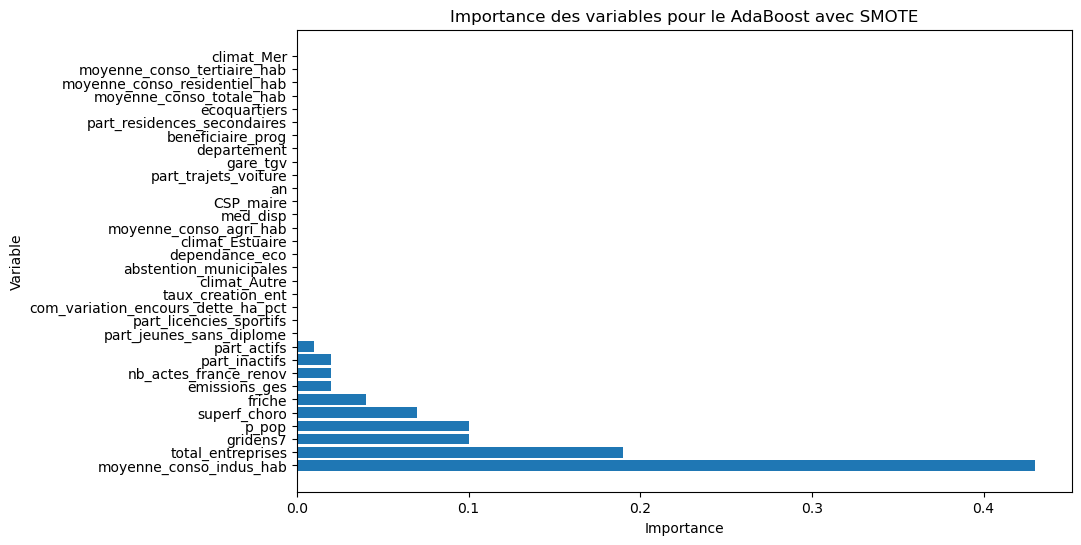

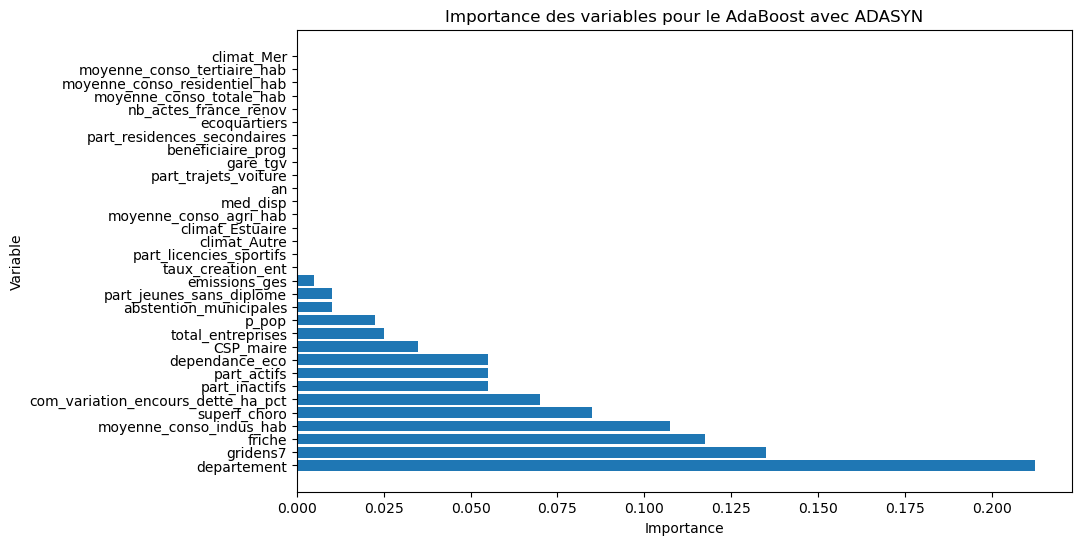

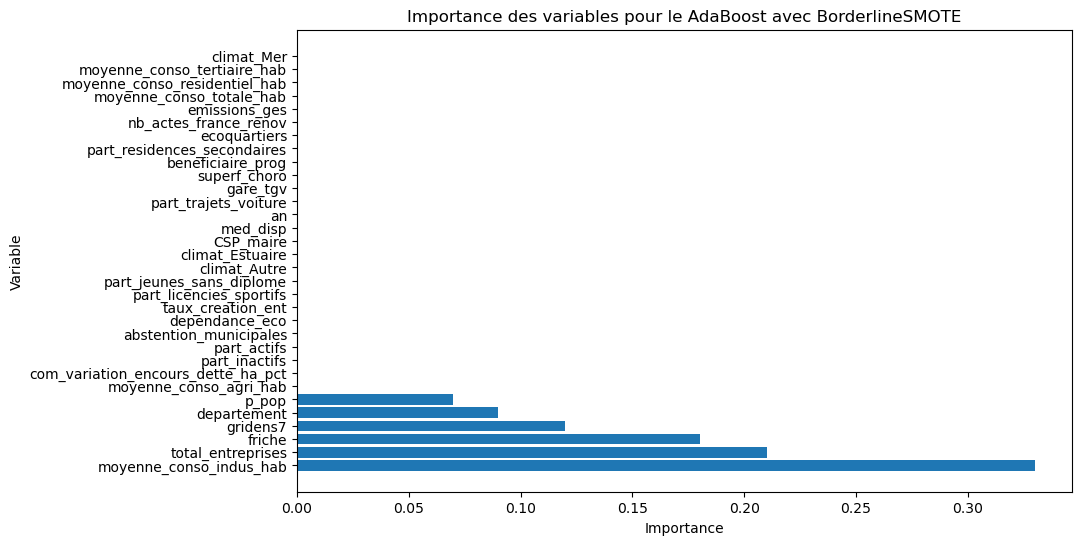

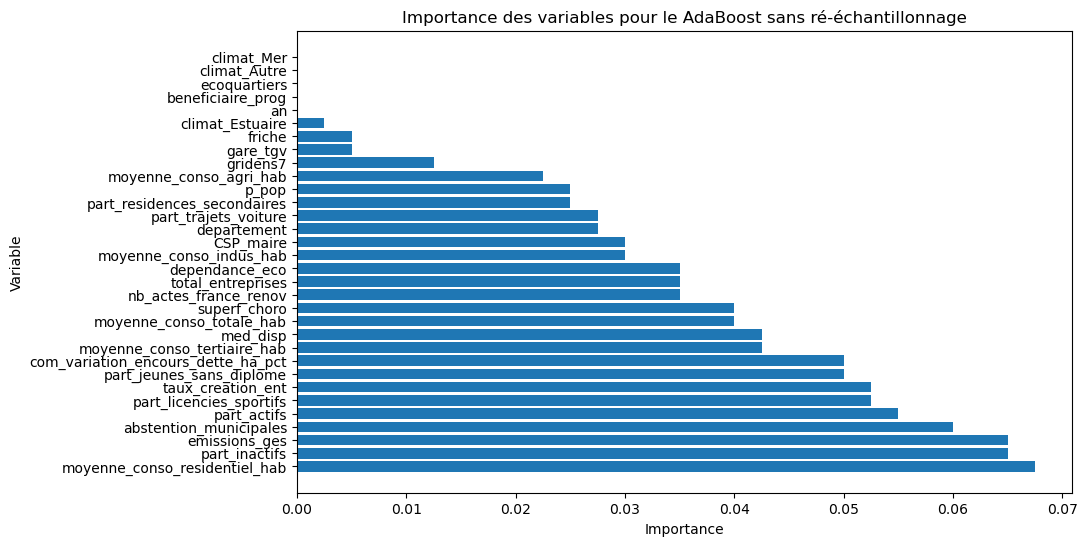

In [329]:
# Graphique de l'importance des variables

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_adaboost_randomoversampler['Variable'], resultats_importance_variables_adaboost_randomoversampler['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour le AdaBoost avec RandomOverSampler')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_adaboost_smote['Variable'], resultats_importance_variables_adaboost_smote['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour le AdaBoost avec SMOTE')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_adaboost_adasyn['Variable'], resultats_importance_variables_adaboost_adasyn['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour le AdaBoost avec ADASYN')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_adaboost_borderline_smote['Variable'], resultats_importance_variables_adaboost_borderline_smote['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour le AdaBoost avec BorderlineSMOTE')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_adaboost['Variable'], resultats_importance_variables_adaboost['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour le AdaBoost sans ré-échantillonnage')
plt.show()

## I.4. Modèles optimisés ++

In [336]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, f1_score, roc_auc_score, balanced_accuracy_score

# Définition de la grille des hyperparamètres
param_grid_rf_bis = {
    'smote__k_neighbors': [3, 5, 7, 9, 11],
    'smote__sampling_strategy': ['auto', 0.2, 0.4, 0.5, 0.75, 1],
    'rf__n_estimators': [5, 10, 30, 50, 100, 300],
    'rf__criterion': ['gini', 'entropy'],
    'rf__max_depth': [2, 3, 5, 7, 9, 10, 15, 21, 27],
    'rf__min_samples_split': [2, 5, 10, 15, 20],
    'rf__min_samples_leaf': [1, 2, 4, 6],
    'rf__bootstrap': [True, False]
}

scoring = {
    'F1': make_scorer(f1_score),
    'Balanced Accuracy': make_scorer(balanced_accuracy_score),
    'AUC': make_scorer(roc_auc_score),
}

grille_recherche_rf_bis = RandomizedSearchCV(
    modele_rf_smote, 
    param_grid_rf_bis, 
    cv=cv, 
    scoring=scoring, 
    refit='AUC', 
    n_jobs=1, 
    n_iter=50, 
    random_state=42
)

# Exécution de la grille de recherche
modele_rf_opt_bis = grille_recherche_rf_bis.fit(X_train, y_train).best_estimator_

# Affichage des meilleurs paramètres
print("Meilleurs hyperparamètres : ", grille_recherche_rf_bis.best_params_)
print("Meilleur score AUC : ", grille_recherche_rf_bis.best_score_)


c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
190 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
190 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\utils\fixes.py", line 85, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\pipeline.py", line 329, in fit
    Xt, yt = self._fit(X, y, routed_params)
             ^^^^^^^^^^^^^^^

Meilleurs hyperparamètres :  {'smote__sampling_strategy': 1, 'smote__k_neighbors': 3, 'rf__n_estimators': 100, 'rf__min_samples_split': 2, 'rf__min_samples_leaf': 1, 'rf__max_depth': 2, 'rf__criterion': 'gini', 'rf__bootstrap': False}
Meilleur score AUC :  0.6432236597170513


In [337]:
# Prédictions 

y_proba_rf_bis = modele_rf_opt_bis.predict_proba(X_test)[:, 1]
y_pred_rf_bis = modele_rf_opt_bis.predict(X_test)

# Calcul des métriques

auc_roc_rf_bis = roc_auc_score(y_test, y_proba_rf_bis)
f1_rf_bis = f1_score(y_test, y_pred_rf_bis)
balanced_acc_rf_bis = balanced_accuracy_score(y_test, y_pred_rf_bis)

# Affichage des résultats

resultats_rf_bis = pd.DataFrame({
    "Random Forest avec SMOTE": [auc_roc_rf_bis, f1_rf_bis, balanced_acc_rf_bis]
    },
    index = ["AUC-ROC", "F1-score", "Balanced accuracy"]
)

# Arrondir les résultats à 3 chiffres après la virgule
resultats_rf_bis = resultats_rf_bis.round(3)
resultats_rf_bis

Random Forest avec SMOTE
AUC-ROC                               0.640
F1-score                              0.281
Balanced accuracy                     0.566

In [339]:
param_grid_gb_bis = {
    'smote__k_neighbors': [3, 5, 7, 9, 11], # Ajout de plus d'options pour le nombre de voisins
    'smote__sampling_strategy': ['auto', 0.2, 0.4, 0.5, 0.75, 1.0], # Stratégie de sur-échantillonnage
    'gb__n_estimators': [100, 200, 300, 400, 500, 700], # Ajout de plus d'options pour le nombre d'arbres
    'gb__learning_rate': [0.01, 0.05, 0.1, 0.2, 0.5], # Ajout de plus d'options pour le taux d'apprentissage
    'gb__max_depth': [3, 5, 7, 9, 11], # Ajout de plus d'options pour la profondeur maximale de l'arbre
    'gb__min_samples_split': [2, 5, 10], # Ajout de l'option pour le nombre minimum d'échantillons pour diviser un nœud
    'gb__min_samples_leaf': [1, 2, 4] # Ajout de l'option pour le nombre minimum d'échantillons par feuille
}

grille_recherche_gb_bis = RandomizedSearchCV(modele_gb_smote, param_grid_gb_bis, cv=cv, scoring=scoring, refit = 'AUC', n_jobs=1, n_iter=50, random_state = 42)

modele_gb_opt_bis = grille_recherche_gb_bis.fit(X_train, y_train).best_estimator_

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
200 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\utils\fixes.py", line 85, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\pipeline.py", line 329, in fit
    Xt, yt = self._fit(X, y, routed_params)
             ^^^^^^^^^^^^^^^

In [340]:
# Prédictions

y_proba_gb_bis = modele_gb_opt_bis.predict_proba(X_test)[:, 1]
y_pred_gb_bis = modele_gb_opt_bis.predict(X_test)

# Calcul des métriques

auc_roc_gb_bis = roc_auc_score(y_test, y_proba_gb_bis)
f1_gb_bis = f1_score(y_test, y_pred_gb_bis)
balanced_acc_gb_bis = balanced_accuracy_score(y_test, y_pred_gb_bis)

# Affichage des résultats

resultats_gb_bis = pd.DataFrame({
    "Gradient Boosting avec SMOTE": [auc_roc_gb_bis, f1_gb_bis, balanced_acc_gb_bis]
    },
    index = ["AUC-ROC", "F1-score", "Balanced accuracy"]
)

# Arrondir les résultats à 3 chiffres après la virgule
resultats_gb_bis = resultats_gb_bis.round(3)
resultats_gb_bis

Gradient Boosting avec SMOTE
AUC-ROC                                   0.651
F1-score                                  0.295
Balanced accuracy                         0.583

In [341]:
param_grid_adaboost_bis = {
    'smote__k_neighbors': [3, 5, 7, 9, 11], # Ajout de plus d'options pour le nombre de voisins
    'smote__sampling_strategy': ['auto', 0.2, 0.4, 0.5, 0.75, 1.0], # Stratégie de sur-échantillonnage
    'adaboost__n_estimators': [50, 100, 200, 300, 400, 500, 700], # Ajout de plus d'options pour le nombre d'arbres
    'adaboost__learning_rate': [0.01, 0.05, 0.1, 0.2, 0.5, 1.0], # Ajout de plus d'options pour le taux d'apprentissage
}

grille_recherche_adaboost_bis = RandomizedSearchCV(modele_adaboost_smote, param_grid_adaboost_bis, cv=cv, scoring=scoring, refit = 'AUC', n_jobs=1, n_iter=50, random_state = 42) 

modele_adaboost_opt_bis = grille_recherche_adaboost_bis.fit(X_train, y_train).best_estimator_

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
150 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\utils\fixes.py", line 85, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\pipeline.py", line 329, in fit
    Xt, yt = self._fit(X, y, routed_params)
             ^^^^^^^^^^^^^^^

In [342]:
# Prédictions

y_proba_adaboost_bis = modele_adaboost_opt_bis.predict_proba(X_test)[:, 1]
y_pred_adaboost_bis = modele_adaboost_opt_bis.predict(X_test)

# Calcul des métriques

auc_roc_adaboost_bis = roc_auc_score(y_test, y_proba_adaboost_bis)
f1_adaboost_bis = f1_score(y_test, y_pred_adaboost_bis)
balanced_acc_adaboost_bis = balanced_accuracy_score(y_test, y_pred_adaboost_bis)

# Affichage des résultats

resultats_adaboost_bis = pd.DataFrame({
    "AdaBoost avec SMOTE": [auc_roc_adaboost_bis, f1_adaboost_bis, balanced_acc_adaboost_bis]
    },
    index = ["AUC-ROC", "F1-score", "Balanced accuracy"]
)

# Arrondir les résultats à 3 chiffres après la virgule
resultats_adaboost_bis = resultats_adaboost_bis.round(3)
resultats_adaboost_bis

AdaBoost avec SMOTE
AUC-ROC                          0.641
F1-score                         0.308
Balanced accuracy                0.592

In [343]:
# Calcul des prévisions

y_proba_adaboost_bis = modele_adaboost_opt_bis.predict_proba(X_test)[:, 1]
y_pred_adaboost_bis = modele_adaboost_opt_bis.predict(X_test)

# Calcul des métriques

auc_roc_adaboost_smote_bis = roc_auc_score(y_test, y_proba_adaboost_bis)
f1_adaboost_smote_bis = f1_score(y_test, y_pred_adaboost_bis)
balanced_acc_adaboost_smote_bis = balanced_accuracy_score(y_test, y_pred_adaboost_bis)

# Affichage des résultats

resultats_adaboost_smote_bis = pd.DataFrame({
    "AdaBoost avec SMOTE": [auc_roc_adaboost_smote_bis, f1_adaboost_smote_bis, balanced_acc_adaboost_smote_bis]
    },
    index = ["AUC-ROC", "F1-score", "Balanced accuracy"]
)
resultats_adaboost_smote_bis = resultats_adaboost_smote_bis.round(3)
resultats_adaboost_smote_bis

AdaBoost avec SMOTE
AUC-ROC                          0.641
F1-score                         0.308
Balanced accuracy                0.592

## I.5. Analyse mauvaises perf

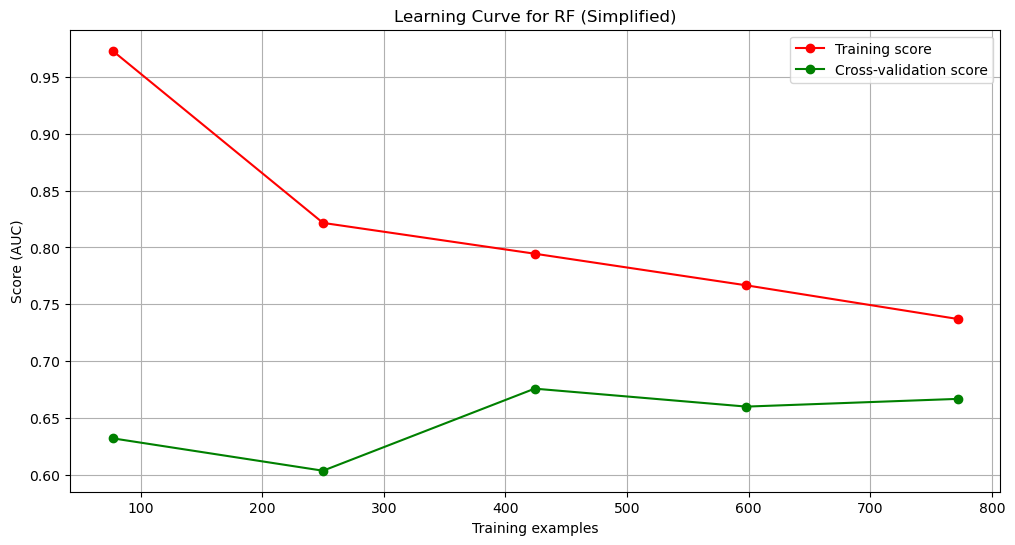

In [366]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import numpy as np

# Courbe d'apprentissage simplifiée
train_sizes, train_scores, test_scores = learning_curve(
    modele_rf_opt_bis, X_train, y_train, cv=5, scoring='roc_auc', n_jobs=1, train_sizes=np.linspace(0.1, 1.0, 5)
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(12, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.title('Learning Curve for RF (Simplified)')
plt.xlabel('Training examples')
plt.ylabel('Score (AUC)')
plt.legend(loc='best')
plt.grid()
plt.show()


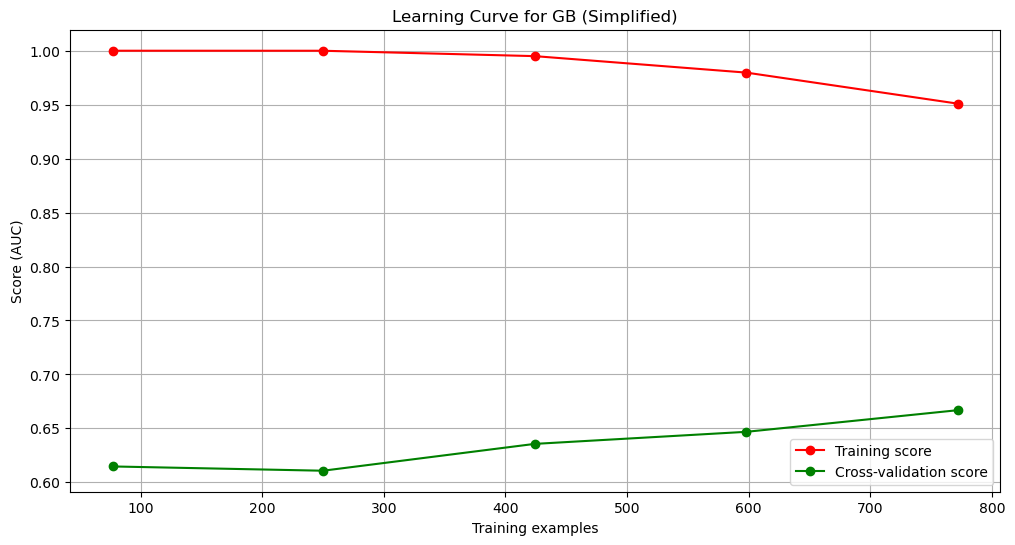

In [368]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import numpy as np

# Courbe d'apprentissage simplifiée
train_sizes, train_scores, test_scores = learning_curve(
    modele_gb_opt_bis, X_train, y_train, cv=5, scoring='roc_auc', n_jobs=1, train_sizes=np.linspace(0.1, 1.0, 5)
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(12, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.title('Learning Curve for GB (Simplified)')
plt.xlabel('Training examples')
plt.ylabel('Score (AUC)')
plt.legend(loc='best')
plt.grid()
plt.show()


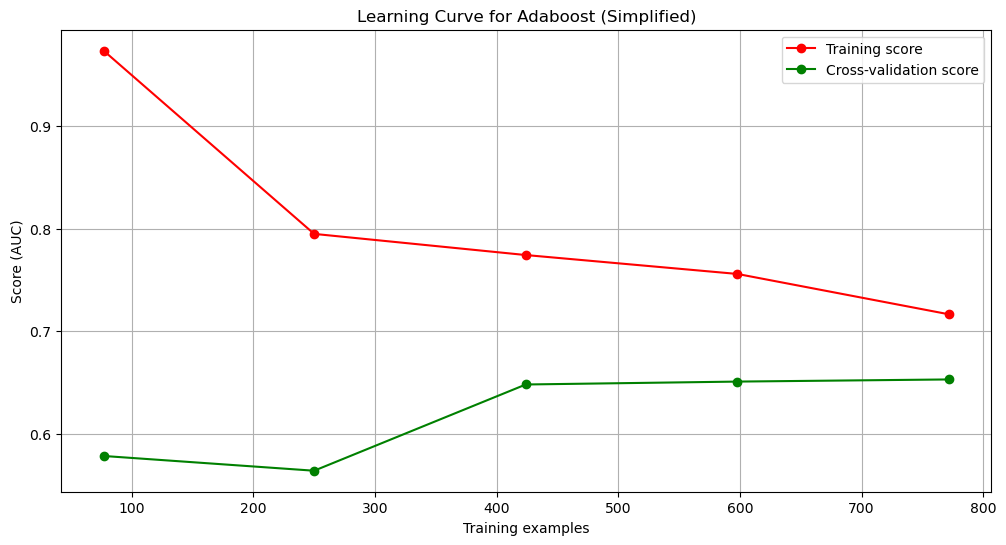

In [369]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import numpy as np

# Courbe d'apprentissage simplifiée
train_sizes, train_scores, test_scores = learning_curve(
    modele_adaboost_opt_bis, X_train, y_train, cv=5, scoring='roc_auc', n_jobs=1, train_sizes=np.linspace(0.1, 1.0, 5)
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(12, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.title('Learning Curve for Adaboost (Simplified)')
plt.xlabel('Training examples')
plt.ylabel('Score (AUC)')
plt.legend(loc='best')
plt.grid()
plt.show()


## I.3. Export du modèle

In [355]:
# Pourquoi le F1-score est-il plus bas avec le modèle optimisé ? 


# II. Résultats

## II.1. Export des résultats

In [348]:
len(X)

# Je veux récupérer toutes les probabilités associées à chaque observation avec adaboost et randomoversampler
toutes_probas_communes = modele_adaboost_randomoversampler_opt.predict_proba(X)[:, 1]
len(toutes_probas_communes)


1207

In [349]:
# On récupère chaque probabilité associée à chaque commune

resultats_proba_communes = pd.DataFrame({
    "Code INSEE": X.index,
    "Probabilité": toutes_probas_communes
})
resultats_proba_communes

# Export du tableau
resultats_proba_communes.to_csv("data/resultats_proba_communes.csv", index=False)